# Comparison of LCS with GSWLC #

- The GSWLC provides a better comparison sample for us.
- I matched to GSWLC-X2 - used 5 arcsecond radius.  found 1496 matches.
  - I didn't note how I did the match.  I don't see any python programs, so I probably used topcat.
  - redoing on 5/29/20
  - matching LCS_all_size_KE_SFR.fits with GSWLC-X2-LCS-Zoverlap.dat
  - matching NSA RA,DEC with GSWLC RA,DEC
    - 5 arcsec offset
    
    - best match, symmetric
    - 1 and 2
    - found 1477 pairs (~20 fewer than last time :( )
   - 10 arcsec search radius
     - 1487 pairs
   - 15 arcsec search radius
     - 1490 pairs
- we can use the GSWLC SFRs and Stellar masses for both the LCS and comparison galaxies.  This removes significant uncertainty associated with mixing methods for calculating SFR and Mstar.

- redshift limit $0.01 < z < 0.03$
- mag limit r petrosian $r = 18.0$
- main sequence: $log10(sSFR) > -11$
- explanation of GSWLC-2 catalog http://pages.iu.edu/~salims/gswlc/table2.pdf

**Stellar Mass Limit**

- convert r to Mr at maximum distance of LCS ($z=.0433$)
- then plot Mstar vs Mr, and estimate Mstar limit from Mr limit

**SFR Limit**
- Salim+2018 use $log10(sSFR) > -11$ to select star-forming galaxies
- $log10(sSFR) < -11.5$ should be considered upper limits GSWLC-A (Salim+2018, pg 11, col2)
  - we use this as our sSFR limit
- for SF galaxies, SFR errors are typically below 0.1dex

**Environment Catalogs**
- yang+07
- tempel+2012 - http://www.aai.ee/~elmo/dr8groups/readme.txt
- decarvalha+2017

In [6]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import os
import sys
import warnings
warnings.filterwarnings('ignore')

import time

from scipy.stats import ks_2samp

from astropy.io import fits,ascii
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u

In [3]:
homedir = os.getenv("HOME")
sys.path.append(homedir+'/github/APPSS/')
from a100sdss import ks, anderson
sys.path.append(homedir+'/github/LCS/python/')
from LCScommon import *
from matplotlib_venn import venn3,venn2

Running on coma


In [100]:
plotdir = homedir+'/research/LCS/plots/'


# Write Out Files for Benedetta

* GSWLC, LCS core, LCS infall
* B/T < 0.3

In [61]:
os.chdir(homedir+'/research/LCS/tables/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-13.5-2020Nov11-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433


In [62]:
# create flag to select gsw sample
gflag = (b.gsw.cat['logMstar'] > b.masscut) & (b.gsw.ssfr > b.ssfrcut)
# create flag to select LCS core sample
cflag = b.lcs.cat['membflag'] &  (b.lcs.cat['logMstar']> b.masscut)  & (b.lcs.ssfr > b.ssfrcut)
# create flag to select LCS infall sample
iflag = (~b.lcs.cat['membflag'])  & (b.lcs.cat['DELTA_V'] < 3.) &  (b.lcs.cat['logMstar']> b.masscut)  & (b.lcs.ssfr > b.ssfrcut)

In [63]:
gtab = Table(b.gsw.cat)['logMstar','logSFR'][gflag]
ctab = Table(b.lcs.cat)['logMstar','logSFR'][cflag]
itab = Table(b.lcs.cat)['logMstar','logSFR'][iflag]

In [64]:
gtab.write('gswcl_sfr_mstar_13_5_2020Nov11.fits',format='fits',overwrite=True)
ctab.write('lcs_core_sfr_mstar_2020Nov11.fits',format='fits',overwrite=True)
itab.write('lcs_infall_sfr_mstar_2020Nov11.fits',format='fits',overwrite=True)

# Sample Statistics

number with sfr and size measurements for core and infall

In [218]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7
print('number of core galaxies = ',sum(b.lcs_mass_sfr_flag & b.lcs.membflag))
print('\t with size measurements = ',sum(b.lcs_mass_sfr_flag & b.lcs.membflag & b.lcs.sampleflag))
print('number of core galaxies = ',sum(b.lcs_mass_sfr_flag & b.lcs.infallflag))
print('\t with size measurements = ',sum(b.lcs_mass_sfr_flag & b.lcs.infallflag & b.lcs.sampleflag))
print('number of GSW galaxies = ',sum(b.gsw_mass_sfr_flag) )

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
550 550 550 550
number of core galaxies =  74
	 with size measurements =  58
number of core galaxies =  64
	 with size measurements =  50
number of GSW galaxies =  9237


<Figure size 489.6x360 with 0 Axes>

# SFR - Mstar Diagram

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
550 550 550 550
number in lcs sample =  74
number in gsw sample =  9237
just checking ... 9237 74
9.701
9.702
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.09
p-vale = 6.123e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.26
p-vale = 8.356e-05 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

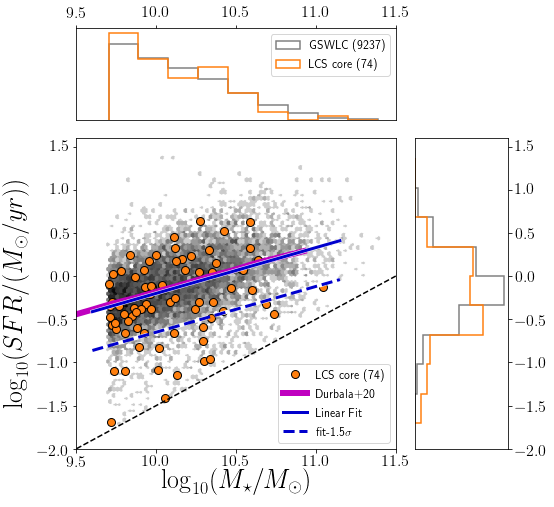

In [7]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7
flag = b.lcs.membflag
outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut.png'
b.plot_sfr_mstar(lcsflag=flag,outfile1=outfile1,outfile2=outfile2,massmatch=False,hexbinflag=True)

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
550 550 550 550
number in lcs sample =  64
number in gsw sample =  9237
just checking ... 9237 64
9.701
9.715
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.13
p-vale = 2.490e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.07
p-vale = 9.105e-01 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

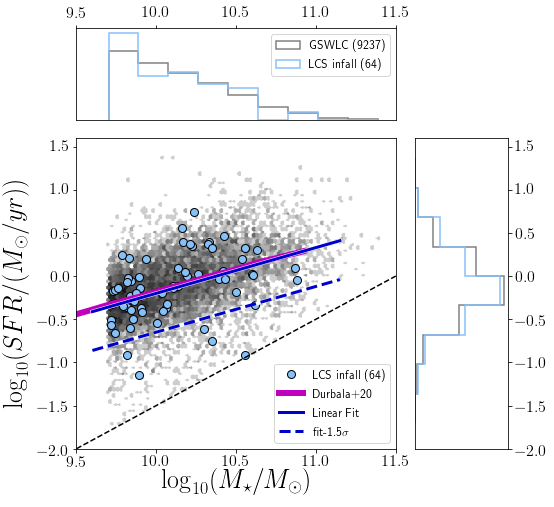

In [8]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7
flag = b.lcs.infallflag
outfile1 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut.pdf'
outfile2 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut.png'
b.plot_sfr_mstar(lcsflag=flag,label='LCS infall',outfile1=outfile1,outfile2=outfile2,coreflag=False,hexbinflag=True,massmatch=False)

# Plot dSFR hist #

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
550 550 550 550
KS STATISTICS: FIELD VS CORE
Ks_2sampResult(statistic=0.2144410162029519, pvalue=0.002309979706769827)
Anderson_ksampResult(statistic=8.306333638593118, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)

KS STATISTICS: FIELD VS INFALL
Ks_2sampResult(statistic=0.06771679116596298, pvalue=0.9044839324654173)
Anderson_ksampResult(statistic=-0.8353976576061465, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.25)

KS STATISTICS: CORE VS INFALL
Ks_2sampResult(statistic=0.20833333333333334, pvalue=0.08469501265081014)
Anderson_ksampResult(statistic=1.3230093240180867, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.09256813382827882)


<Figure size 489.6x360 with 0 Axes>

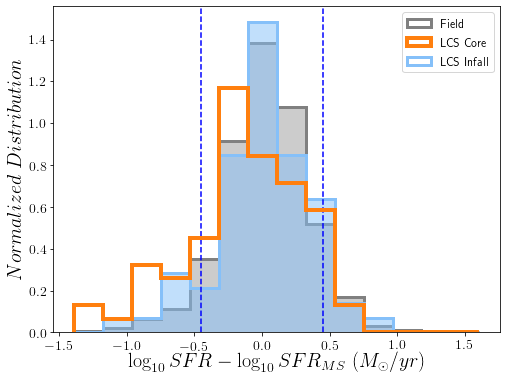

In [9]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7
outfile1 = homedir+'/research/LCS/plots/delta-sfr-hist.pdf'
outfile2 = homedir+'/research/LCS/plots/delta-sfr-hist.png'
b.plot_dsfr_hist(outfile1=outfile1,outfile2=outfile2)

# Galaxies with Suppressed Star Formation

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
550 550 550 550
CORE
0.22972972972972974 [-0.04510345  0.05231067]
INFALL
0.09375 [-0.03044     0.04294002]
FIELD
0.06430659304969145 [-0.00250542  0.00259975]
(2,)


<Figure size 489.6x360 with 0 Axes>

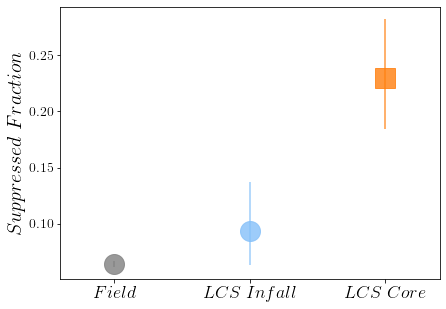

In [11]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7
outfile1 = homedir+'/research/LCS/plots/fsuppressed-btcut1.pdf'
outfile2 = homedir+'/research/LCS/plots/fsuppressed-btcut1.png'
b.plot_frac_suppressed()#outfile1=outfile1,outfile2=outfile2,nbins=12)
plt.savefig(outfile1)
plt.savefig(outfile2)

# Is Extra Suppression in Core Due to Higher B/T galaxies?

## Compare B/T distribution of core and infall galaxies #

* need to see if BT distribution is similar
* if not, we will need to cut on BT for the simulation
* otherwise we will conflate multiple factors


CONCLUSION
* B/T of core/infall are significantly different. pvalue = 1.6e-10 
* after cutting B/T < 0.3, the difference is much smaller.  pvalue = 0.015

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
1181 1181 1181 1181
comparing BT: Core vs Infall
Ks_2sampResult(statistic=0.21, pvalue=0.010414739186553779)

comparing BT: Core vs Field
Ks_2sampResult(statistic=0.2189188410805829, pvalue=5.4915532035952395e-06)

comparing BT: Field vs Infall
Ks_2sampResult(statistic=0.12374805598755834, pvalue=0.09574692336643853)

number in core and infall = 135, 100


<Figure size 489.6x360 with 0 Axes>

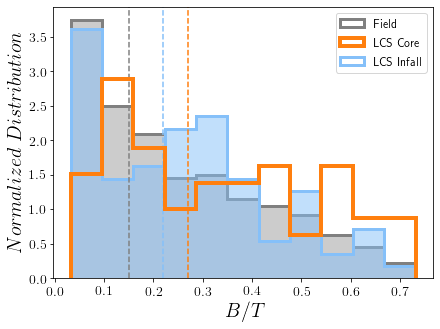

In [17]:
os.chdir(homedir+'/research/LCS/plots/')
btmax=.7
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 9.7 --cutBT --BT .7
outfile1 = homedir+'/research/LCS/plots/BThist-btcut1.pdf'
outfile2 = homedir+'/research/LCS/plots/BThist-btcut1.png'
b.compare_BT(nbins=12,xmax=btmax)#outfile1=outfile1,outfile2=outfile2,nbins=12)
plt.savefig(outfile1)
plt.savefig(outfile2)

# Compare Relative Fraction as a Function of B/T 

* Core is significantly different from field
* can we attribute lower SFRs dut to higher B/T, assuming higher B/T have lower sSFRs?
* no, if you look at delta SFR vs B/T, the core galaxies are suppressed at all B/T

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
550 550 550 550


<Figure size 489.6x360 with 0 Axes>

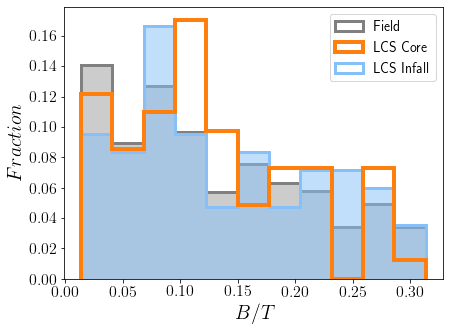

In [15]:
os.chdir(homedir+'/research/LCS/plots/')
btmax=.3
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 9.7 --cutBT --BT .3
outfile1 = homedir+'/research/LCS/plots/BThist-env.pdf'
outfile2 = homedir+'/research/LCS/plots/BThist-env.png'
b.plot_BThist_env(nbins=12,xmax=btmax)#outfile1=outfile1,outfile2=outfile2,nbins=12)
#plt.savefig(outfile1)
#plt.savefig(outfile2)

## Compare $\Delta$SFR as a function of BT

* core has lower $\Delta$SFR at all BT
* we then looked at galaxies with low $\Delta$SFR and high B/T
  * visual inspection shows there are some ellipticals contaminating
* we try to cut on nsersic=2, and the difference between the core and field still persists for B/T < 0.2 galaxies.   The infall is too noisy when we cut on n=2, so that it overlaps both the field and core samples.

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
550 550 550 550
#########################
Without Sersic cut
#########################

Field
r=-0.0968, pvalue=1.165e-20

LCS Core
r=-0.0619, pvalue=6.006e-01

LCS Infall
r=-0.0492, pvalue=6.993e-01

 Combined Samples: Spearman Rank


<Figure size 489.6x360 with 0 Axes>

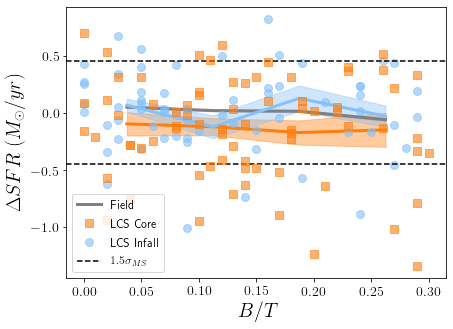

#########################
Applying Sersic n=2 cut
#########################

Field
r=-0.0790, pvalue=3.240e-13

LCS Core
r=0.0651, pvalue=6.034e-01

LCS Infall
r=0.0048, pvalue=9.730e-01

 Combined Samples: Spearman Rank


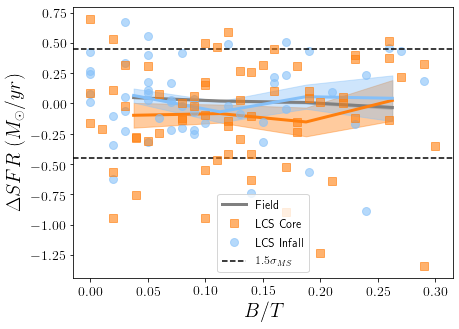

In [73]:
os.chdir(homedir+'/research/LCS/plots/')
btmax=.3
nbins=5
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7 --BT .3

print('#########################')
print('Without Sersic cut')
print('#########################')
xvars,yvars = b.plot_dsfr_BT(nbins=nbins,xmax=btmax,writefiles=True,nsersic_cut=10)#outfile1=outfile1,outfile2=outfile2,nbins=12)
outfile1 = homedir+'/research/LCS/plots/dsfr-BT-btcut1.pdf'
outfile2 = homedir+'/research/LCS/plots/dsfr-BT-btcut1.png'
plt.savefig(outfile1)
plt.savefig(outfile2)

pause(1)
print('#########################')
print('Applying Sersic n=2 cut')
print('#########################')
xvars,yvars = b.plot_dsfr_BT(nbins=nbins,xmax=btmax,writefiles=True,nsersic_cut=2)#outfile1=outfile1,outfile2=outfile2,nbins=12)
outfile1 = homedir+'/research/LCS/plots/dsfr-BT-btcut1-nsersic2.pdf'
outfile2 = homedir+'/research/LCS/plots/dsfr-BT-btcut1-nsersic2.png'
plt.savefig(outfile1)
plt.savefig(outfile2)

# Property of Suppressed Galaxies

### Compare morphology and color for Field and LCS

* Look at galaxies with normal SFR and low SFRs separately
  * top column is normal SFR
  * bottom column is low SFR

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
550 550 550 550
######################################################
comparing mass distribution of normal SFR galaxies
Ks_2sampResult(statistic=0.10979782583543354, pvalue=0.12007884719148665)
######################################################
comparing mass distribution of low SFR galaxies
Ks_2sampResult(statistic=0.1345337432293954, pvalue=0.7677714510917254)


<Figure size 489.6x360 with 0 Axes>

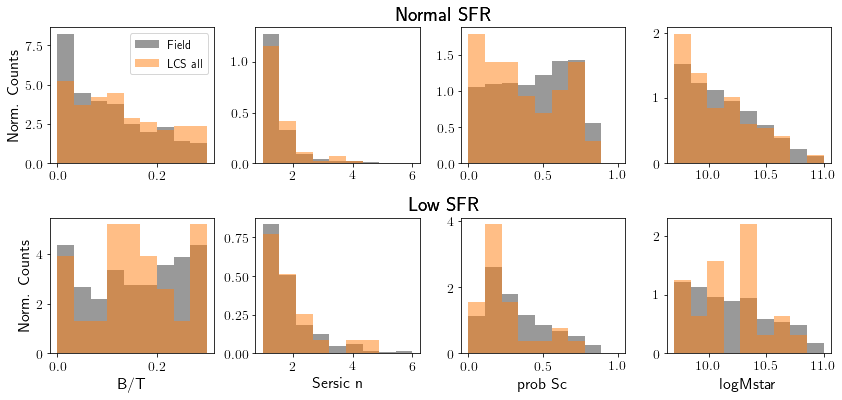

######################################################
comparing mass distribution of normal SFR galaxies
Ks_2sampResult(statistic=0.1487848395720297, pvalue=0.147056567797607)
######################################################
comparing mass distribution of low SFR galaxies
Ks_2sampResult(statistic=0.16528025351554762, pvalue=0.6966004791760223)


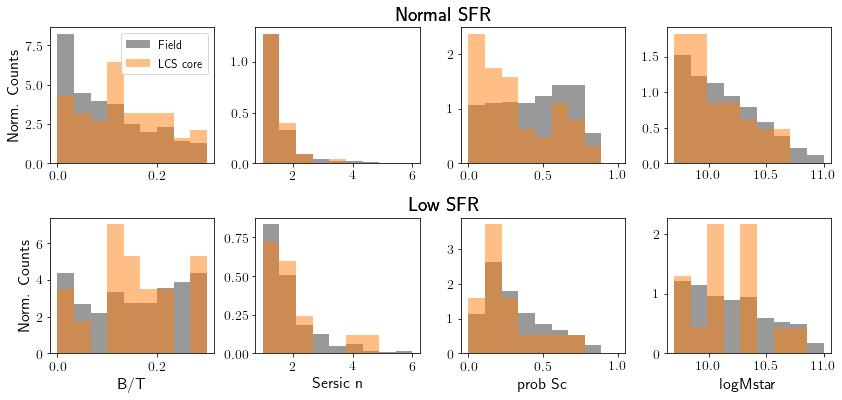

In [20]:
os.chdir(homedir+'/research/LCS/plots/')
btmax=.3
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 9.7 --cutBT --BT .3

b.compare_morph(nbins=10,xmax=btmax,coreonly=False)#outfile1=outfile1,outfile2=outfile2,nbins=12)
outfile1 = homedir+'/research/LCS/plots/prop-lowsfr-lcsall-btcut1.pdf'
outfile2 = homedir+'/research/LCS/plots/prop-lowsfr-lcsall-btcut1.png'
plt.savefig(outfile1)
plt.savefig(outfile2)

pause(1)
# repeat but compare field with lcs core only
b.compare_morph(nbins=10,xmax=btmax,coreonly=True)
outfile1 = homedir+'/research/LCS/plots/prop-lowsfr-lcscore-btcut1.pdf'
outfile2 = homedir+'/research/LCS/plots/prop-lowsfr-lcscore-btcut1.png'
plt.savefig(outfile1)
plt.savefig(outfile2)

In [26]:
# compare mass distribution of LCS normal and suppressed sf
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 9.7 --cutBT --BT .3
var1 = b.lcs.cat['logMstar']
lcsflag = b.lcs.membflag | b.lcs.infallflag
flag1norm = lcsflag & b.lcs.lowsfr_flag & b.lcs_mass_sfr_flag
flag1low = lcsflag & ~b.lcs.lowsfr_flag & b.lcs_mass_sfr_flag

var2 = b.gsw.cat['logMstar']
flag2norm =  b.gsw.lowsfr_flag & b.gsw_mass_sfr_flag
flag2low =  ~b.gsw.lowsfr_flag & b.gsw_mass_sfr_flag

print()
print('LCS mass, normal and suppressed')
t = ks_2samp(var1[flag1norm],var1[flag1low])
print(t)
print('#############################')
print()
print('GSW mass, normal and suppressed')
t = ks_2samp(var2[flag2norm],var2[flag2low])
print(t)
print('#############################')
print()
print('GSW + LCS mass, normal')
t = ks_2samp(var2[flag2norm],var1[flag1norm])
print(t)
print('#############################')
print()
print('GSW + LCS mass, suppressed')
t = ks_2samp(var2[flag2low],var1[flag1low])
print(t)


outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
550 550 550 550

LCS mass, normal and suppressed
Ks_2sampResult(statistic=0.2782608695652174, pvalue=0.09002694655722543)
#############################

GSW mass, normal and suppressed
Ks_2sampResult(statistic=0.10762314806049621, pvalue=5.120428339258362e-06)
#############################

GSW + LCS mass, normal
Ks_2sampResult(statistic=0.1345337432293954, pvalue=0.7677714510917254)
#############################

GSW + LCS mass, suppressed
Ks_2sampResult(statistic=0.10979782583543354, pvalue=0.12007884719148665)


# DISCUSSION


# Linking SFR Suppression and Growth of Bulge

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
550 550 550 550
#######################################
comparing low SFR and mass-matched normal SFR
Ks_2sampResult(statistic=0.2255892255892256, pvalue=1.1760214025213367e-13)
#######################################
comparing normal SFR and normal SFR mass-matched to low SFR
Ks_2sampResult(statistic=0.0561550948569345, pvalue=0.06007236713611981)


<Figure size 489.6x360 with 0 Axes>

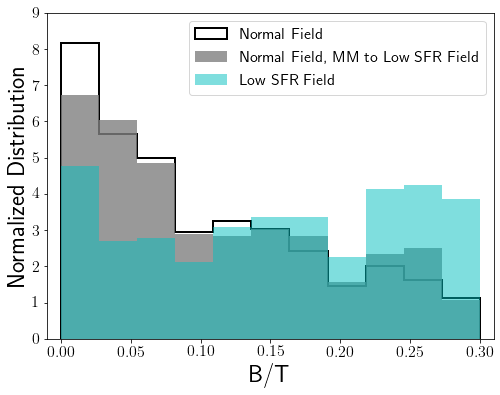

In [204]:
# compare BT of low SFR field galaxies with BT distribution of mass-matched normal SF field galaxies 
os.chdir(homedir+'/research/LCS/plots/')
btmax=.3
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 9.7 --cutBT --BT .3

b.compare_BT_lowsfr_field(nbins=12)#outfile1=outfile1,outfile2=outfile2,nbins=12)
outfile1 = homedir+'/research/LCS/plots/morphhist-field-normal-lowsfr.pdf'
outfile2 = homedir+'/research/LCS/plots/morphhist-field-normal-lowsfr.png'
plt.savefig(outfile1)
plt.savefig(outfile2)

## Repeat for low SFR core galaxies

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
550 550 550 550
#######################################
comparing low SFR and mass-matched normal SFR
Ks_2sampResult(statistic=0.36470588235294116, pvalue=0.020115050358100905)


<Figure size 489.6x360 with 0 Axes>

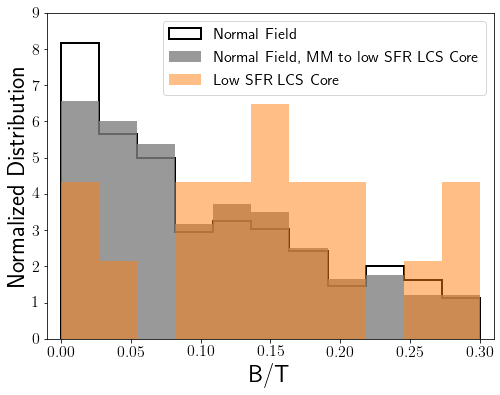

In [203]:
# compare BT of low SFR field galaxies with BT distribution of mass-matched normal SF field galaxies 
os.chdir(homedir+'/research/LCS/plots/')
btmax=.3
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 9.7 --cutBT --BT .3

b.compare_BT_lowsfr_lcs_massmatch(nbins=12,coreonly=True)#outfile1=outfile1,outfile2=outfile2,nbins=12)
outfile1 = homedir+'/research/LCS/plots/morphhist-lcscore-normal-lowsfr.pdf'
outfile2 = homedir+'/research/LCS/plots/morphhist-lcscore-normal-lowsfr.png'
plt.savefig(outfile1)
plt.savefig(outfile2)

This shows that even in the field, the suppressed galaxies have higher B/T.  This is not due a difference in mass distribution.  The solid gray and orange histograms have a matched mass distribution. Compare with literature - what is transforming B/T of field galaxies as they quench?  How is SFR suppressing linked to morphological evolution?  Must be change in B/T during SFR suppression.

Moving to role of environment.

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
550 550 550 550
###################################################################
comparing LCS low SFR and mass-matched field low SFR: B/T
statistic=0.15, pvalue=7.08e-01

###################################################################
comparing LCS low SFR and mass-matched field low SFR: Sersic n
statistic=0.25, pvalue=1.21e-01

###################################################################
comparing LCS low SFR and mass-matched field low SFR: prob Sc
statistic=0.26, pvalue=9.97e-02



<Figure size 489.6x360 with 0 Axes>

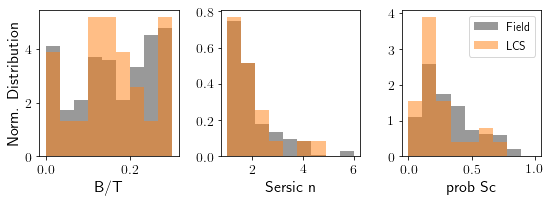

###################################################################
comparing LCS low SFR and mass-matched field low SFR: B/T
statistic=0.19, pvalue=5.55e-01

###################################################################
comparing LCS low SFR and mass-matched field low SFR: Sersic n
statistic=0.18, pvalue=6.32e-01

###################################################################
comparing LCS low SFR and mass-matched field low SFR: prob Sc
statistic=0.25, pvalue=2.65e-01



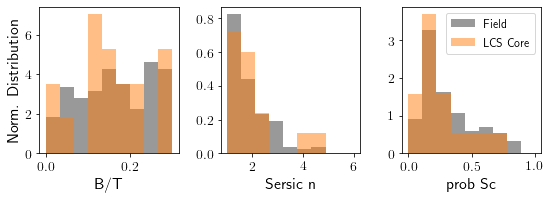

In [35]:
# compare BT of low SFR field galaxies with BT distribution of mass-matched normal SF field galaxies 
os.chdir(homedir+'/research/LCS/plots/')
btmax=.3
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 9.7 --cutBT --BT .3 
b.compare_BT_lowsfr_field_core(nbins=10,coreonly=False)
outfile1 = homedir+'/research/LCS/plots/lowsfr-prop-lcsall-mmfield-btcut1.pdf'
outfile2 = homedir+'/research/LCS/plots/lowsfr-prop-lcsall-mmfield-btcut1.png'
plt.savefig(outfile1)
plt.savefig(outfile2)
pause(1)
b.compare_BT_lowsfr_field_core(nbins=10,coreonly=True)
outfile1 = homedir+'/research/LCS/plots/lowsfr-prop-lcscore-mmfield-btcut1.pdf'
outfile2 = homedir+'/research/LCS/plots/lowsfr-prop-lcscore-mmfield-btcut1.png'
plt.savefig(outfile1)
plt.savefig(outfile2)

# Phase Space Diagram

Having issues getting consistent sample sizes.

According to figure 2:
* LCS Core
  * 71 total
  * maybe ~18 with suppressed SF
* LCS Infall
  * 66 total
  * maybe ~7 with suppressed SF
  
### FLAGS

| Flag | Definition | Number |
|------|------------|--------|
| b.lcs_mass_sfr_flag | (self.lcs.cat['logMstar']> self.masscut)  & (self.lcs.ssfr > self.ssfrcut) |
| b.lcs.membflag | (self.lcs.cat['logMstar']> self.masscut)  & (self.lcs.ssfr > self.ssfrcut) |
| b.lcs.infallflag | (abs(self.cat['DELTA_V']) < 3) & ~self.membflag |
| b.lcs.lowsfr_flag | (self.dsfr < -0.45) |


## Resolution
 
* I was running program without the BT cut!!!

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
550 550 550 550
number in parent sample =  138
number in low SFR sample =  23
number in normal SFR sample =  115
just checking ... 111 23
0.07303849
0.12098306
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.24
p-vale = 1.698e-01 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =   0.72
p-vale = 0.16662 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.15
p-vale = 7.235e-01 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =  -0.63
p-vale = 0.67905 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

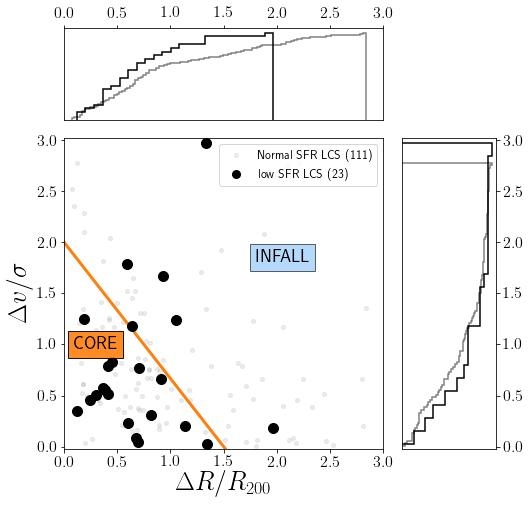

In [217]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 9.7 --BT .3 --cutBT
figname1 = homedir+'/research/LCS/plots/lcs-dvdr-sfgals.png'
figname2 = homedir+'/research/LCS/plots/lcs-dvdr-sfgals.pdf'
b.plot_dvdr_sfgals(figname1=figname1,figname2=figname2)

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
550 550 550 550
number in parent sample =  74
number in low SFR sample =  17
number in normal SFR sample =  57
just checking ... 57 17
0.13710812
0.12098306
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.16
p-vale = 8.238e-01 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =  -0.76
p-vale = 0.77850 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.22
p-vale = 4.613e-01 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =   0.53
p-vale = 0.20108 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

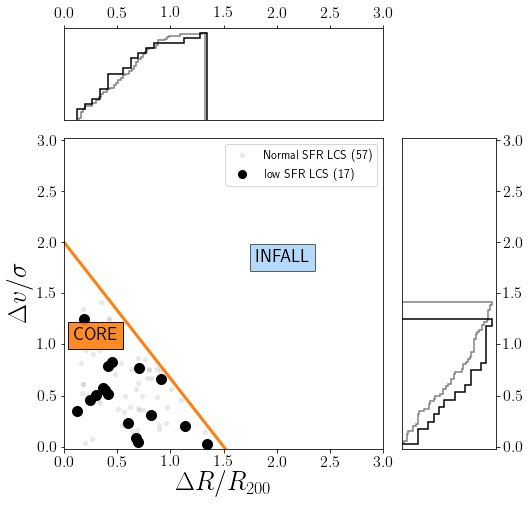

In [216]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 9.7 --cutBT
figname1 = homedir+'/research/LCS/plots/lcs-dvdr-sfgals.png'
figname2 = homedir+'/research/LCS/plots/lcs-dvdr-sfgals.pdf'
b.plot_dvdr_sfgals(figname1=figname1,figname2=figname2,coreflag=True)

# Summary Statistics

* running mass, SFR and sSFR comparisons all at once to help with creating tables

In [259]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7
b.ks_stats()

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-13-2020Nov25-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433
got sb flag
543 543 543 543
########################################
LCS Core vs Field: SFR
	D = 2.53e-01, pvalue = 1.47e-04
LCS Core vs Field: dSFR
	D = 2.09e-01, pvalue = 2.89e-03
LCS Core vs Field: Mstar
	D = 8.09e-02, pvalue = 6.99e-01
########################################
LCS Infall vs Field: SFR
	D = 6.88e-02, pvalue = 9.05e-01
LCS Infall vs Field: dSFR
	D = 7.34e-02, pvalue = 8.59e-01
LCS Infall vs Field: Mstar
	D = 1.24e-01, pvalue = 2.61e-01
########################################
LCS Core vs Infall: SFR
	D = 2.06e-01, pvalue = 9.25e-02
LCS Core vs Infall: dSFR
	D = 1.96e-01, pvalue = 1.22e-01
LCS Core vs Infall: Mstar
	D = 9.31e-02, pvalue = 8.92e-01


In [260]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7
b.ks_stats(massmatch=True)

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-13-2020Nov25-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433
got sb flag
543 543 543 543
########################################
LCS Core vs Field: SFR
	D = 2.34e-01, pvalue = 8.25e-04
LCS Core vs Field: dSFR
	D = 2.05e-01, pvalue = 4.81e-03
LCS Core vs Field: Mstar
	D = 8.77e-02, pvalue = 6.30e-01
########################################
LCS Infall vs Field: SFR
	D = 5.55e-02, pvalue = 9.87e-01
LCS Infall vs Field: dSFR
	D = 7.27e-02, pvalue = 8.84e-01
LCS Infall vs Field: Mstar
	D = 5.86e-02, pvalue = 9.78e-01


### Without B/T Cut

In [261]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 9.7
b.ks_stats()

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-13-2020Nov25-LCS-Zoverlap.fits
0.0137 0.0433
0.0137 0.0433
got sb flag
1376 1376 1376 1376
########################################
LCS Core vs Field: SFR
	D = 3.10e-01, pvalue = 2.50e-13
LCS Core vs Field: dSFR
	D = 3.10e-01, pvalue = 2.48e-13
LCS Core vs Field: Mstar
	D = 1.06e-01, pvalue = 6.21e-02
########################################
LCS Infall vs Field: SFR
	D = 1.78e-01, pvalue = 1.71e-03
LCS Infall vs Field: dSFR
	D = 1.58e-01, pvalue = 7.18e-03
LCS Infall vs Field: Mstar
	D = 8.48e-02, pvalue = 3.96e-01
########################################
LCS Core vs Infall: SFR
	D = 1.78e-01, pvalue = 2.64e-02
LCS Core vs Infall: dSFR
	D = 2.09e-01, pvalue = 5.49e-03
LCS Core vs Infall: Mstar
	D = 7.17e-02, pvalue = 8.57e-01


In [262]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 9.7
b.ks_stats(massmatch=True)

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-13-2020Nov25-LCS-Zoverlap.fits
0.0137 0.0433
0.0137 0.0433
got sb flag
1376 1376 1376 1376
########################################
LCS Core vs Field: SFR
	D = 2.95e-01, pvalue = 6.35e-12
LCS Core vs Field: dSFR
	D = 3.13e-01, pvalue = 1.93e-13
LCS Core vs Field: Mstar
	D = 6.22e-02, pvalue = 5.94e-01
########################################
LCS Infall vs Field: SFR
	D = 1.73e-01, pvalue = 2.79e-03
LCS Infall vs Field: dSFR
	D = 1.58e-01, pvalue = 8.31e-03
LCS Infall vs Field: Mstar
	D = 4.91e-02, pvalue = 9.47e-01


# Images of suppressed B/T < 0.3 Core and Infall galaxies

### Core

* seems like there are a lot of edge-on galaxies
* also seems like there are a lot of bars

### Infall

* half edge on
* one in three face on has a bar

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
550 550 550 550
getting legacy images for  17  galaxies
downloading image  cutouts/legacy-im-241.28343-17.81536-60.jpg
downloading image  cutouts/legacy-im-241.28343-17.81536-60.fits
downloading image  cutouts/legacy-im-176.27902-19.96686-60.jpg
downloading image  cutouts/legacy-im-176.27902-19.96686-60.fits
downloading image  cutouts/legacy-im-230.85281-8.18447-60.jpg
downloading image  cutouts/legacy-im-230.85281-8.18447-60.fits
downloading image  cutouts/legacy-im-230.67557-8.36886-60.jpg
downloading image  cutouts/legacy-im-230.67557-8.36886-60.fits
downloading image  cutouts/legacy-im-231.17601-9.30281-60.jpg
downloading image  cutouts/legacy-im-231.17601-9.30281-60.fits
downloading image  cutouts/legacy-im-229.18707-6.83902-60.jpg
downloading image  cutouts/legacy-im-229.18707-6.83902-60.fits
downloading image  cutouts/legacy-im-229.45476-7.40561

<Figure size 489.6x360 with 0 Axes>

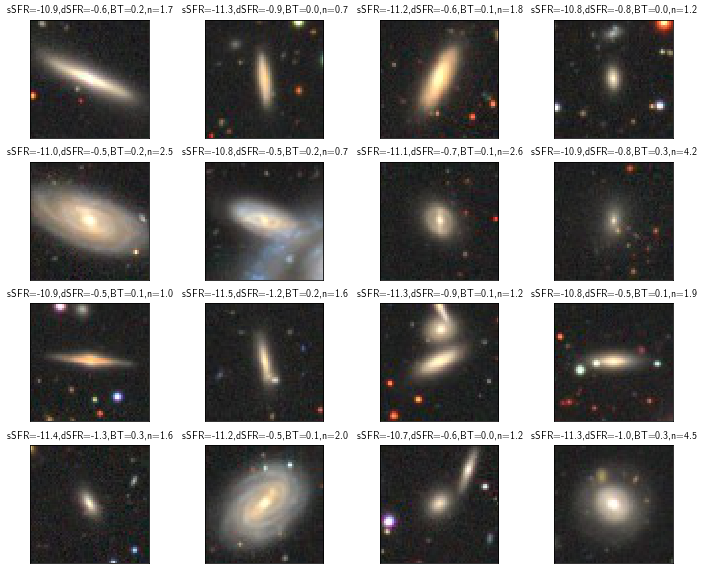

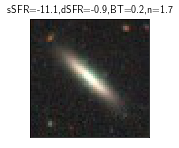

In [36]:
# changed code to remove BT > 0.3 cut
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7 --BT .3
b.core_getlegacy()

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
550 550 550 550
getting legacy images for  57  galaxies
downloading image  cutouts/legacy-im-201.98936-11.87532-60.jpg
downloading image  cutouts/legacy-im-201.98936-11.87532-60.fits
downloading image  cutouts/legacy-im-202.66698-11.59493-60.jpg
downloading image  cutouts/legacy-im-202.66698-11.59493-60.fits
downloading image  cutouts/legacy-im-202.09480-11.44757-60.jpg
downloading image  cutouts/legacy-im-202.09480-11.44757-60.fits
downloading image  cutouts/legacy-im-202.35771-11.90986-60.jpg
downloading image  cutouts/legacy-im-202.35771-11.90986-60.fits
downloading image  cutouts/legacy-im-202.39807-11.69774-60.jpg
downloading image  cutouts/legacy-im-202.39807-11.69774-60.fits
downloading image  cutouts/legacy-im-244.19218-35.28493-60.jpg
downloading image  cutouts/legacy-im-244.19218-35.28493-60.fits
downloading image  cutouts/legacy-im-244.46350

<Figure size 489.6x360 with 0 Axes>

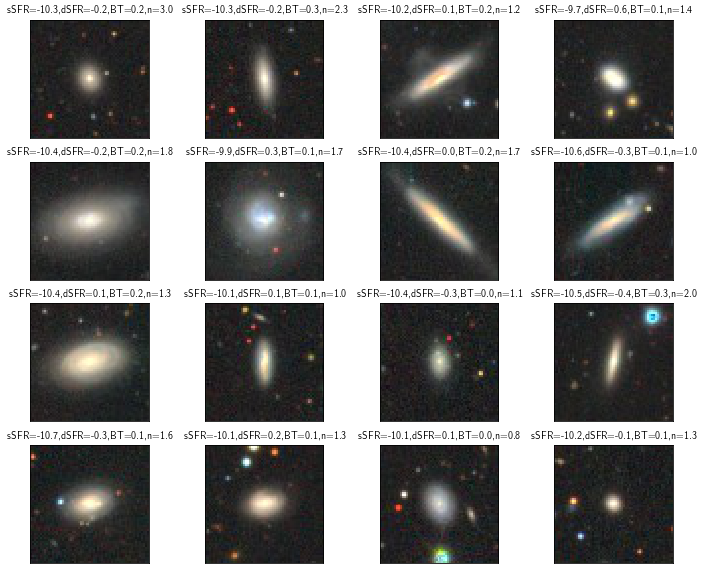

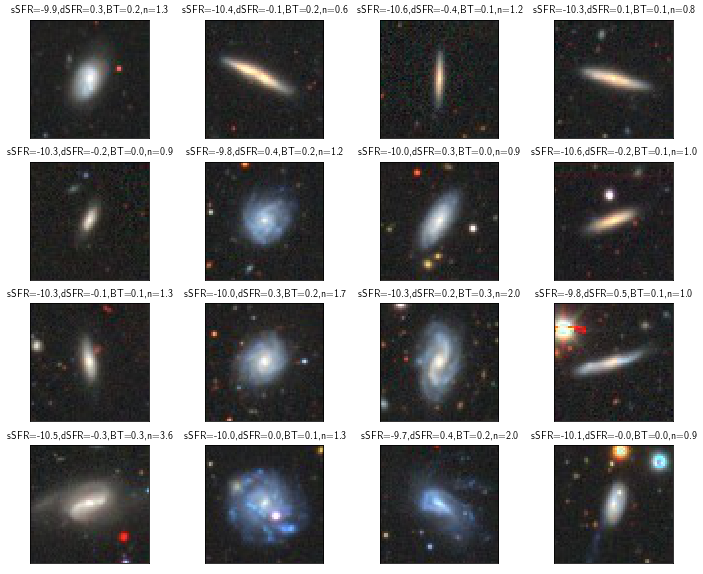

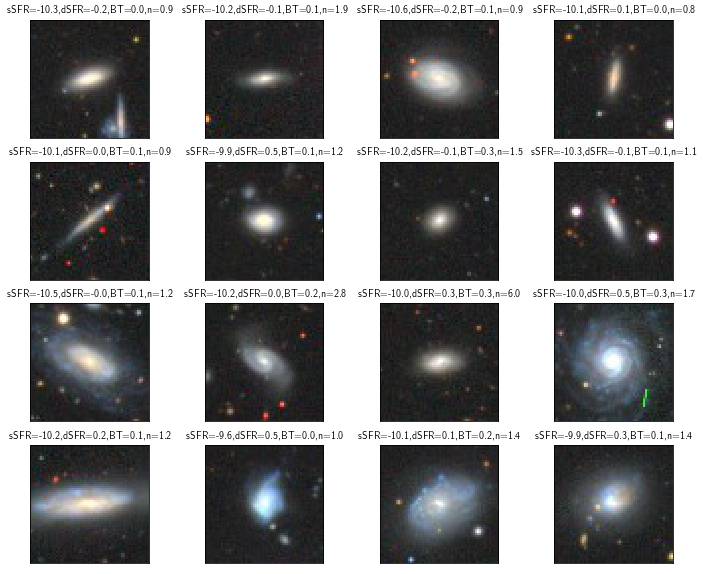

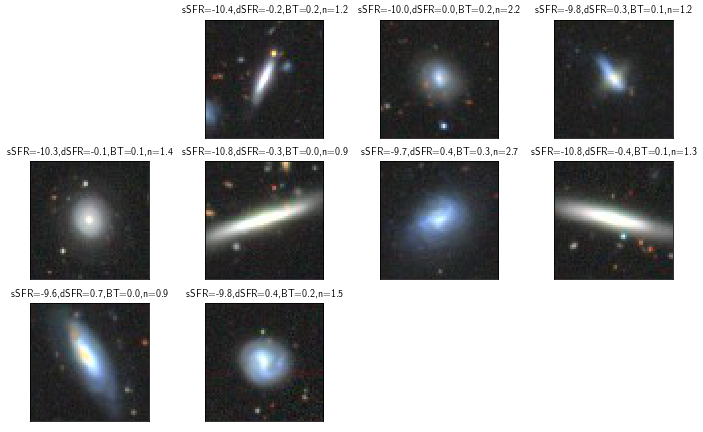

In [23]:
# changed code to remove BT > 0.3 cut
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7 --BT .3
b.core_getlegacy()

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
550 550 550 550
getting legacy images for  6  galaxies
downloading image  cutouts/legacy-im-244.74403-34.55297-60.jpg
downloading image  cutouts/legacy-im-244.74403-34.55297-60.fits
downloading image  cutouts/legacy-im-244.11919-34.65333-60.jpg
downloading image  cutouts/legacy-im-244.11919-34.65333-60.fits
downloading image  cutouts/legacy-im-230.97255-7.74933-60.jpg
downloading image  cutouts/legacy-im-230.97255-7.74933-60.fits
downloading image  cutouts/legacy-im-194.26768-27.73005-60.jpg
downloading image  cutouts/legacy-im-194.26768-27.73005-60.fits


<Figure size 489.6x360 with 0 Axes>

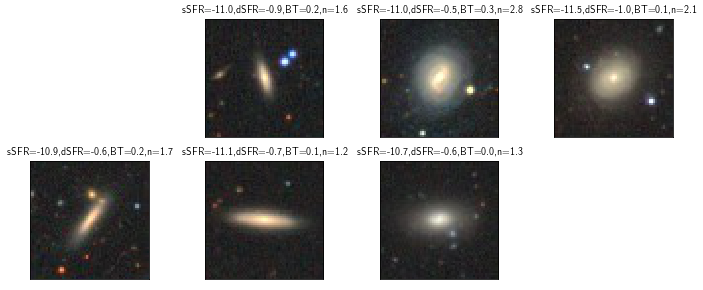

In [37]:
# changed code to get rid  of BT > 0.3 cut
os.chdir(homedir+'/research/LCS/plots/')
btmax=.7
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7 --BT .3
b.infall_getlegacy()

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
550 550 550 550


<Figure size 489.6x360 with 0 Axes>

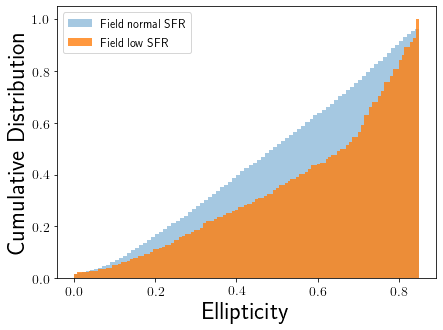

In [26]:
# compare ellipticity of normal and suppressed galaxies in the field
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7 --BT .3
mynormal = b.gsw.cat['e_2'][b.gsw_mass_sfr_flag & ~b.gsw.lowsfr_flag]
mylow = b.gsw.cat['e_2'][b.gsw_mass_sfr_flag & b.gsw.lowsfr_flag]
#ks(mynormal,mylow)
# changed code to remove BT > 0.3 cut
plt.figure()
t = plt.hist(mynormal,alpha=.4,cumulative=True,normed=True,bins=int(.2*len(mynormal)),label='Field normal SFR')
t = plt.hist(mylow,alpha=.8,cumulative=True,normed=True,bins=int(.2*len(mylow)),label='Field low SFR')
plt.xlabel('Ellipticity')
plt.ylabel('Cumulative Distribution')
plt.legend()

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
550 550 550 550


<Figure size 489.6x360 with 0 Axes>

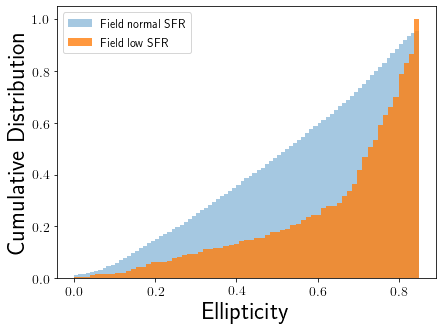

In [32]:
# compare ellipticity of normal and suppressed galaxies in the field
# also make cut on sersic index
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7 --BT .3
sersic_flag = b.gsw.cat['ng'] < 1.5
mynormal = b.gsw.cat['e_2'][b.gsw_mass_sfr_flag & ~b.gsw.lowsfr_flag & sersic_flag]
mylow = b.gsw.cat['e_2'][b.gsw_mass_sfr_flag & b.gsw.lowsfr_flag & sersic_flag]

plt.figure()
t = plt.hist(mynormal,alpha=.4,cumulative=True,normed=True,bins=int(.2*len(mynormal)),label='Field normal SFR')
t = plt.hist(mylow,alpha=.8,cumulative=True,normed=True,bins=int(.2*len(mylow)),label='Field low SFR')
plt.xlabel('Ellipticity')
plt.ylabel('Cumulative Distribution')
plt.legend()

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
550 550 550 550


<Figure size 489.6x360 with 0 Axes>

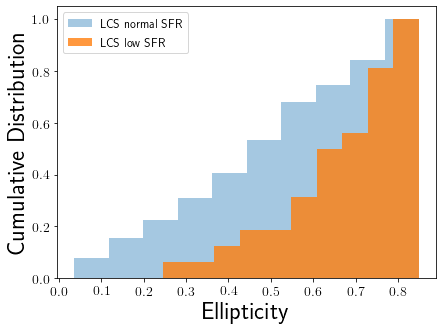

In [30]:
# compare ellipticity of normal and suppressed galaxies in the LCS
# also make cut on sersic index
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7 --BT .3
sersic_flag = b.lcs.cat['ng'] < 2.
lcsflag = b.lcs.membflag | b.lcs.infallflag
mynormal = 1-b.lcs.cat['SERSIC_BA'][b.lcs_mass_sfr_flag & ~b.lcs.lowsfr_flag & sersic_flag & lcsflag]
mylow = 1-b.lcs.cat['SERSIC_BA'][b.lcs_mass_sfr_flag & b.lcs.lowsfr_flag & sersic_flag & lcsflag]

plt.figure()
t = plt.hist(mynormal,alpha=.4,cumulative=True,normed=True,bins=10,label='LCS normal SFR')
t = plt.hist(mylow,alpha=.8,cumulative=True,normed=True,bins=10,label='LCS low SFR')
plt.xlabel('Ellipticity')
plt.ylabel('Cumulative Distribution')
plt.legend()

* what fraction of LCS galaxies have midir flag set in GSWLC2 catalog (false means not detected in WISE)

* how do SFRs compare to Kennicutt and Evans SFRs, especially for low SFR LCS galaxies
  - plot all LCS galaxies, and see if "low SFR" galaxies have low SFR compared to KE values
 
* email Samir with copy of 

* is there some possibility - if our sSFR cut is too low and we are picking up emission from old stars in the IR.


## Followed up with Samir

* He suggests plotting ellipticity vs $\Delta$SFR 

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
550 550 550 550


<Figure size 489.6x360 with 0 Axes>

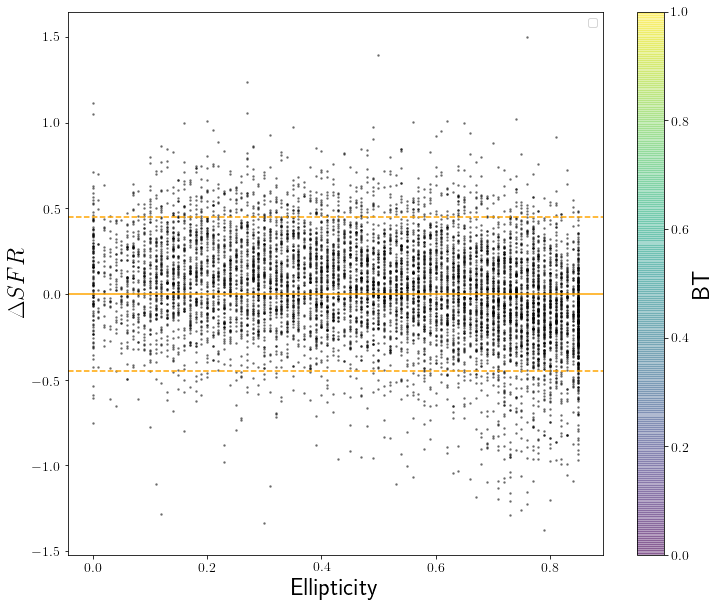

In [67]:
# compare ellipticity vs delta SFR in the field
# also make cut on sersic index
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2.py --cutBT --minmass 9.7 --BT .3
sersic_flag = b.gsw.cat['ng'] < 2
dsfr = b.gsw.dsfr[b.gsw_mass_sfr_flag  & sersic_flag]
# GIM2D ellipticity
ellipt = b.gsw.cat['e_2'][b.gsw_mass_sfr_flag & sersic_flag]
# GIM2D B/T
bt =  b.gsw.cat[BTkey][b.gsw_mass_sfr_flag & sersic_flag]
plt.figure(figsize=(12,10))
plt.scatter(ellipt,dsfr,marker='.',c='k',alpha=.4,s=10)
plt.colorbar(label='BT')
plt.xlabel('Ellipticity')
plt.ylabel('$\Delta SFR$')
plt.axhline(y=0,ls='-',color='orange')
plt.axhline(y=0.45,ls='--',color='orange')
plt.axhline(y=-0.45,ls='--',color='orange')
plt.legend()

## More on delta SFR- Ellipticity trend

Samir said he requires galaxies to be detected in uv and ir.  We haven't been making that cut. I added a flag

In [17]:
# compare ellipticity vs delta SFR in the field
# also make cut on sersic index
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7 --BT .3

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
550 550 550 550


In [15]:
print(sum(b.lcs_mass_sfr_flag & b.lcs.membflag))
print(sum(b.lcs_mass_sfr_flag & b.lcs.infallflag))

74
64


In [18]:
print(sum(b.lcs_mass_sfr_flag & b.lcs.membflag & b.lcs_uvir_flag))
print(sum(b.lcs_mass_sfr_flag & b.lcs.infallflag & b.lcs_uvir_flag))

55
59



# EXTRA PLOTS

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
1198 1198 1198 1198

Field
r=-0.2370, pvalue=1.304e-163

LCS Core
r=-0.4528, pvalue=3.521e-08

LCS Infall
r=-0.4646, pvalue=1.121e-06

 Combined Samples: Spearman Rank


<Figure size 489.6x360 with 0 Axes>

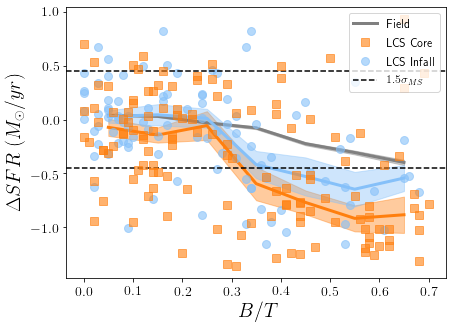

In [191]:
os.chdir(homedir+'/research/LCS/plots/')
btmax=.7
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7 --BT .7
outfile1 = homedir+'/research/LCS/plots/dsfr-BT-btcut1.pdf'
outfile2 = homedir+'/research/LCS/plots/dsfr-BT-btcut1.png'
xvars,yvars = b.plot_dsfr_BT(nbins=8,xmax=btmax,writefiles=True,nsersic_cut=10)#outfile1=outfile1,outfile2=outfile2,nbins=12)
plt.savefig(outfile1)
plt.savefig(outfile2)

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-13-2020Nov25-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433
got sb flag
1198 1198 1198 1198
getting legacy images for  44  galaxies


<Figure size 489.6x360 with 0 Axes>

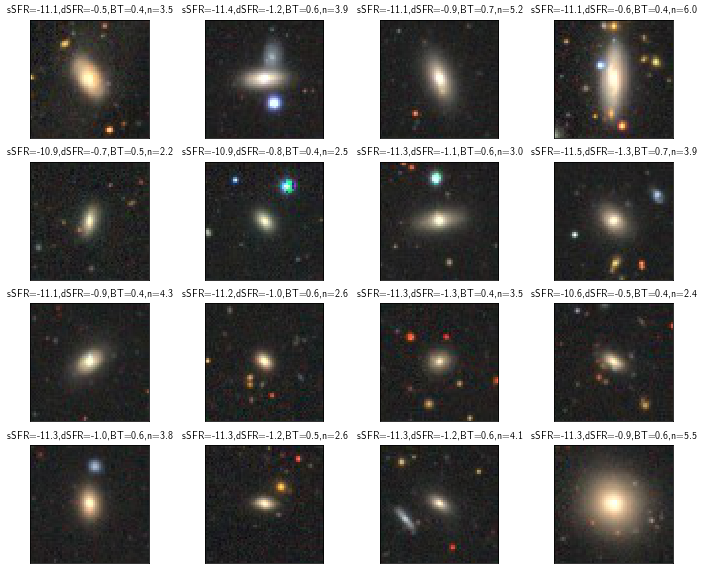

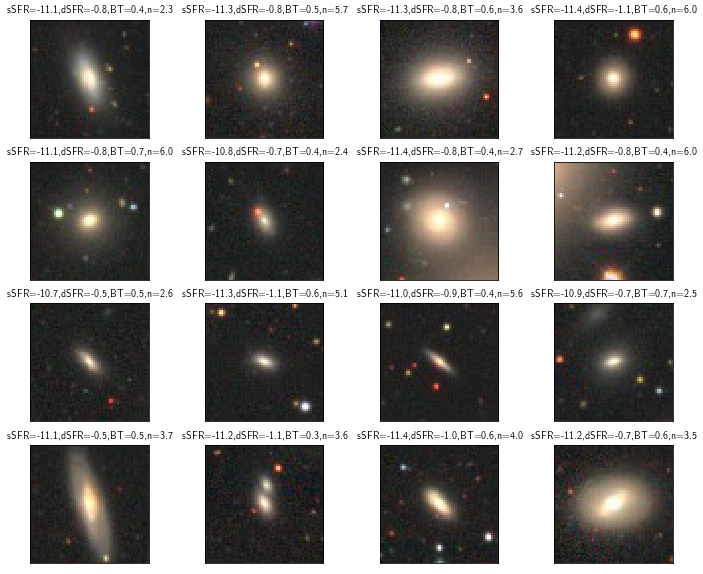

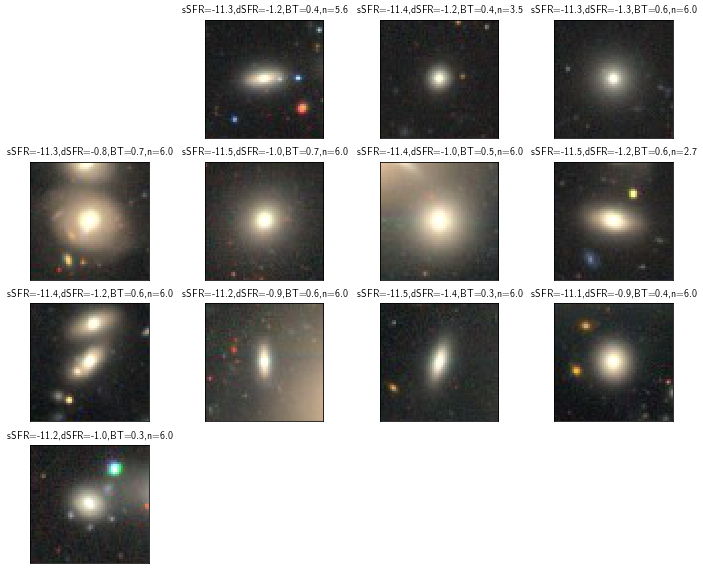

In [160]:
os.chdir(homedir+'/research/LCS/plots/')
btmax=.7
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7 --BT .7
b.core_getlegacy()

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-13-2020Nov25-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433
got sb flag
1198 1198 1198 1198
getting legacy images for  21  galaxies


<Figure size 489.6x360 with 0 Axes>

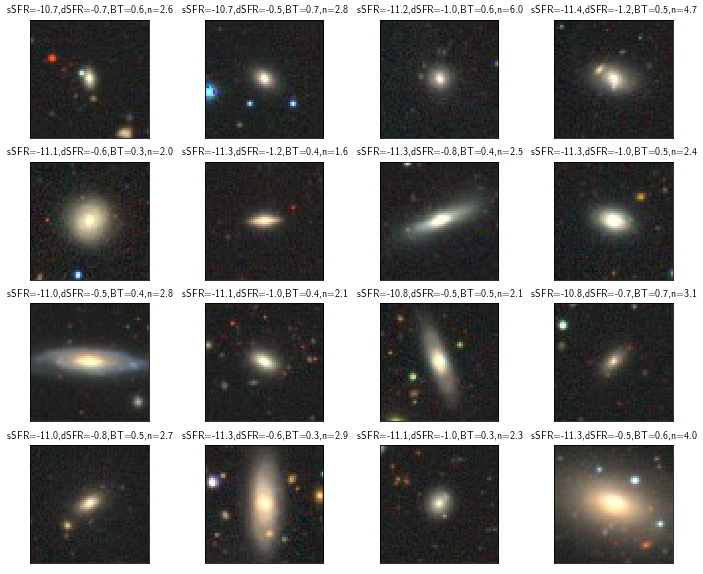

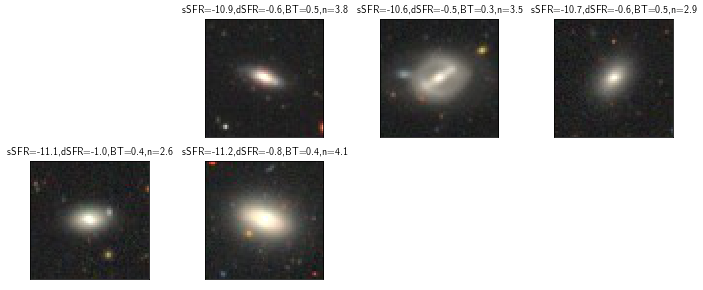

In [159]:
os.chdir(homedir+'/research/LCS/plots/')
btmax=.7
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7 --BT .7
b.infall_getlegacy()

# SFR - Mstar: no B/T cut #

repeating above three plots, but for SFR vs Mstar

### SFR-M*: LCS core vs GSWLC field, no BT cut ###

* SFRs are VERY different
* stellar masses are different

**need to make a mass-matched sample?**
as a counter point, the difference in stellar mass distributions are due to the 
GSWLC sample having lower mass galaxies. This would increase the fraction of low-SFR galaxies in the GSWLC sample, yet the LCS core galaxies have even lower SFRs. 

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-LCS-Zoverlap.fits
0.0137 0.0433
0.0137 0.0433
number in lcs sample =  153
number in gsw sample =  4459
just checking ... 4455 153
9.701
9.702
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.13
p-vale = 1.242e-02 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.30
p-vale = 4.644e-12 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

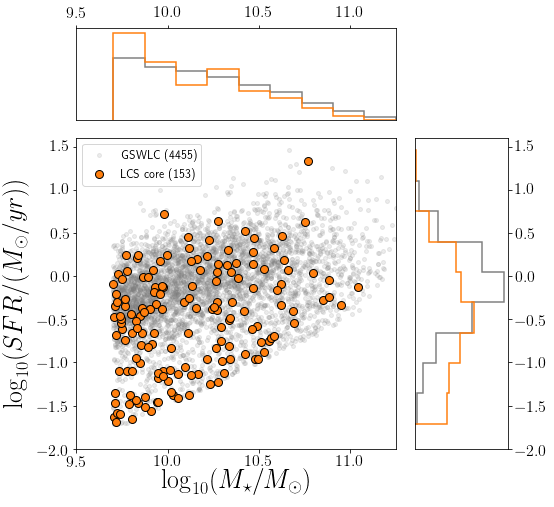

In [160]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 9.7
flag = b.lcs.cat['membflag'] 
outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar.png'
b.plot_sfr_mstar(lcsflag=flag,lcsmemb=True,outfile1=outfile1,outfile2=outfile2,massmatch=False)

### mass-matched sample ###

### LCS Core vs GSWLC, no BT cut, mass matching ###

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-LCS-Zoverlap.fits
0.0137 0.0433
0.0137 0.0433
number in lcs sample =  153
number in gsw sample =  4459
just checking ... 3060 153
9.701
9.702
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.05
p-vale = 8.087e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.27
p-vale = 3.927e-10 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

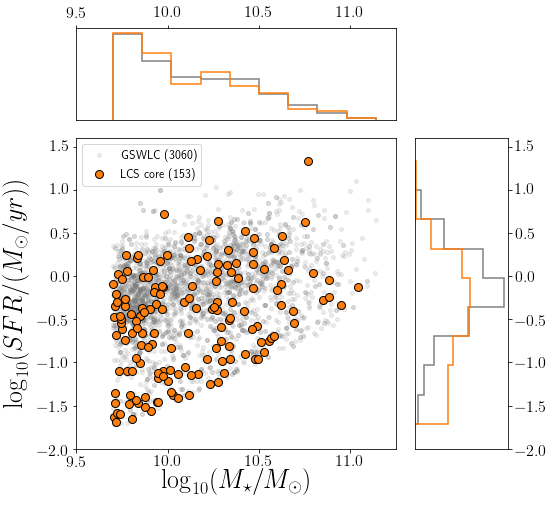

In [161]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 9.7
flag = b.lcs.cat['membflag'] 
outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar.png'
b.plot_sfr_mstar(lcsflag=flag,lcsmemb=True,outfile1=outfile1,outfile2=outfile2,massmatch=True)

### SFR-M*: LCS infall vs GSWLC, no BT cut ###

* stellar masses are very diff (more low-mass galaxies in gswlc)
* SFRs are not different

**again, need mass-matched sample**

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-LCS-Zoverlap.fits
0.0137 0.0433
0.0137 0.0433
number in lcs sample =  116
number in gsw sample =  4459
just checking ... 4455 116
9.701
9.711
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.10
p-vale = 1.566e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.22
p-vale = 4.359e-05 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

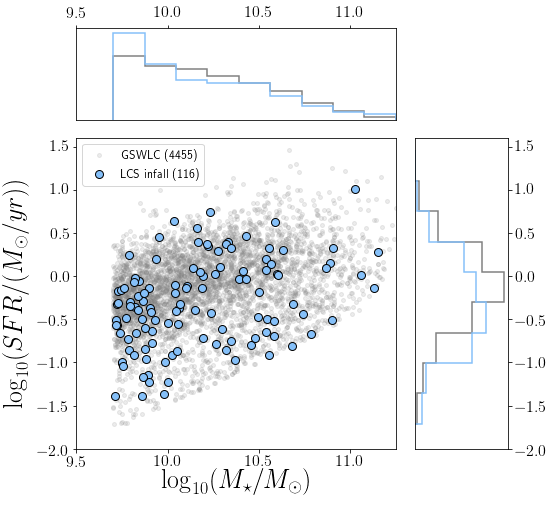

In [163]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 9.7
flag = ~b.lcs.cat['membflag'] & (b.lcs.cat['DELTA_V'] < 3.)
outfile1 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar.pdf'
outfile2 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar.png'
b.plot_sfr_mstar(lcsflag=flag,lcsinfall=True,label='LCS infall',outfile1=outfile1,outfile2=outfile2,coreflag=False,massmatch=False)

### SFR-M*: LCS infall vs GSWLC, no BT cut, with mass matching ###

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-LCS-Zoverlap.fits
0.0137 0.0433
0.0137 0.0433
number in lcs sample =  116
number in gsw sample =  4459
just checking ... 2316 116
9.701
9.711
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.04
p-vale = 9.946e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.21
p-vale = 5.965e-05 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

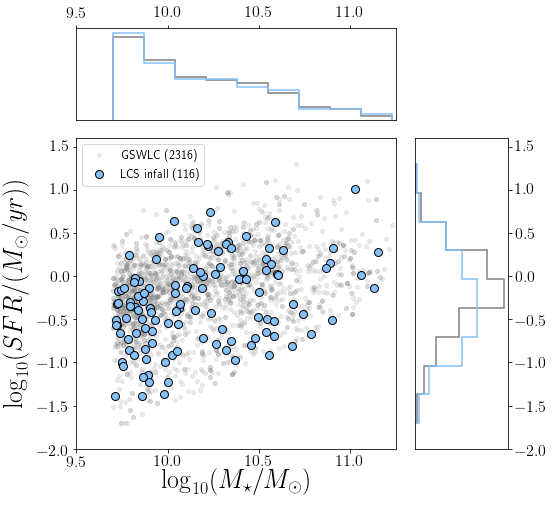

In [164]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 9.7
flag = ~b.lcs.cat['membflag'] & (b.lcs.cat['DELTA_V'] < 3.)
outfile1 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-massmatch.pdf'
outfile2 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-massmatch.png'
b.plot_sfr_mstar(lcsflag=flag,lcsinfall=True,label='LCS infall',outfile1=outfile1,outfile2=outfile2,coreflag=False,massmatch=True)

### SFR-M*: LCS core vs infall, no BT cut ###

* stellar masses are not diff 
* SFRs are not different

**again, need mass-matched sample**

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-LCS-Zoverlap.fits
0.0137 0.0433
0.0137 0.0433
number in core sample =  153
number in external sample =  116
just checking ... 153 116
9.702
9.711
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.08
p-vale = 6.880e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.17
p-vale = 3.007e-02 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

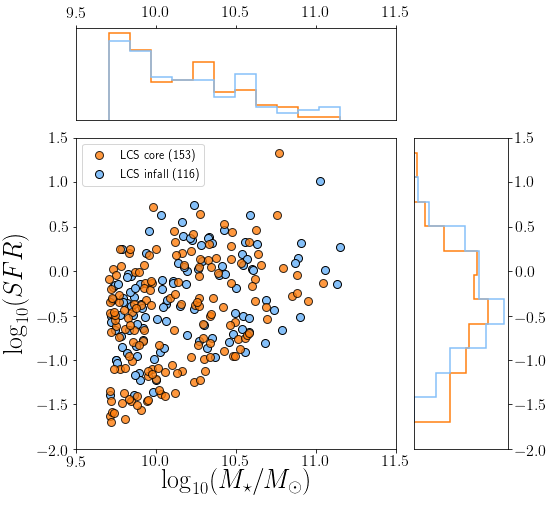

In [165]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 9.7
outfile1 = homedir+'/research/LCS/plots/lcscore-external-sfrmstar.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-external-sfrmstar.png'
b.plot_sfr_mstar_lcs(outfile1=outfile1,outfile2=outfile2,nbins=10)

# SFR- Mstar with B/T < 0.3 #

### SFR-M*: LCS infall vs GSWLC, with BT cut ###


* SFRs are not different
* stellar masses are very diff (more low-mass galaxies in gswlc)

**again, need mass-matched sample**

* make a cumulative histogram of core masses
* draw a random number [0,1]
* determine mass that corresponds to that point on cumulative histogram
* then select GSWLC galaxy with comparable mass
* how to avoid selecting the same galaxy multiple times?
  * pick closest galaxy that hasn't already been picked
* verify 

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
550 550 550 550
number in lcs sample =  72
number in gsw sample =  9237
just checking ... 9230 72
9.701
9.702
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.10
p-vale = 4.580e-01 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =   0.27
p-vale = 0.26218 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.23
p-vale = 7.621e-04 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =   8.31
p-vale = 0.00035 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

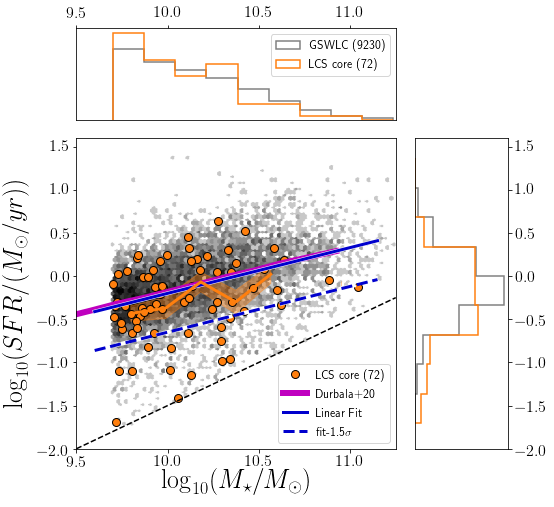

In [82]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7
flag = b.lcs.cat['membflag'] 
flag = b.lcs.membflag
outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut.png'
b.plot_sfr_mstar(lcsflag=flag,lcsmemb=True,outfile1=outfile1,outfile2=outfile2,massmatch=False,hexbinflag=True)

### LCS core vs GSWLC with B/T cut and mass match ###

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-13-2020Nov25-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433
got sb flag
543 543 543 543
number in lcs sample =  71
number in gsw sample =  9088
just checking ... 1420 71
9.701
9.702
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.06
p-vale = 9.581e-01 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =  -0.90
p-vale = 0.90824 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.20
p-vale = 6.076e-03 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =   5.10
p-vale = 0.00334 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

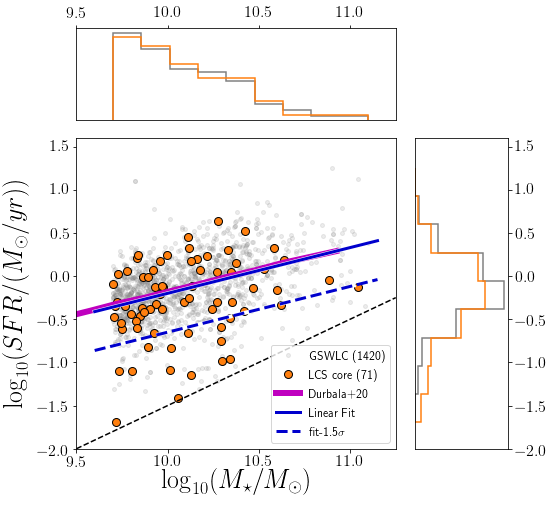

In [232]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7
flag = b.lcs.cat['membflag'] 
outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut-massmatch.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut-massmatch.png'
b.plot_sfr_mstar(lcsflag=flag,lcsmemb=True,outfile1=outfile1,outfile2=outfile2,massmatch=True,hexbinflag=False)

### SFR-M* :  LCS infall vs GSWLC - with BT cut ###

* SFRs are marginally different
* stellar masses are indistinguisable


### LCS infall vs GSWLC, with B/T and mass match ###

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433
number in lcs sample =  66
number in gsw sample =  2877
just checking ... 1320 66
9.701
9.715
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.06
p-vale = 9.725e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.12
p-vale = 2.791e-01 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

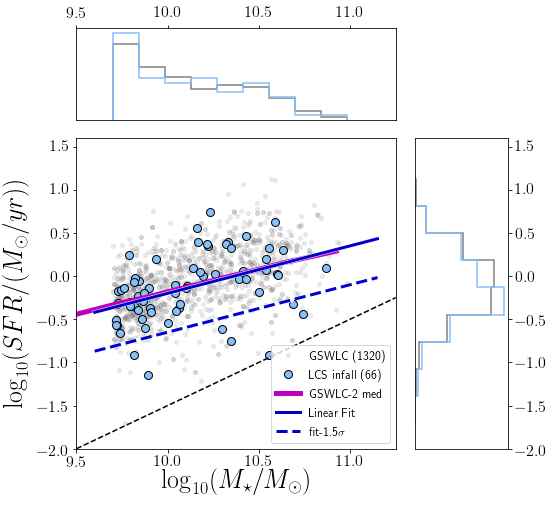

In [44]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7
flag = ~b.lcs.cat['membflag'] & (b.lcs.cat['DELTA_V'] < 3.)
outfile1 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut-massmatch.pdf'
outfile2 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut-massmatch.png'
b.plot_sfr_mstar(lcsflag=flag,label='LCS infall',lcsinfall=True,outfile1=outfile1,outfile2=outfile2,coreflag=False,hexbinflag=False,massmatch=True)

### SFR - M*: LCS core vs infall, with B/T cut ###

* masses and SFRs are the same

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
550 550 550 550
number in core sample =  72
number in external sample =  66
just checking ... 72 66
9.702
9.715
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.11
p-vale = 7.855e-01 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =  -0.62
p-vale = 0.66764 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.16
p-vale = 2.987e-01 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =   1.10
p-vale = 0.11427 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

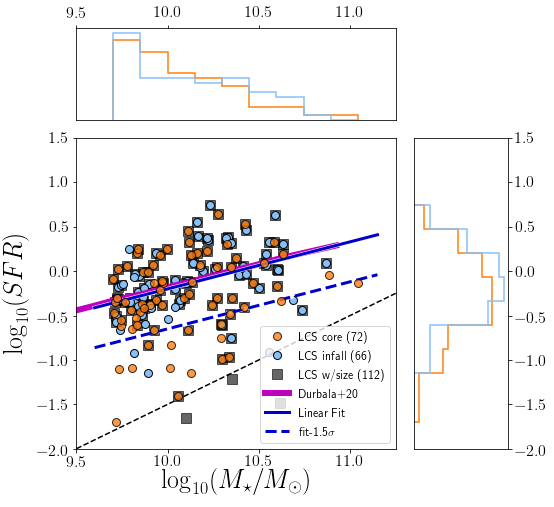

In [195]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7
outfile1 = homedir+'/research/LCS/plots/lcscore-external-sfrmstar-BTcut.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-external-sfrmstar-BTcut.png'
b.plot_sfr_mstar_lcs(outfile1=outfile1,outfile2=outfile2,nbins=10)

# $\Delta$ SFR and HI Deficiency

* cross-matched our LCS catalog with A100 - 94 matches
* can calculate HI def from Petro r 90 
  * correct radius according to https://www.aanda.org/articles/aa/full_html/2013/12/aa21326-13/aa21326-13.html
  * this says $D_{25} = 1.58 D_{SDSS}$, where $D_{SDSS}$ is the 90 Petrosian R-band
* scaling relation for HI mass and D25 for AMIGA galaxies is here: https://www.aanda.org/articles/aa/full_html/2018/01/aa31448-17/aa31448-17.html
  * gradient = 0.86 ± 0.04 	
  * intercept = 7.32 ± 0.13
  * logMHI = a + b* 2 logD25_kpc


got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-2020Nov11-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433
just checking ... 15 12
0.042752266
-0.027439117
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.43
p-vale = 1.263e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.35
p-vale = 3.142e-01 (prob that samples are from same distribution)
SpearmanrResult(correlation=0.17835212246109816, pvalue=0.3287516451016239)


<Figure size 489.6x360 with 0 Axes>

<Figure size 489.6x360 with 0 Axes>

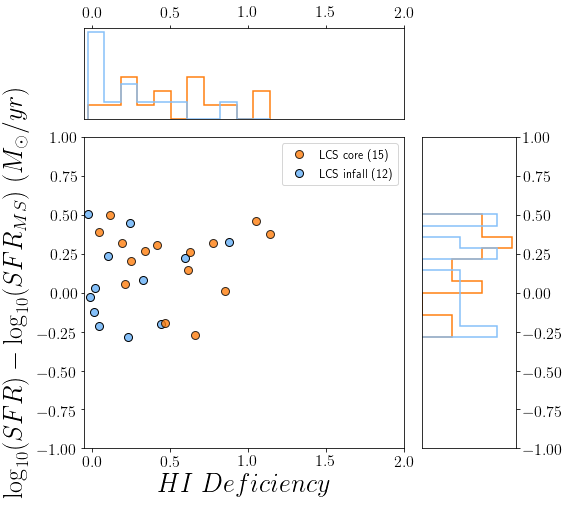

In [91]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9
outfile1 = homedir+'/research/LCS/plots/delta-sfr-HIdef.pdf'
outfile2 = homedir+'/research/LCS/plots/delta-sfr-HIdef.png'
b.plot_dsfr_HIdef(outfile1=outfile1,outfile2=outfile2)

# Plot LIR vs GSWLC SFR

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-13-2020Nov25-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433
got sb flag
543 543 543 543


<Figure size 489.6x360 with 0 Axes>

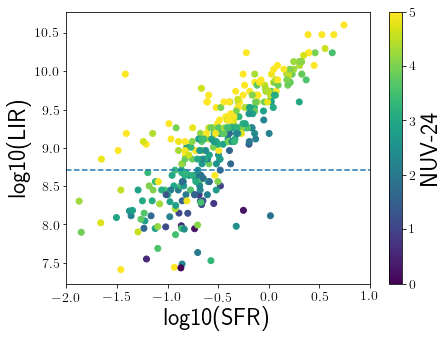

In [127]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7
plt.figure()
plt.scatter(b.lcs.cat['logSFR'],np.log10(b.lcs.cat['LIR_ZDIST']),c=b.lcs.NUV24,vmin=0,vmax=5)
plt.colorbar(label='NUV-24')
plt.xlim(-2,1)
plt.xlabel('log10(SFR)')
plt.ylabel('log10(LIR)')
plt.axhline(y=np.log10(5.2e8),ls='--')

# Next Steps

* rerun analysis with uvir flag
  * do results change?
  * where are the galaxies that we are dropping - are they preferentially below the main sequence and/or high ellipticity
  * if these are not the most edge-on galaxies, then we can keep them in the sample
  
  * **RESULTS:** Difference b/w core and field is no longer significant
  
```
        self.lcs_mass_sfr_flag = (self.lcs.cat['logMstar']> self.masscut)  & (self.lcs.ssfr > self.ssfrcut)
        self.gsw_mass_sfr_flag = (self.gsw.cat['logMstar']> self.masscut)  & (self.gsw.ssfr > self.ssfrcut)                 

        self.gsw_uvir_flag = (self.gsw.cat['flag_uv']> 0)  & (self.gsw.cat['flag_midir'] > 0)
        self.lcs_uvir_flag = (self.lcs.cat['flag_uv']> 0)  & (self.lcs.cat['flag_midir'] > 0)                         

```
* we got stuck b/c we were interpreting low SFRs as low sfrs but they might be low due to internal extinction that arises from highly inclined systems.


* compare our UV+IR SFRs with SFRs from samir.  what does difference look like as a function of ellipticity?
  * **RESULT:** no obvious systematics, although the sample is small
  
* check if uv or ir is the limiting factor.  we expect that most should have ir coverage because wise is allsky.  

* however, there were some that had a uv survey listed but flag_uv was zero.  are upper limits used in SED fitting for galaxies that are imaged by galex but not detected?



outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
550 550 550 550
CORE
0.16363636363636364 [-0.04379312  0.05580613]
INFALL
0.06779661016949153 [-0.02604157  0.04044838]
FIELD
0.06430659304969145 [-0.00250542  0.00259975]
(2,)


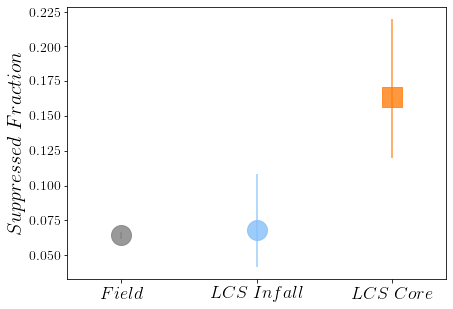

In [19]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7
outfile1 = homedir+'/research/LCS/plots/fsuppressed-btcut1-uvirflag1.pdf'
outfile2 = homedir+'/research/LCS/plots/fsuppressed-btcut1-uvirflag1.png'
b.plot_frac_suppressed(uvirflag=True)#outfile1=outfile1,outfile2=outfile2,nbins=12)
plt.savefig(outfile1)
plt.savefig(outfile2)

## Remake $\Delta$SFR vs ellipticity, marking galaxies without uvir flag


**Conclusion:**
* requiring the uvir_flag does not change the trend of lower $\Delta$SFR vs ellip for GSWLC galaxies


outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
550 550 550 550


No handles with labels found to put in legend.


<Figure size 489.6x360 with 0 Axes>

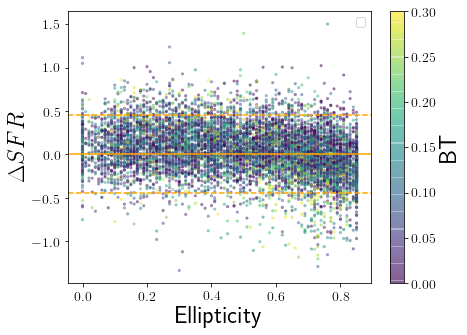

In [23]:
# compare ellipticity vs delta SFR in the field
# also make cut on sersic index
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7 --BT .3
sersic_flag = b.gsw.cat['ng'] < 2
gflag = b.gsw_mass_sfr_flag  & b.gsw_uvir_flag & sersic_flag
dsfr = b.gsw.dsfr[gflag]
ellipt = b.gsw.cat['e_2'][gflag]
bt =  b.gsw.cat[BTkey][gflag]
plt.figure()
plt.scatter(ellipt,dsfr,marker='o',c=bt,alpha=.4,s=5)
plt.colorbar(label='BT')
plt.xlabel('Eccentricity?')
plt.ylabel('$\Delta SFR$')
plt.axhline(y=0,ls='-',color='orange')
plt.axhline(y=0.45,ls='--',color='orange')
plt.axhline(y=-0.45,ls='--',color='orange')
#plt.legend()

## See where the galaxies without uvir flag fall on SFR-Mstar plot


**Conclusion:**

* CORE: when requiring the uvir detections for GSWLC, the difference between core and field is not significant


outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
550 550 550 550


###########################################
######  WITHOUT UVIR FLAG
###########################################
number in lcs sample =  74
number in gsw sample =  9237
just checking ... 9237 74
9.701
9.702
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.09
p-vale = 6.123e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.26
p-vale = 8.356e-05 (prob that samples are from same distribution)


###########################################
######  REQUIRING UVIR FLAG
###########################################
number in lcs sample =  68
number in gsw sample =  9237
just checking ... 9237 68
9.701
9.702
############################################################# 
KS test comparising galaxies within range shown

<Figure size 489.6x360 with 0 Axes>

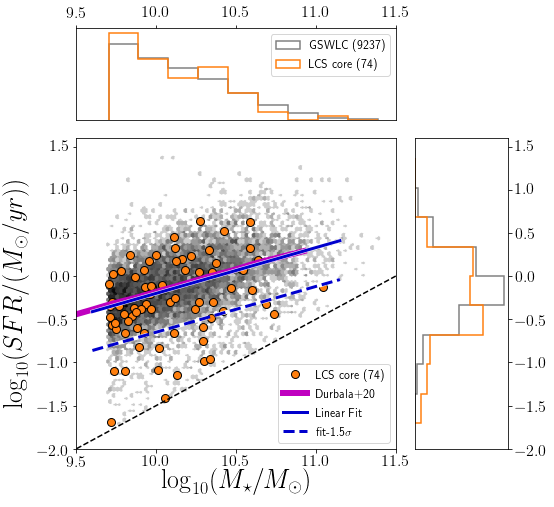

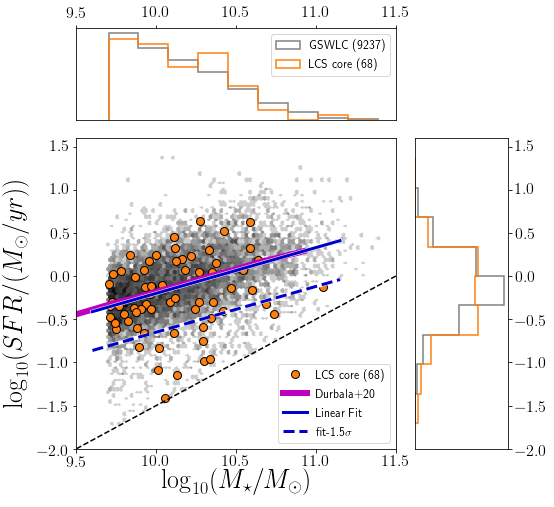

In [126]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --BT .3 --minmass 9.7

print("")
print("")
print("###########################################")
print("######  WITHOUT UVIR FLAG")
print("###########################################")
flag = b.lcs.cat['membflag'] 
flag = b.lcs.membflag
outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut.png'
b.plot_sfr_mstar(lcsflag=flag,coreflag=True,outfile1=outfile1,outfile2=outfile2,massmatch=False,hexbinflag=True)

#time.sleep(1)
#
print("")
print("")
print("###########################################")
print("######  REQUIRING UVIR FLAG")
print("###########################################")
irflag = b.lcs.cat['flag_midir'] > 0
flag = b.lcs.membflag & irflag
outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut-uvirflag1.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut-uvirflag1.png'
b.plot_sfr_mstar(lcsflag=flag,coreflag=True,outfile1=outfile1,outfile2=outfile2,massmatch=False,hexbinflag=True)

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
550 550 550 550
number in lcs sample =  64
number in gsw sample =  9237
just checking ... 9237 64
9.701
9.715
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.13
p-vale = 2.490e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.07
p-vale = 9.105e-01 (prob that samples are from same distribution)


###########################################
######  REQUIRING UVIR FLAG
###########################################
number in lcs sample =  59
number in gsw sample =  9237
just checking ... 9237 59
9.701
9.715
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.10
p-vale = 5.688e-01 (prob that samples are from same distribution)

CO

<Figure size 489.6x360 with 0 Axes>

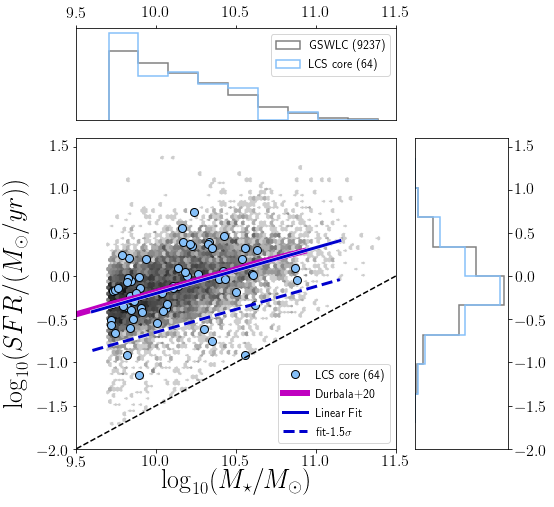

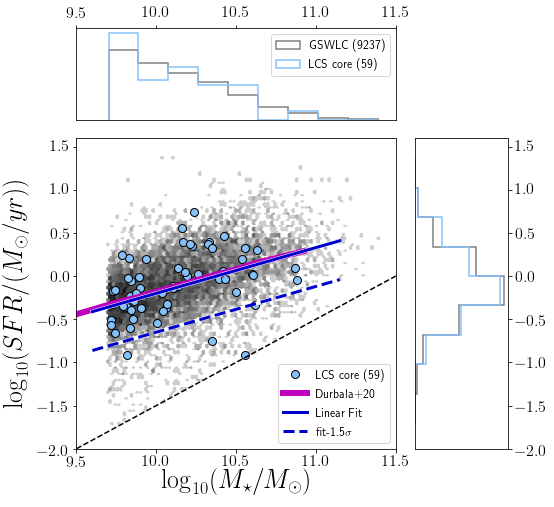

In [38]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7
 
print("")
print("")
print("###########################################")
print("######  WITHOUT UVIR FLAG")
print("###########################################")
flag = b.lcs.infallflag
outfile1 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut.pdf'
outfile2 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut.png'
b.plot_sfr_mstar(lcsflag=flag,coreflag=False,outfile1=outfile1,outfile2=outfile2,massmatch=False,hexbinflag=True)

#time.sleep(1)
#
print("")
print("")
print("###########################################")
print("######  REQUIRING UVIR FLAG")
print("###########################################")
flag = b.lcs.infallflag & b.lcs_uvir_flag
outfile1 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut-uvirflag1.pdf'
outfile2 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut-uvirflag1.png'
b.plot_sfr_mstar(lcsflag=flag,coreflag=False,outfile1=outfile1,outfile2=outfile2,massmatch=False,hexbinflag=True)

## Compare SFR_KE vs SFR_GSWLC vs ellipticity


**Conclusion:**

* No obvious trends, maybe GSWLC SFR are slightly higher.



outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
550 550 550 550


<Figure size 489.6x360 with 0 Axes>

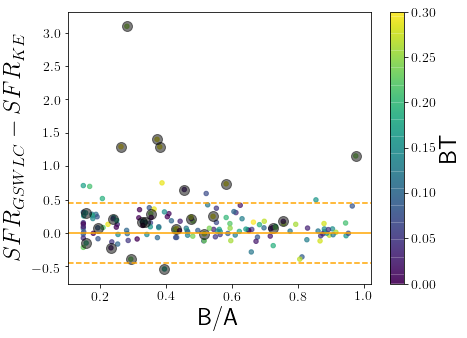

In [99]:
# compare ellipticity vs delta SFR in the field
# also make cut on sersic index
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7 --BT .3

plt.figure()

flag = b.lcs_mass_sfr_flag  &  ~b.lcs_uvir_flag
dsfr =  b.lcs.cat['logSFR'][flag]- b.lcs.cat['logSFR_NUVIR_KE'][flag]
ellipt = b.lcs.cat['SERSIC_BA'][flag]
plt.plot(ellipt,dsfr,'ko',mfc=None,markersize=10,alpha=.5)
flag = b.lcs_mass_sfr_flag  
dsfr =  b.lcs.cat['logSFR'][flag]- b.lcs.cat['logSFR_NUVIR_KE'][flag]
ellipt = b.lcs.cat['SERSIC_BA'][flag]
bt =  b.lcs.cat[BTkey][flag]

plt.scatter(ellipt,dsfr,marker='o',c=bt,alpha=.7,s=20)
plt.colorbar(label='BT')
plt.xlabel('B/A')
plt.ylabel('$ SFR_{GSWLC} - SFR_{KE}$')
plt.axhline(y=0,ls='-',color='orange')
plt.axhline(y=0.45,ls='--',color='orange')
plt.axhline(y=-0.45,ls='--',color='orange')
#plt.legend()

# Check if uv or ir flag is the most limiting



In [18]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2.py --cutBT --minmass 9.7 --BT .4 --ellip 0.75

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
665 665 665 665


<Figure size 489.6x360 with 0 Axes>

In [19]:
lcsbaseflag = (b.lcs.membflag | b.lcs.infallflag) & (b.lcs_mass_sfr_flag)

In [30]:
def make_venn():
    lcsbaseflag = (b.lcs.membflag | b.lcs.infallflag) & (b.lcs_mass_sfr_flag)
    # number with UV flag
    uvflag = b.lcs.cat['flag_uv'] > 0
    irflag = b.lcs.cat['flag_midir'] > 0
    nlcs = sum(lcsbaseflag)
    print('number/fraction of LCS with uv    flag {}/{},{:.2f}'.format(sum(uvflag&lcsbaseflag),nlcs,sum(uvflag&lcsbaseflag)/nlcs))
    print('number/fraction of LCS with midir flag {}/{},{:.2f}'.format(sum(irflag&lcsbaseflag),nlcs,sum(irflag&lcsbaseflag)/nlcs))
    print('number/fraction of LCS with uv    flag {}/{},{:.2f}'.format(sum(uvflag&lcsbaseflag),nlcs,sum(uvflag&lcsbaseflag)/nlcs))
    print('number/fraction of LCS with both  flag {}/{},{:.2f}'.format(sum(irflag&uvflag&lcsbaseflag),nlcs,sum(irflag&uvflag&lcsbaseflag)/nlcs))
    
    #masssfrflag = set(b.lcs.cat['NSAID'][lcsbaseflag])
    uv = set(b.lcs.cat['NSAID'][uvflag & lcsbaseflag])
    ir = set(b.lcs.cat['NSAID'][irflag & lcsbaseflag])
    size = set(b.lcs.cat['NSAID'][b.lcs.sampleflag & lcsbaseflag])
    print(len(uv),len(ir),len(size))
    v = venn2([uv,ir],set_labels=['UV','IR'])
    #plt.legend()

In [22]:
noir = lcsbaseflag & ~irflag


In [23]:
ra = b.lcs.cat['RA_1'][noir]
dec = b.lcs.cat['DEC_1'][noir]
for i in range(len(ra)): print(ra[i],dec[i])

201.98936 11.875328
219.75362 3.51745
220.33842 3.5441575
219.95457 3.3515255
241.07591 24.280684
241.17801 17.498484
241.28343 17.815323
230.85281 8.184486
231.37508 8.93508
228.84169 8.3575945
229.3891 6.7827682
229.18707 6.839032
229.33199 7.6135416
229.20274 7.05574
193.99898 27.95509
194.85895 28.287563
195.04266 27.863968


118 129 108


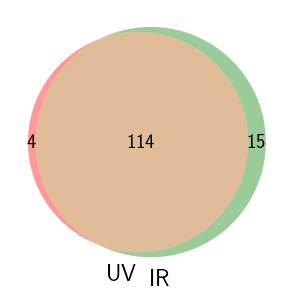

126 132 101


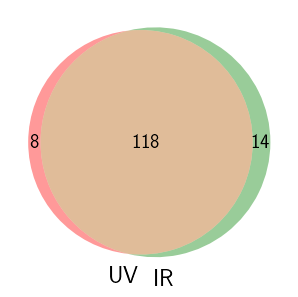

In [25]:
#masssfrflag = set(b.lcs.cat['NSAID'][lcsbaseflag])
uv = set(b.lcs.cat['NSAID'][uvflag & lcsbaseflag])
ir = set(b.lcs.cat['NSAID'][irflag & lcsbaseflag])
size = set(b.lcs.cat['NSAID'][b.lcs.sampleflag & lcsbaseflag])
print(len(uv),len(ir),len(size))
v = venn2([uv,ir],set_labels=['UV','IR'])
#plt.legend()

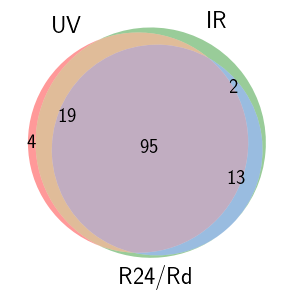

In [88]:
#masssfrflag = set(b.lcs.cat['NSAID'][lcsbaseflag])
uv = set(b.lcs.cat['NSAID'][uvflag & lcsbaseflag])
ir = set(b.lcs.cat['NSAID'][irflag & lcsbaseflag])
size = set(b.lcs.cat['NSAID'][b.lcs.sampleflag & lcsbaseflag])
v = venn3([uv,ir,size],set_labels=['UV','IR','R24/Rd'])
#plt.legend()

# Moving forward

* no difference in SFRs

* this is consistent with what we saw before, in that galaxies with smaller sf disks do not have smaller sfrs

# What if we cut sample on eccentricity?

$$e = \sqrt{1 - \left(\frac{b}{a}\right)^2}$$

so if we want $e < 0.6 $, then

$$ B/A = 1 - e^2 $$

In [94]:
ba = 1 - .6

In [95]:
ba

0.4

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
550 550 550 550


###########################################
######  WITH UVIR FLAG
###########################################
number in lcs sample =  68
number in gsw sample =  9237
just checking ... 9237 68
9.701
9.702
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.06
p-vale = 9.617e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.22
p-vale = 2.746e-03 (prob that samples are from same distribution)
###########################################
######  REQUIRING B/A > cut
###########################################
number in lcs sample =  44
number in gsw sample =  9237
just checking ... 9237 44
9.701
9.702
############################################################# 
KS test comparising galaxies within range shown on t

<Figure size 489.6x360 with 0 Axes>

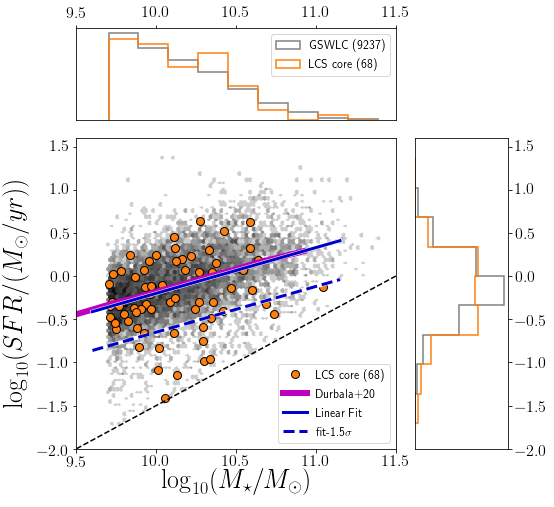

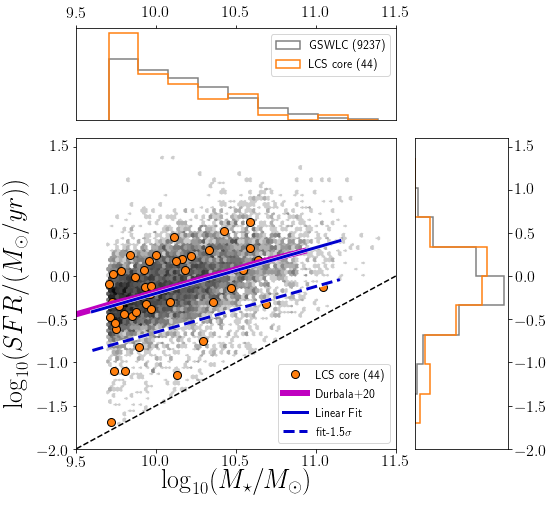

In [14]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7

print("")
print("")
print("###########################################")
print("######  WITH UVIR FLAG")
print("###########################################")
flag = b.lcs.cat['membflag'] 
uvflag = b.lcs.cat['flag_uv'] > 0
irflag = b.lcs.cat['flag_midir'] > 0


flag = b.lcs.membflag & irflag
outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut.png'
b.plot_sfr_mstar(lcsflag=flag,coreflag=True,outfile1=outfile1,outfile2=outfile2,massmatch=False,hexbinflag=True)

#time.sleep(1)
#
#print("")
#print("")
ba =.4
print("###########################################")
print("######  REQUIRING B/A > cut")
print("###########################################")
flag = b.lcs.membflag & (b.lcs.cat['SERSIC_BA'] > ba)
outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut-uvirflag1.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut-uvirflag1.png'
b.plot_sfr_mstar(lcsflag=flag,coreflag=True,outfile1=outfile1,outfile2=outfile2,massmatch=False,hexbinflag=True)

# comparing dSFR for those with and without IR flag

what is our conclusion from this?

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
550 550 550 550


(0, 1)

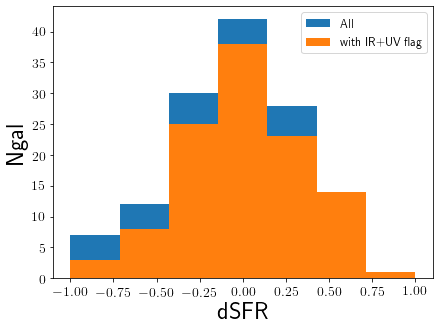

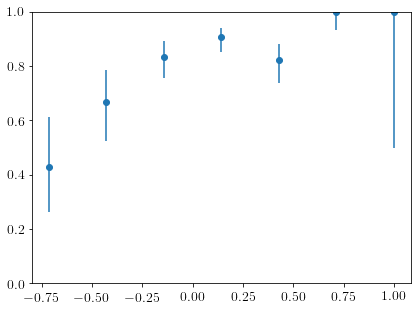

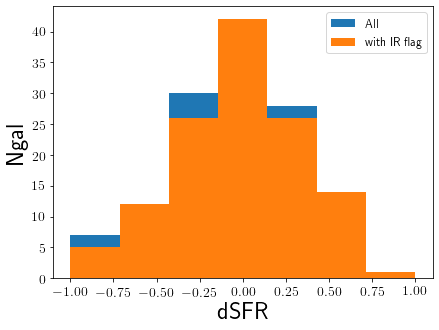

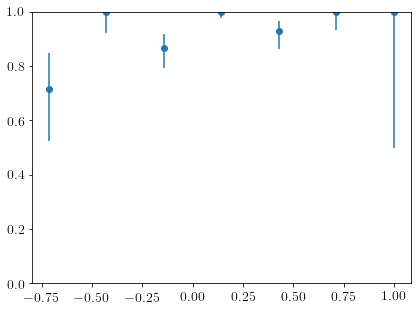

In [8]:
# comparing dSFR for those with and without IR flag
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7

lcsbaseflag = (b.lcs.membflag | b.lcs.infallflag) & (b.lcs_mass_sfr_flag)
# number with UV flag
uvflag = b.lcs.cat['flag_uv'] > 0
irflag = b.lcs.cat['flag_midir'] > 0
nlcs = sum(lcsbaseflag)
dsfr = b.lcs.dsfr[lcsbaseflag]
# make plot showing fraction of uv+ir vs dsfr
dsfr = b.lcs.dsfr
mybins = np.linspace(-1.,1,8)


t = plt.hist(dsfr[lcsbaseflag],bins=mybins, label='All')
y1,bins = t[0],t[1]
y2,bins,junk = plt.hist(dsfr[lcsbaseflag   & irflag & uvflag],bins=mybins,label='with IR+UV flag')
plt.xlabel('dSFR')
plt.ylabel('Ngal')
plt.legend()

frac_err = binom_conf_interval(y2,y1)#lower, upper
yerr = np.abs(frac_err - y2/y1)

plt.figure()
plt.errorbar(bins[1:],y2/y1,yerr=yerr,fmt='o')
plt.ylim(0,1)


plt.figure()
t = plt.hist(dsfr[lcsbaseflag],bins=mybins, label='All')
y1,bins = t[0],t[1]
y2,bins,junk = plt.hist(dsfr[lcsbaseflag   & irflag],bins=mybins,label='with IR flag')
plt.xlabel('dSFR')
plt.ylabel('Ngal')
plt.legend()

frac_err = binom_conf_interval(y2,y1)#lower, upper
yerr = np.abs(frac_err - y2/y1)

plt.figure()
plt.errorbar(bins[1:],y2/y1,yerr=yerr,fmt='o')
plt.ylim(0,1)

In [113]:
frac_err = binom_conf_interval(y2,y1)#lower, upper

In [114]:
frac_err

array([[0.7213463 , 0.85215927],
       [0.82277133, 0.92725247]])

In [117]:
yerr = abs(frac_err - y2/y1)

In [118]:
yerr

array([[0.05477311, 0.04336312],
       [0.04665193, 0.03173008]])

# Next Steps

* DONE- ask Samir if UV/IR flags are detection flags as well as coverage
  * if the flags are just coverage flag, then we shouldn't see any trends with sSFR.
  * the trends we see indicate that the UV flag is based on detection limit AND coverage
  * the table online is different from table in paper


* DONE - is it ok to not require UV detection.  is optical+IR sed SFR sufficient.  
  * ask Samir
  
  
* inclination - are we still biased at low SFR toward inclined SFRs, even after requiring IR detection

* can we reproduce Samir's plots
  * for full GSWLC sample
  * for redshift slices
  * ask Samir which redshift cuts he was using in his plots
  
  
### How samir uses IR data

* pg 5 of 2018 paper, section 3.2
* they don't add new points to the SED fit
* they calculate LIR from the WISE data because they think that the luminosity-based LIR conversions do a good job at recovering LIR.  In addition, this simplification makes the computation feasible for the full sample.
  * fitting data directly would increase number of models by a factor of 50
* they compare the LIR from the SED fitting with the measured LIR from WISE.  
  * chisq from model vs data (GALEX and SDSS), and an additional data point from LIR_predicted vs LIR_measured.

# NEXT steps (2021-Mar-17)

* recheck - if we require just irflag, do we still see offset in SFR.

* then what about the properties of the low SFRs.  is the inclination still an issue.
  * do we still see this if we use the uv+ir flag?
  * if we do, can we cut on B/A to exclude the trend with B/A but still retain the galaxies with no uv and/or ir detection?
  
* if so, do we still have systematics with inclined galaxies are the low SFR
  * is some of difference due to inclined galaxies
  
  
# Thoughts

* we can use the full sample, but state that we check the SFRs using more restrictive cuts, and the results still hold.


# Compare our SFR with Samir

* distinguish those with and without UV flag

In [10]:
b.lcs.cat.colnames

['NSAID',
 'IAUNAME',
 'SUBDIR',
 'RA_1',
 'DEC_1',
 'ZDIST',
 'SERSIC_TH50',
 'SERSIC_N',
 'SERSIC_BA',
 'SERSIC_PHI',
 'PETROTH50',
 'PETROTH90',
 'D4000',
 'HAEW',
 'VDISP',
 'FA',
 'HAFLUX',
 'N2FLUX',
 'HBFLUX',
 'O3FLUX',
 'AHDEW',
 'AV_1',
 'ISDSS',
 'IALFALFA',
 'NMGY',
 'NMGY_IVAR',
 'ABSMAG',
 'SERSICFLUX',
 'CLUMPY',
 'ASYMMETRY',
 'RUN',
 'CAMCOL',
 'FIELD',
 'RERUN',
 'HIMASS',
 'AGNKAUFF',
 'AGNKEWLEY',
 'AGNSTASIN',
 'AGCNUMBER',
 'fmag1',
 'fmag1err',
 'fnsersic1',
 'fnsersic1err',
 'fre1',
 'fre1err',
 'faxisratio1',
 'faxisratio1err',
 'fpa1',
 'fpa1err',
 'fxc1',
 'fyc1',
 'fnumerical_error_flag24',
 'fchi2nu',
 'fcmag1',
 'fcmag1err',
 'fcnsersic1',
 'fcnsersic1err',
 'fcre1',
 'fcre1err',
 'fcaxisratio1',
 'fcaxisratio1err',
 'fcpa1',
 'fcpa1err',
 'fcxc1',
 'fcyc1',
 'fcnumerical_error_flag24',
 'fcchi2nu',
 'matchflag',
 'B_T_r',
 'e__B_T_r_1',
 'S2g_1',
 'Re_1',
 'e_Re_1',
 'Rd_1',
 'e_Rd_1',
 'Rhlr_2',
 'ng',
 'e_ng',
 'p_elliptical',
 'p_spiral',
 'p_el',
 'p_

# Redoing the analysis with irflag = True



outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
550 550 550 550


###########################################
######  WITH IR FLAG
###########################################
number in lcs sample =  68
number in gsw sample =  9237
just checking ... 9237 68
9.701
9.702
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.06
p-vale = 9.617e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.22
p-vale = 2.746e-03 (prob that samples are from same distribution)
###########################################
######  REQUIRING B/A > cut, BUT NOT IR FLAG
###########################################
number in lcs sample =  55
number in gsw sample =  9237
just checking ... 9237 55
9.701
9.702
############################################################# 
KS test comparising galaxies within r

<Figure size 489.6x360 with 0 Axes>

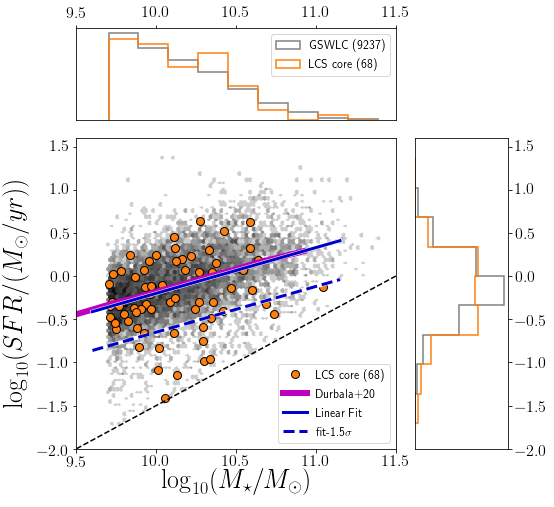

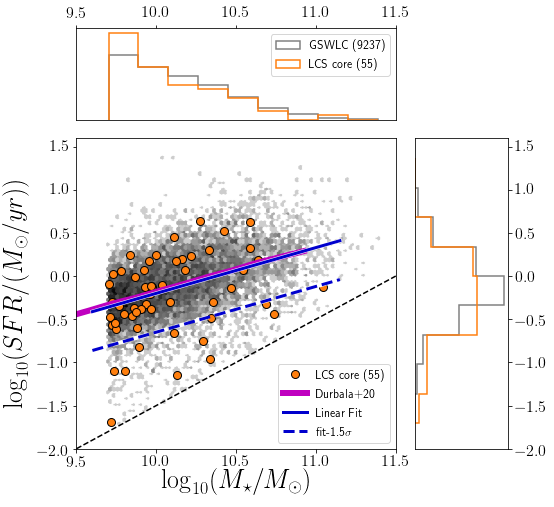

In [69]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2.py --cutBT --minmass 9.7

print("")
print("")
print("###########################################")
print("######  WITH IR FLAG")
print("###########################################")
flag = b.lcs.cat['membflag'] 
uvflag = b.lcs.cat['flag_uv'] > 0
irflag = b.lcs.cat['flag_midir'] > 0


flag = b.lcs.membflag & irflag
outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut.png'
b.plot_sfr_mstar(lcsflag=flag,coreflag=True,outfile1=outfile1,outfile2=outfile2,massmatch=False,hexbinflag=True)

#time.sleep(1)
#
#print("")
#print("")
ba =.3
print("###########################################")
print("######  REQUIRING B/A > cut, BUT NOT IR FLAG")
print("###########################################")
flag = b.lcs.membflag & (b.lcs.cat['SERSIC_BA'] > ba)
outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut-uvirflag1.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut-uvirflag1.png'
b.plot_sfr_mstar(lcsflag=flag,coreflag=True,outfile1=outfile1,outfile2=outfile2,massmatch=False,hexbinflag=True)

## What do the low sfr galaxies look like?

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
550 550 550 550


###########################################
######  WITH UVIR FLAG
###########################################
getting legacy images for  14  galaxies


<Figure size 489.6x360 with 0 Axes>

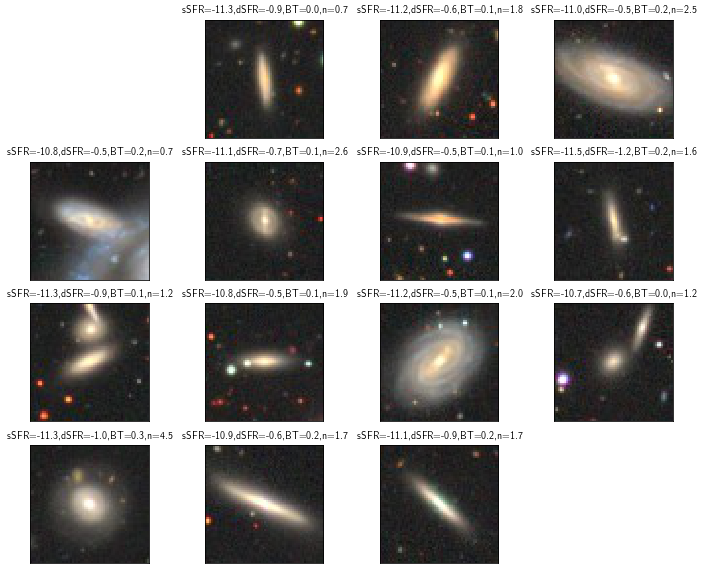

In [8]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2.py --cutBT --minmass 9.7

print("")
print("")
print("###########################################")
print("######  WITH UVIR FLAG")
print("###########################################")
flag = b.lcs.cat['membflag'] 
uvflag = b.lcs.cat['flag_uv'] > 0
irflag = b.lcs.cat['flag_midir'] > 0


flag = b.lcs.membflag & irflag

b.core_getlegacy(extraflag=irflag)

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
550 550 550 550


###########################################
######  WITH UVIR FLAG
###########################################
getting legacy images for  6  galaxies


<Figure size 489.6x360 with 0 Axes>

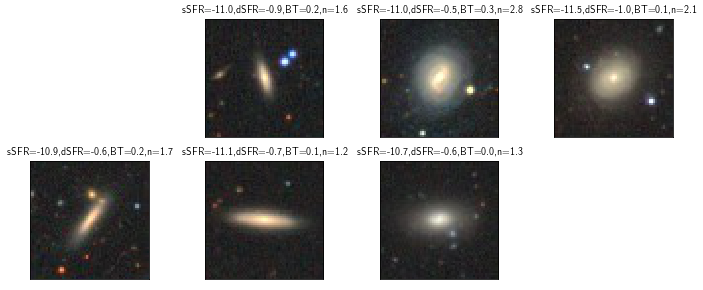

In [9]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2.py --cutBT --minmass 9.7

print("")
print("")
print("###########################################")
print("######  WITH UVIR FLAG")
print("###########################################")
flag = b.lcs.cat['membflag'] 
uvflag = b.lcs.cat['flag_uv'] > 0
irflag = b.lcs.cat['flag_midir'] > 0

b.infall_getlegacy(extraflag=irflag)

# Comparing our SFRs with Salim SFRs


why?  To see if our sfrs differ for highly inclined systems.  so make a plot of difference in sfrs versus b/a

In [10]:
b.lcs.cat.colnames

['NSAID',
 'IAUNAME',
 'SUBDIR',
 'RA_1',
 'DEC_1',
 'ZDIST',
 'SERSIC_TH50',
 'SERSIC_N',
 'SERSIC_BA',
 'SERSIC_PHI',
 'PETROTH50',
 'PETROTH90',
 'D4000',
 'HAEW',
 'VDISP',
 'FA',
 'HAFLUX',
 'N2FLUX',
 'HBFLUX',
 'O3FLUX',
 'AHDEW',
 'AV_1',
 'ISDSS',
 'IALFALFA',
 'NMGY',
 'NMGY_IVAR',
 'ABSMAG',
 'SERSICFLUX',
 'CLUMPY',
 'ASYMMETRY',
 'RUN',
 'CAMCOL',
 'FIELD',
 'RERUN',
 'HIMASS',
 'AGNKAUFF',
 'AGNKEWLEY',
 'AGNSTASIN',
 'AGCNUMBER',
 'fmag1',
 'fmag1err',
 'fnsersic1',
 'fnsersic1err',
 'fre1',
 'fre1err',
 'faxisratio1',
 'faxisratio1err',
 'fpa1',
 'fpa1err',
 'fxc1',
 'fyc1',
 'fnumerical_error_flag24',
 'fchi2nu',
 'fcmag1',
 'fcmag1err',
 'fcnsersic1',
 'fcnsersic1err',
 'fcre1',
 'fcre1err',
 'fcaxisratio1',
 'fcaxisratio1err',
 'fcpa1',
 'fcpa1err',
 'fcxc1',
 'fcyc1',
 'fcnumerical_error_flag24',
 'fcchi2nu',
 'matchflag',
 'B_T_r',
 'e__B_T_r_1',
 'S2g_1',
 'Re_1',
 'e_Re_1',
 'Rd_1',
 'e_Rd_1',
 'Rhlr_2',
 'ng',
 'e_ng',
 'p_elliptical',
 'p_spiral',
 'p_el',
 'p_

Text(0, 0.5, 'LCS logSFR')

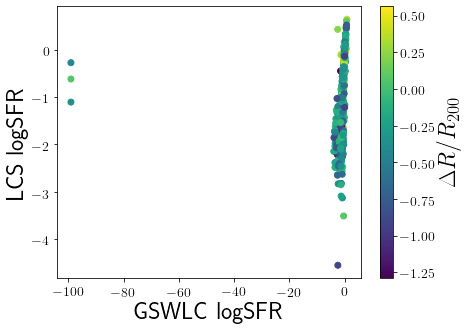

In [34]:
x = b.lcs.cat['logSFR']
y = b.lcs.cat['logSFR_NUVIR_KE']
color = np.log10(b.lcs.cat['DR_R200'])
plt.figure()
sp = plt.scatter(x,y,c=color)
cb = plt.colorbar(sp,label=r'$\Delta R/R_{200}$')
plt.xlabel('GSWLC logSFR')
plt.ylabel('LCS logSFR')

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
550 550 550 550


<Figure size 489.6x360 with 0 Axes>

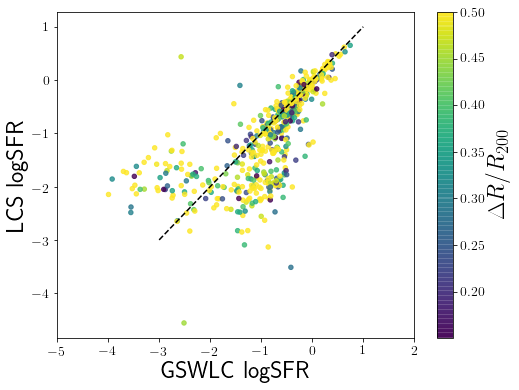

In [106]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2.py --cutBT --minmass 9.7
x = b.lcs.cat['logSFR']
y = b.lcs.cat['logSFR_NUVIR_KE']
color = np.log10(b.lcs.cat['DR_R200'])
color = (b.lcs.cat['flag_midir'])
color = (b.lcs.cat['SERSIC_BA'])
plt.figure(figsize=(8,6))
sp = plt.scatter(x,y,c=color,s=20,alpha=.8,vmax=.5)

cb = plt.colorbar(sp,label=r'$\Delta R/R_{200}$')
plt.xlabel('GSWLC logSFR')
plt.ylabel('LCS logSFR')
plt.xlim(-5,2)
#plt.ylim(-3,1)
xline = np.linspace(-3,1,100)
plt.plot(xline,xline,'k--')

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
550 550 550 550


<Figure size 489.6x360 with 0 Axes>

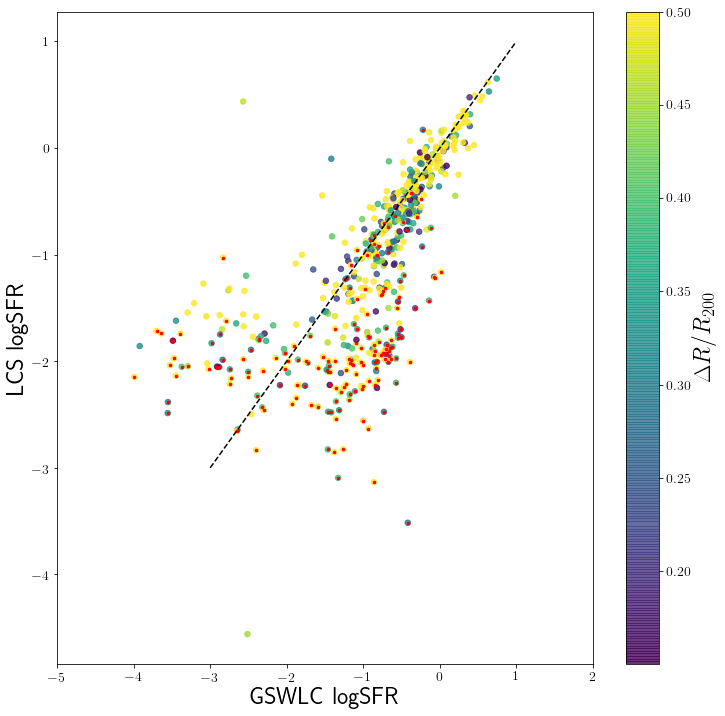

In [109]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2.py --cutBT --minmass 9.7
x = b.lcs.cat['logSFR']
y = b.lcs.cat['logSFR_NUVIR_KE']
color = np.log10(b.lcs.cat['DR_R200'])
color = (b.lcs.cat['flag_midir'])
color = (b.lcs.cat['SERSIC_BA'])
plt.figure(figsize=(12,12))
sp = plt.scatter(x,y,c=color,s=30,alpha=.8,vmax=.5)
cb = plt.colorbar(sp,label=r'$\Delta R/R_{200}$')

flag = b.lcs.cat['flag_midir'] == 0
plt.plot(x[flag],y[flag],'r.',markersize=5)
plt.xlabel('GSWLC logSFR')
plt.ylabel('LCS logSFR')
plt.xlim(-5,2)
#plt.ylim(-3,1)
xline = np.linspace(-3,1,100)
plt.plot(xline,xline,'k--')

# fraction of IR detected galaxies vs SFR

* going to look at face on vs edge on galaxies, to see if their ir detection fractions differ as a function of SFR

In [114]:
import scipy

In [116]:
help(scipy.stats.binned_statistic)

Help on function binned_statistic in module scipy.stats._binned_statistic:

binned_statistic(x, values, statistic='mean', bins=10, range=None)
    Compute a binned statistic for one or more sets of data.
    
    This is a generalization of a histogram function.  A histogram divides
    the space into bins, and returns the count of the number of points in
    each bin.  This function allows the computation of the sum, mean, median,
    or other statistic of the values (or set of values) within each bin.
    
    Parameters
    ----------
    x : (N,) array_like
        A sequence of values to be binned.
    values : (N,) array_like or list of (N,) array_like
        The data on which the statistic will be computed.  This must be
        the same shape as `x`, or a set of sequences - each the same shape as
        `x`.  If `values` is a set of sequences, the statistic will be computed
        on each independently.
    statistic : string or callable, optional
        The statistic to co

In [ ]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2.py --cutBT --minmass 9.7

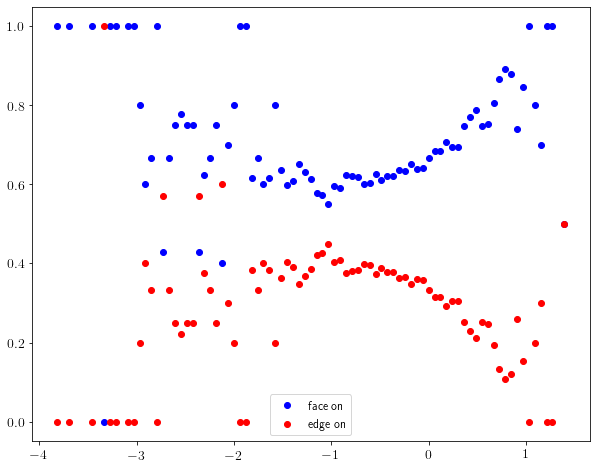

In [124]:
plt.figure(figsize=(10,8))

x = b.gsw.cat['logSFR']

ellipt_cut = 0.6
faceon = b.gsw.cat['e_2'] < ellipt_cut
allgal = np.ones(len(faceon))
mybins = np.linspace(-4,2,100)


# face on stats
ntot = scipy.stats.binned_statistic(x,allgal,statistic='sum',bins=mybins)
nfaceon = scipy.stats.binned_statistic(x,faceon,statistic='sum',bins=mybins)

ratio_faceon = nfaceon[0]/ntot[0]

nedgeon = scipy.stats.binned_statistic(x,~faceon,statistic='sum',bins=mybins)
ratio_edgeon = nedgeon[0]/ntot[0]


plt.plot(mybins[1:],ratio_faceon,'bo',label='face on')

plt.plot(mybins[1:],ratio_edgeon,'ro',label='edge on')
plt.legend()

Text(0, 0.5, 'Fraction Detected in Mid IR')

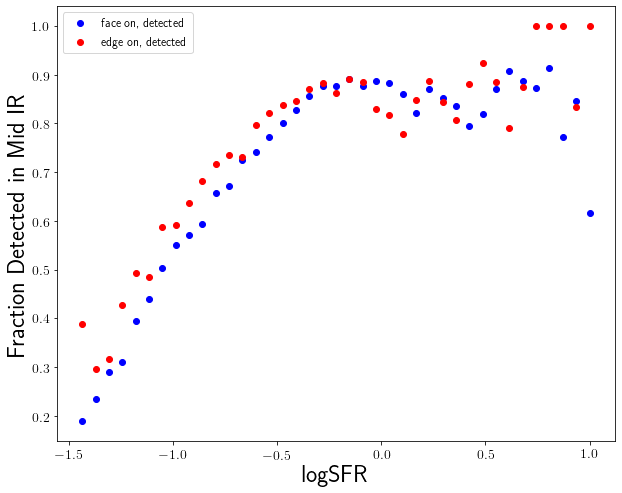

In [133]:
plt.figure(figsize=(10,8))

x = b.gsw.cat['logSFR']

ellipt_cut = 0.6
faceon = b.gsw.cat['e_2'] < ellipt_cut
faceon_detect = faceon & (b.gsw.cat['flag_midir'] >0) & (b.gsw.cat['flag_midir'] <5)
allgal = np.ones(len(faceon))
mybins = np.linspace(-1.5,1,40)

edgeon = ~faceon
edgeon_detect = edgeon & (b.gsw.cat['flag_midir'] >0) & (b.gsw.cat['flag_midir'] <5)
# face on stats
ntot_faceon = scipy.stats.binned_statistic(x,faceon,statistic='sum',bins=mybins)
nfaceon_detect = scipy.stats.binned_statistic(x,faceon_detect,statistic='sum',bins=mybins)

ratio_faceon = nfaceon_detect[0]/ntot_faceon[0]

# edge on stats
ntot_edgeon = scipy.stats.binned_statistic(x,edgeon,statistic='sum',bins=mybins)
nedgeon_detect = scipy.stats.binned_statistic(x,edgeon_detect,statistic='sum',bins=mybins)

ratio_edgeon = nedgeon_detect[0]/ntot_edgeon[0]


plt.plot(mybins[1:],ratio_faceon,'bo',label='face on, detected')

plt.plot(mybins[1:],ratio_edgeon,'ro',label='edge on, detected')


plt.legend()
plt.xlabel('logSFR')
plt.ylabel('Fraction Detected in Mid IR')

Text(0, 0.5, 'Fraction Detected in UV')

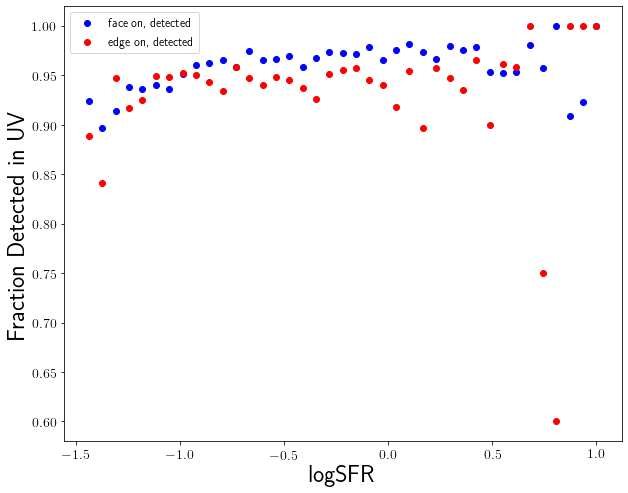

In [135]:
plt.figure(figsize=(10,8))

x = b.gsw.cat['logSFR']

ellipt_cut = 0.6
faceon = b.gsw.cat['e_2'] < ellipt_cut
faceon_detect = faceon & (b.gsw.cat['flag_uv'] >0) 
allgal = np.ones(len(faceon))
mybins = np.linspace(-1.5,1,40)

edgeon = ~faceon
edgeon_detect = edgeon & (b.gsw.cat['flag_uv'] >0) 
# face on stats
ntot_faceon = scipy.stats.binned_statistic(x,faceon,statistic='sum',bins=mybins)
nfaceon_detect = scipy.stats.binned_statistic(x,faceon_detect,statistic='sum',bins=mybins)

ratio_faceon = nfaceon_detect[0]/ntot_faceon[0]

# edge on stats
ntot_edgeon = scipy.stats.binned_statistic(x,edgeon,statistic='sum',bins=mybins)
nedgeon_detect = scipy.stats.binned_statistic(x,edgeon_detect,statistic='sum',bins=mybins)

ratio_edgeon = nedgeon_detect[0]/ntot_edgeon[0]


plt.plot(mybins[1:],ratio_faceon,'bo',label='face on, detected')

plt.plot(mybins[1:],ratio_edgeon,'ro',label='edge on, detected')


plt.legend()
plt.xlabel('logSFR')
plt.ylabel('Fraction Detected in UV')

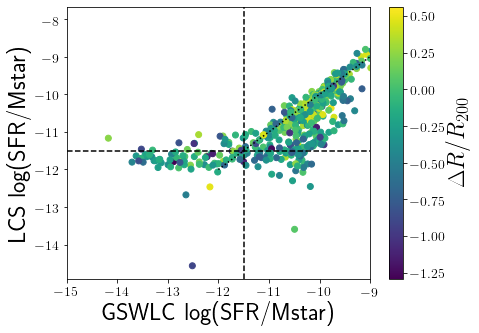

In [38]:
x = b.lcs.cat['logSFR']-b.lcs.cat['MSTAR_50']
y = b.lcs.cat['logSFR_NUVIR_KE'] - b.lcs.cat['MSTAR_50']
color = np.log10(b.lcs.cat['DR_R200'])
plt.figure()
sp = plt.scatter(x,y,c=color)
cb = plt.colorbar(sp,label=r'$\Delta R/R_{200}$')
plt.ylabel('LCS log(SFR/Mstar)')
plt.xlabel('GSWLC log(SFR/Mstar)')
plt.xlim(-15,-9)
plt.axvline(x=-11.5,ls='--',c='k')
plt.axhline(y=-11.5,ls='--',c='k')
xl = np.linspace(-12,-8)
plt.plot(xl,xl,'k:')

[-12, -8.5, -12, -8.5]

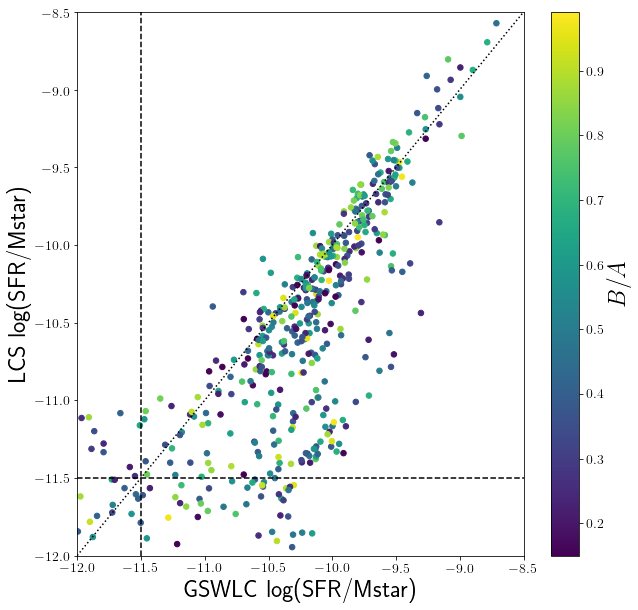

In [45]:
x = b.lcs.cat['logSFR']-b.lcs.cat['MSTAR_50']
y = b.lcs.cat['logSFR_NUVIR_KE'] - b.lcs.cat['MSTAR_50']
color = (b.lcs.cat['SERSIC_BA'])
plt.figure(figsize=(10,10))
sp = plt.scatter(x,y,c=color,s=30)
cb = plt.colorbar(sp,label=r'$B/A$')
plt.ylabel('LCS log(SFR/Mstar)')
plt.xlabel('GSWLC log(SFR/Mstar)')
plt.xlim(-15,-9)
plt.axvline(x=-11.5,ls='--',c='k')
plt.axhline(y=-11.5,ls='--',c='k')
xl = np.linspace(-12,-8)
plt.plot(xl,xl,'k:')
plt.axis([-12,-8.5,-12,-8.5])

(-4, 4)

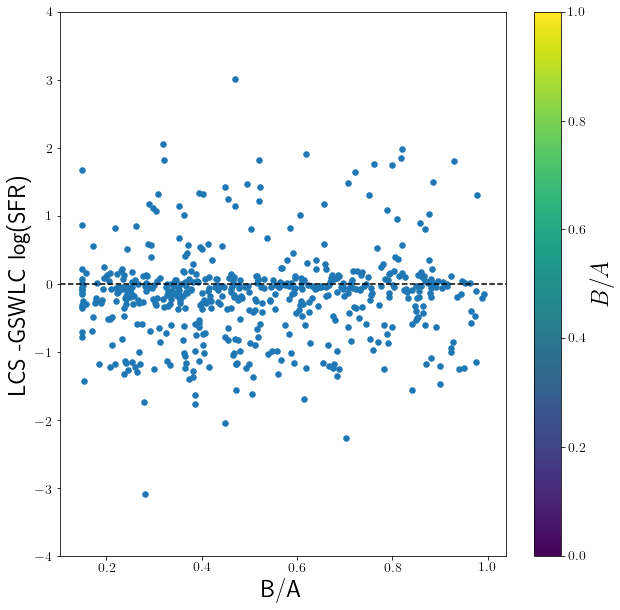

In [74]:

y = b.lcs.cat['logSFR_NUVIR_KE'] - b.lcs.cat['logSFR']
x = (b.lcs.cat['SERSIC_BA'])
plt.figure(figsize=(10,10))
sp = plt.scatter(x,y,s=30)
cb = plt.colorbar(sp,label=r'$B/A$')
plt.ylabel('LCS -GSWLC log(SFR)')
plt.xlabel('B/A')
#plt.xlim(-15,-9)
#plt.axvline(x=-11.5,ls='--',c='k')
plt.axhline(y=0,ls='--',c='k')
#xl = np.linspace(-12,-8)
#plt.plot(xl,xl,'k:')
#plt.axis([-12,-8.5,-12,-8.5])
plt.ylim(-4,4)

# Look at difference from MS, color coded by B/A

[-1, 1, -1, 1]

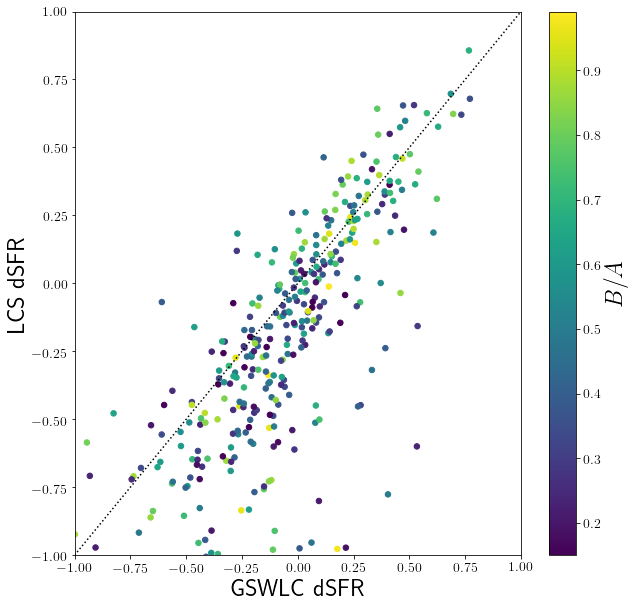

In [62]:
x = b.lcs.cat['logSFR']-get_BV_MS(b.lcs.cat['MSTAR_50'])
y = b.lcs.cat['logSFR_NUVIR_KE'] - get_BV_MS(b.lcs.cat['MSTAR_50'])
color = (b.lcs.cat['SERSIC_BA'])
plt.figure(figsize=(10,10))
sp = plt.scatter(x,y,c=color,s=30)
cb = plt.colorbar(sp,label=r'$B/A$')
plt.ylabel('LCS dSFR')
plt.xlabel('GSWLC dSFR')
#plt.xlim(-15,-9)
#plt.axvline(x=-11.5,ls='--',c='k')
#plt.axhline(y=-11.5,ls='--',c='k')
xl = np.linspace(-1,1)
plt.plot(xl,xl,'k:')
plt.axis([-1,1,-1,1])

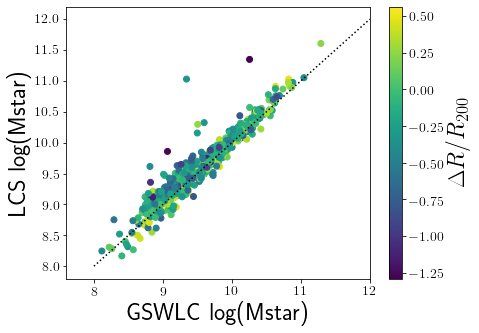

In [52]:
# compare moustakas and GSWLC stellar masses

x = b.lcs.cat['logMstar']
y = b.lcs.cat['MSTAR_50']
color = np.log10(b.lcs.cat['DR_R200'])
plt.figure()
sp = plt.scatter(x,y,c=color)
cb = plt.colorbar(sp,label=r'$\Delta R/R_{200}$')
plt.ylabel('LCS log(Mstar)')
plt.xlabel('GSWLC log(Mstar)')
plt.xlim(7.6,12)

xl = np.linspace(8,12)
plt.plot(xl,xl,'k:')

In [70]:
b.gsw.cat

AttributeError: recarray has no attribute colnames

# Notes from 3/24/2021

* tell Samir we are using B/A from simard catalog (his e_2 in our catalog, need to trace back what this is in Simard catalog
* ask Samir to remake Fig 1 from 2018 paper, and compute the difference of LIR_GSWLC and LIR_Herschel vs B/A.  Is there any systematic that would indicate we are missing some 22um flux at high inclination.
* repeat this for 12um LIR as well

* if we are not missing IR flux, then we may be seeing the edge-on galaxies b/c their IR surface brightness is higher.  face-on galaxies with comparable SFRs might have a sb that is too low.



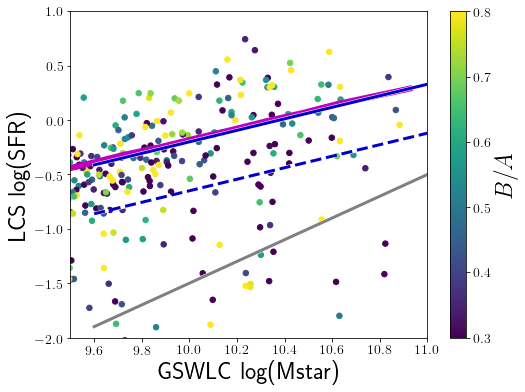

In [90]:
# compare moustakas and GSWLC stellar masses
#os.chdir(homedir+'/research/LCS/plots/')
#%run ~/github/LCS/python/lcs_paper2.py --cutBT --minmass 9.7

x = b.lcs.cat['logMstar']
y = b.lcs.cat['logSFR']
color = (b.lcs.cat['SERSIC_BA'])
plt.figure(figsize=(8,6))
sp = plt.scatter(x,y,c=color,s=30,vmin=.3,vmax=.8)
cb = plt.colorbar(sp,label=r'$B/A$')
plt.ylabel('LCS log(SFR)')
plt.xlabel('GSWLC log(Mstar)')
#plt.xlim(7.6,12)
#xl = np.linspace(8,12)
#plt.plot(xl,xl,'k:')
plt.axis([9.5,11,-2,1])
plot_BV_MS(plt.gca())
plot_GSWLC_sssfr(plt.gca())

# Intrinsic distribution of B/A, varies with environment?

b/c of morph=dens relationship, there are more SO in dense environments.  this could change the intrinsic ellipticity distribution in diff environments.  but, so's have puffier disks and so should be biased toward low ellipticities relative to late-type spirals, or at least they should miss the highest ellipticities.


inclination distribution shouldn't change

# internal extinction vs higher surface brightness

are these low sfr galaxies due to missing uv due to internal extinction (plus maybe missing some IR if sfr is from 12um).  this we can answer if samir makes fig 1 plots for 22 and 12, with residuals 

or

are higher sb galaxies because they are inclined, and so their sfrs are accurate and we are missing their face-on counterparts due to sb limit of wise/galex detections.  this i'm not worried about b/c 

probably both are happening.  


# when we cut on b/a, what happens to results

sfrs are not difference between field and cluster

do we see fraction of suppressed galaxies varying with environment


# 2021-04-21

Going to make a few versions of the paper plots.

Also SFR-Mstar for various ellipticity cuts, using GSWLC.  but this is what we already did by plotting dSFR vs ellipticity.

# 2021-04-24

* Simard has ellipticity for the entire galaxy, single-component sersic fit, in table 3.  we didn't have this in the LCS table, so I matched LCS to simard+2011 Table 3 and saved the result.
* Added an ellipticity flag to the lcs_paper2.py program so that we can run versions with and without ellipticity cut.  the default value for the cut is 1.1, which effectively is no cut. 
* we can now test how cutting at e < 0.6 affects our results


# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# MOST RECENT DRAFT STARTS HERE (SPRING 2021)
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# Plots with BT < 1, ellip < 0.75

* working on the outline that Greg and Benedetta did on 5/4/21
* we apply ellip < 0.75 all the time.
* we start with BT < 1, then proceed to BT < 0.4.

### Different MS fits

* printing out the MS fit with and without the B/T cut

In [27]:
# no BT cut
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2.py --cutBT --BT 1.1 --minmass 9.7 --ellip .75
print(b.gsw.MS_line)


outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
1256 1256 1256 1256
Model: Linear1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
          slope            intercept     
    ------------------ ------------------
    0.3985388023995614 -4.207847001780896


In [28]:
print('number of core galaxies = ',sum(b.lcs_mass_sfr_flag & b.lcs.membflag))
print('\t with size measurements = ',sum(b.lcs_mass_sfr_flag & b.lcs.membflag & b.lcs.sampleflag))
print('number of infall galaxies = ',sum(b.lcs_mass_sfr_flag & b.lcs.infallflag))
print('\t with size measurements = ',sum(b.lcs_mass_sfr_flag & b.lcs.infallflag & b.lcs.sampleflag))
print('number of GSW galaxies = ',sum(b.gsw_mass_sfr_flag) )

number of core galaxies =  135
	 with size measurements =  64
number of infall galaxies =  100
	 with size measurements =  56
number of GSW galaxies =  11839


In [24]:
# no BT cut
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2.py --cutBT --BT .4 --minmass 9.7 --ellip .75
print(b.gsw.MS_line)

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
665 665 665 665
Model: Linear1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
           slope            intercept     
    ------------------- ------------------
    0.47309772241712855 -4.877005731991362


In [26]:
print('number of core galaxies = ',sum(b.lcs_mass_sfr_flag & b.lcs.membflag))
print('\t with size measurements = ',sum(b.lcs_mass_sfr_flag & b.lcs.membflag & b.lcs.sampleflag))
print('number of infall galaxies = ',sum(b.lcs_mass_sfr_flag & b.lcs.infallflag))
print('\t with size measurements = ',sum(b.lcs_mass_sfr_flag & b.lcs.infallflag & b.lcs.sampleflag))
print('number of GSW galaxies = ',sum(b.gsw_mass_sfr_flag) )

number of core galaxies =  75
	 with size measurements =  53
number of infall galaxies =  74
	 with size measurements =  48
number of GSW galaxies =  8872


# Statistics for Table 1

the following cells print out the statistics for table 1.  

you still need to dig through a bit...

In [32]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2.py --cutBT --BT .4 --minmass 9.7 --ellip .75
b.ks_stats()

print()
print('WITH MASS MATCHING')
b.ks_stats(massmatch=True)


outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
665 665 665 665
########################################
LCS Core vs Field: SFR
	D = 2.47e-01, pvalue = 1.79e-04
Anderson_ksampResult(statistic=12.380644546435482, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)

LCS Core vs Field: dSFR
	D = 2.24e-01, pvalue = 9.53e-04
Anderson_ksampResult(statistic=9.632134553775442, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)

LCS Core vs Field: Mstar
	D = 1.68e-01, pvalue = 2.63e-02
Anderson_ksampResult(statistic=3.6862109076418976, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.010598661231360227)
########################################
LCS Infall vs Field: SFR
	D = 1.43e-01, pvalue = 9.11e-02
Anderson_ksampResult(statistic=2.207737643109159, critical_values=ar

<Figure size 489.6x360 with 0 Axes>

In [34]:
# checking to see where we lose the difference between mass distributions
# mass distributions are different only at the lowest mass end
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2.py --cutBT --BT 1.1 --minmass 9.75 --ellip .75
b.ks_stats()


print()
print('WITH MASS MATCHING')
b.ks_stats(massmatch=True)


outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
1256 1256 1256 1256
########################################
LCS Core vs Field: SFR
	D = 3.14e-01, pvalue = 3.02e-10
Anderson_ksampResult(statistic=39.58960797443547, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)

LCS Core vs Field: dSFR
	D = 3.33e-01, pvalue = 1.82e-11
Anderson_ksampResult(statistic=38.5341179363033, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)

LCS Core vs Field: Mstar
	D = 1.11e-01, pvalue = 1.21e-01
Anderson_ksampResult(statistic=1.228287773243411, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.10139744932066297)
########################################
LCS Infall vs Field: SFR
	D = 1.77e-01, pvalue = 6.27e-03
Anderson_ksampResult(statistic=5.086554660601885, critical_values=ar

## Figure 1

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
1256 1256 1256 1256


###########################################
######  WITH IR FLAG
###########################################
number in lcs sample =  135
number in gsw sample =  11839
just checking ... 11838 135
9.701
9.702
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.15
p-vale = 5.594e-03 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.32
p-vale = 1.969e-12 (prob that samples are from same distribution)


number in lcs sample =  100
number in gsw sample =  11839
just checking ... 11838 100
9.701
9.711
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.09
p-vale = 3.569e-01 (prob that samples are from same distributi

<Figure size 489.6x360 with 0 Axes>

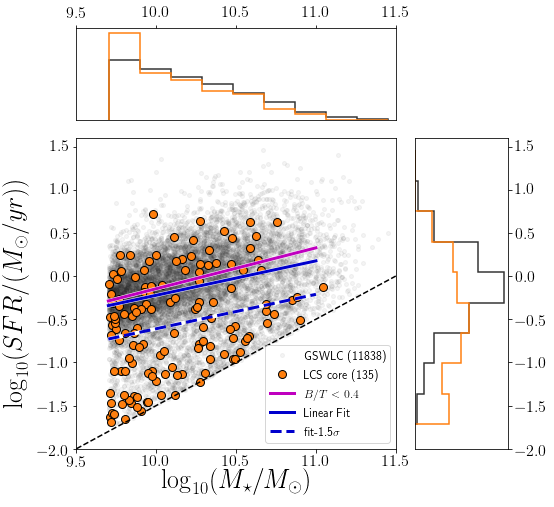

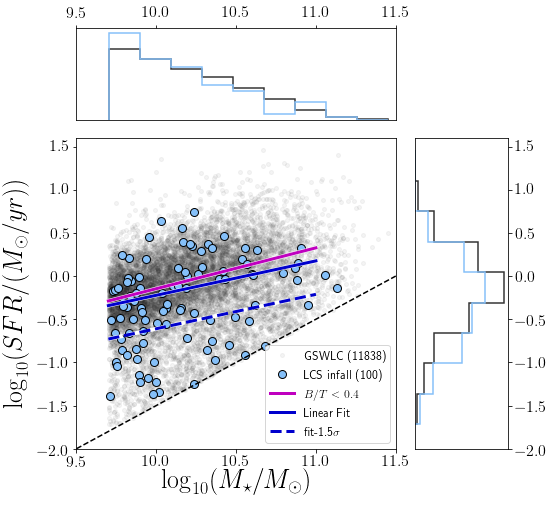

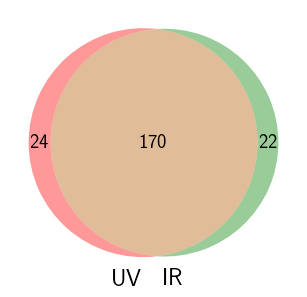

In [31]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2.py --cutBT --BT 1.1 --minmass 9.7 --ellip .75

print("")
print("")
print("###########################################")
print("######  WITH IR FLAG")
print("###########################################")
flag = b.lcs.cat['membflag'] 
uvflag = b.lcs.cat['flag_uv'] > 0
irflag = b.lcs.cat['flag_midir'] > 0

flag = b.lcs.membflag #& irflag 
outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut1-e0p75.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut1-e0p75.png'
b.plot_sfr_mstar(lcsflag=flag,coreflag=True,outfile1=outfile1,outfile2=outfile2,massmatch=False,hexbinflag=False)

print("")
print("")
flag = b.lcs.infallflag #& irflag
outfile1 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut1-e0p75.pdf'
outfile2 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut1-e0p75.png'
b.plot_sfr_mstar(lcsflag=flag,label='LCS infall',outfile1=outfile1,outfile2=outfile2,coreflag=False,hexbinflag=False,massmatch=False)
# make venn plot
plt.figure()
make_venn()

### Need updated statistics for mass matching

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
1256 1256 1256 1256
number in lcs sample =  135
number in gsw sample =  11839
just checking ... 2700 135
9.701
9.702
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.06
p-vale = 6.453e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.32
p-vale = 5.393e-12 (prob that samples are from same distribution)


number in lcs sample =  100
number in gsw sample =  11839
just checking ... 2000 100
9.701
9.711
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.05
p-vale = 9.788e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.18
p-vale = 3.903e-03 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

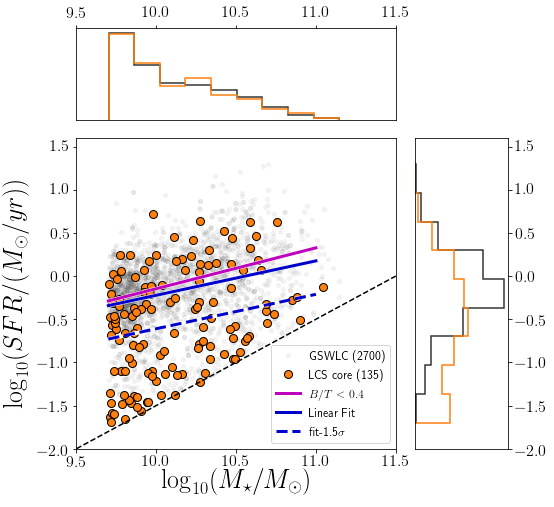

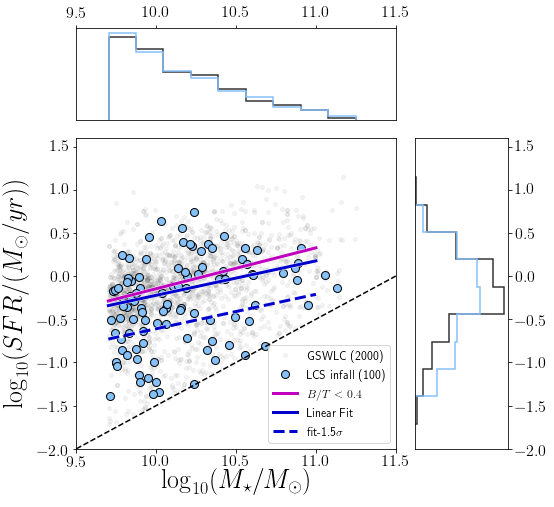

In [117]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2.py --cutBT --BT 1.1 --minmass 9.7 --ellip .75


flag = b.lcs.membflag #& irflag 
outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut1-e0p75-mmatch.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut1-e0p75-mmatch.png'
b.plot_sfr_mstar(lcsflag=flag,coreflag=True,outfile1=outfile1,outfile2=outfile2,massmatch=True,hexbinflag=False)

print("")
print("")
flag = b.lcs.infallflag #& irflag
outfile1 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut1-e0p75-mmatch.pdf'
outfile2 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut1-e0p75-mmatch.png'
b.plot_sfr_mstar(lcsflag=flag,label='LCS infall',outfile1=outfile1,outfile2=outfile2,coreflag=False,hexbinflag=False,massmatch=True)


### Need updated statistics of LCS core vs field

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
1256 1256 1256 1256


###########################################
######  WITH IR FLAG
###########################################
number in core sample =  132
number in external sample =  103
just checking ... 132 103
9.702
9.711
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.09
p-vale = 6.912e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.20
p-vale = 1.670e-02 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

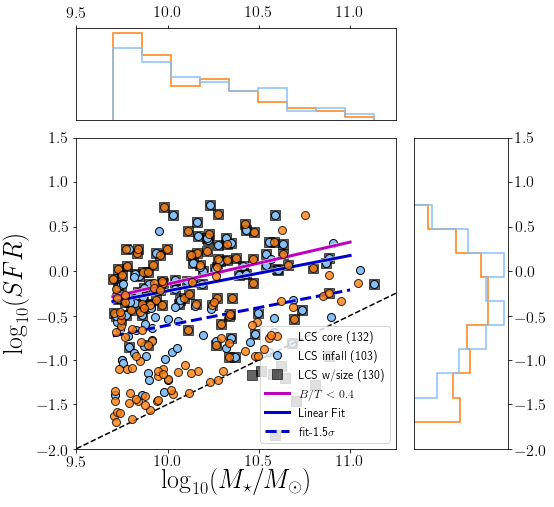

In [116]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2.py --cutBT --BT 1.1 --minmass 9.7 --ellip .75

outfile1 = homedir+'/research/LCS/plots/lcscore-infall-sfrmstar-BTcut1-e0p75.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-infall-sfrmstar-BTcut1-e0p75.png'
b.plot_sfr_mstar_lcs(outfile1=outfile1,outfile2=outfile2)


### checking if mass distribution is the same for LCS core and infall with B/T < 0.4 cut

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
665 665 665 665
number in core sample =  75
number in external sample =  74
just checking ... 75 74
9.702
9.715
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.14
p-vale = 4.394e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.13
p-vale = 5.204e-01 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

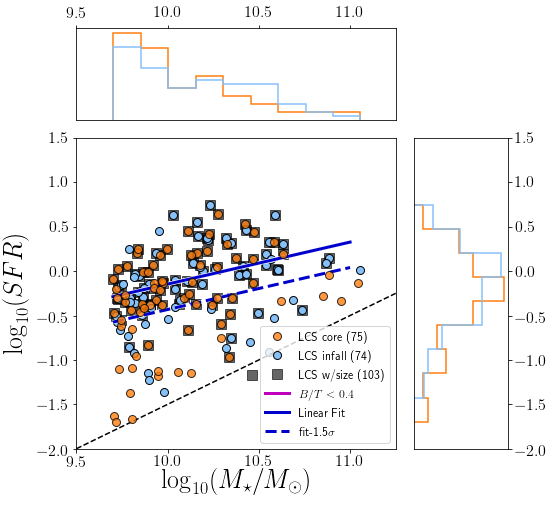

In [119]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2.py --cutBT --BT .4 --minmass 9.7 --ellip .75

outfile1 = homedir+'/research/LCS/plots/temp.pdf'
outfile2 = homedir+'/research/LCS/plots/temp.png'
b.plot_sfr_mstar_lcs(outfile1=outfile1,outfile2=outfile2)


# Checking images of low SFR galaxies

getting legacy images for  25  galaxies


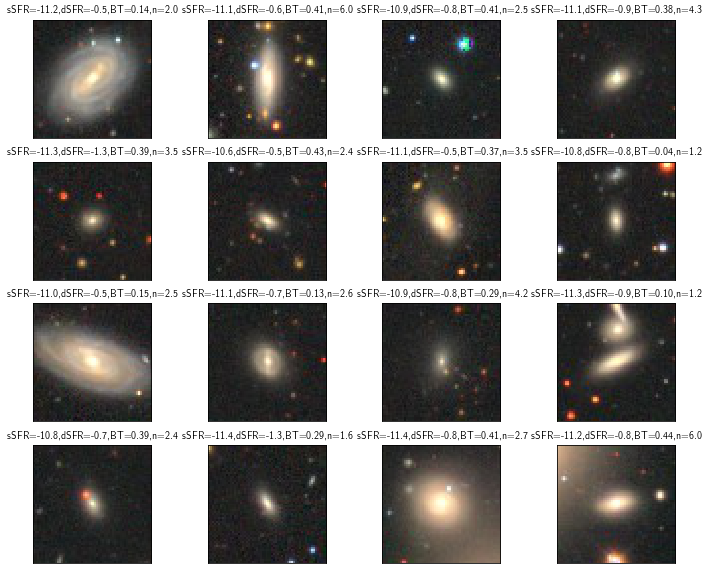

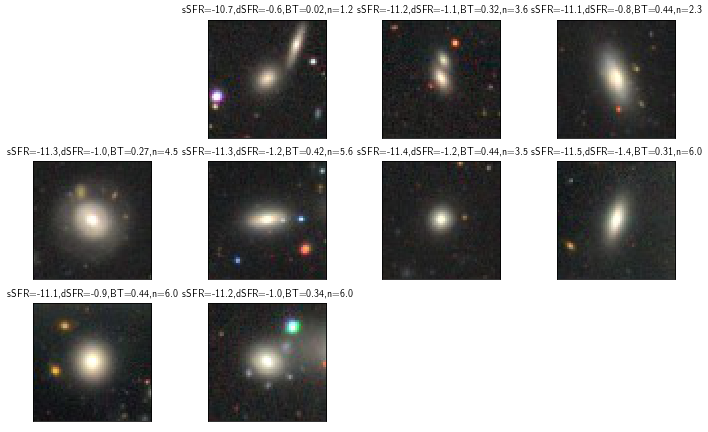

In [45]:
b.core_getlegacy()

getting legacy images for  10  galaxies


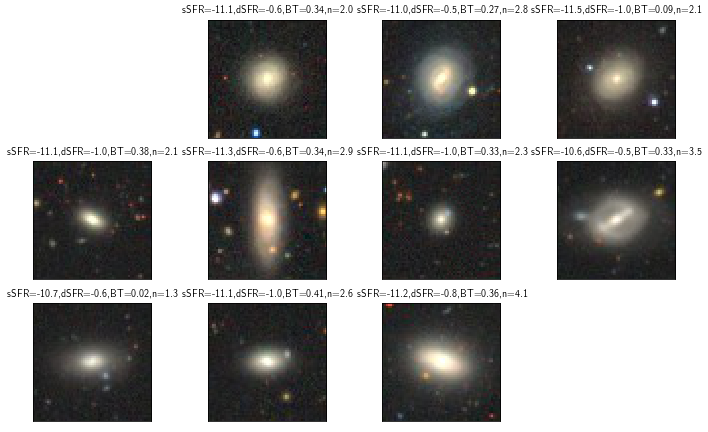

In [46]:
b.infall_getlegacy()

## Figure 2

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
1256 1256 1256 1256
KS STATISTICS: FIELD VS CORE
Ks_2sampResult(statistic=0.3064288036202894, pvalue=4.507270965850463e-11)
Anderson_ksampResult(statistic=45.44919468965997, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)

KS STATISTICS: FIELD VS INFALL
Ks_2sampResult(statistic=0.19748535570686648, pvalue=0.0006949612204485673)
Anderson_ksampResult(statistic=8.820818241273951, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)

KS STATISTICS: CORE VS INFALL
Ks_2sampResult(statistic=0.20925272138864373, pvalue=0.010315897221976011)
Anderson_ksampResult(statistic=4.25408577825132, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.0064898414516057785)


<Figure size 489.6x360 with 0 Axes>

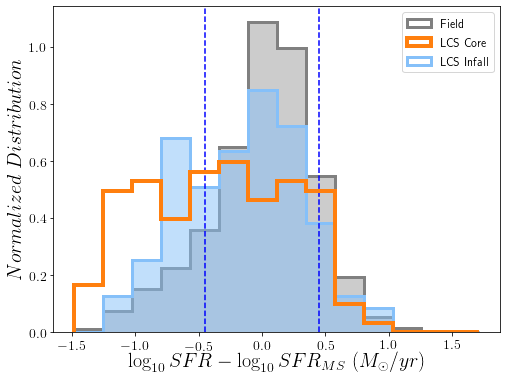

In [111]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2.py --cutBT --BT 1 --minmass 9.7 --ellip 0.75 
outfile1 = homedir+'/research/LCS/plots/delta-sfr-hist-BTcut1-e0p75.pdf'
outfile2 = homedir+'/research/LCS/plots/delta-sfr-hist-BTcut1-e0p75.png'
b.plot_dsfr_hist(outfile1=outfile1,outfile2=outfile2)

## Figure 3

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
1256 1256 1256 1256
#########################
Without Sersic cut
#########################

Field
r=-0.2850, pvalue=4.412e-220

LCS Core
r=-0.4558, pvalue=2.767e-08

LCS Infall
r=-0.5279, pvalue=1.966e-08

 Combined Samples: Spearman Rank


<Figure size 489.6x360 with 0 Axes>

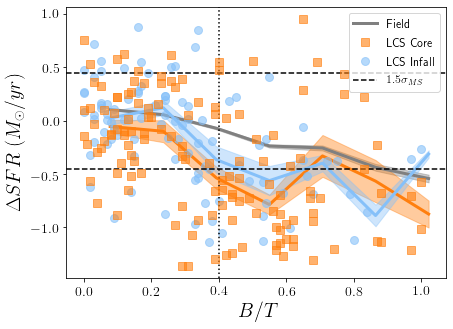

In [112]:
os.chdir(homedir+'/research/LCS/plots/')
btmax=1.1
nbins=8

#btmax=1
#nbins=7
%run ~/github/LCS/python/lcs_paper2.py --cutBT --BT 1 --minmass 9.7 --ellip 0.75 

print('#########################')
print('Without Sersic cut')
print('#########################')
xvars,yvars = b.plot_dsfr_BT(nbins=nbins,xmax=btmax,writefiles=True,nsersic_cut=10,BTline=.4)#outfile1=outfile1,outfile2=outfile2,nbins=12)
outfile1 = homedir+'/research/LCS/plots/dsfr-BTcut1-e0p75.pdf'
outfile2 = homedir+'/research/LCS/plots/dsfr-BTcut1-e0p75.png'
plt.savefig(outfile1)
plt.savefig(outfile2)

#pause(1)
#print('#########################')
#print('Applying Sersic n=2 cut')
#print('#########################')
#xvars,yvars = b.plot_dsfr_BT(nbins=nbins,xmax=btmax,writefiles=True,nsersic_cut=2)#outfile1=outfile1,outfile2=outfile2,nbins=12)
#outfile1 = homedir+'/research/LCS/plots/dsfr-BT-btcut1-nsersic2.pdf'
#outfile2 = homedir+'/research/LCS/plots/dsfr-BT-btcut1-nsersic2.png'
#plt.savefig(outfile1)
#plt.savefig(outfile2)

0.4099999964237213


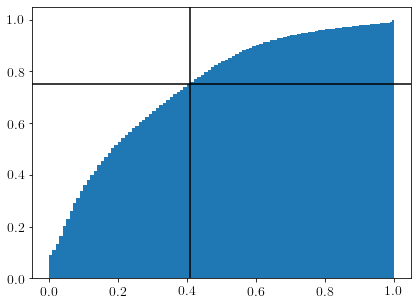

In [87]:
flag = b.gsw_mass_sfr_flag
plt.figure()
t = plt.hist(b.gsw.cat[BTkey][flag],bins=200,cumulative=True,normed=True)
percentile=75
p = np.percentile(b.gsw.cat[BTkey],percentile)
print(p)
plt.axhline(y=percentile/100,color='k')
plt.axvline(x=p,color='k')

## Figure 4

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
1256 1256 1256 1256
CORE
0.4444444444444444 [-0.04220267  0.04301967]
INFALL
0.27 [-0.04195709  0.04651155]
FIELD
0.1449446743812822 [-0.00320551  0.00326549]
(2,)
CORE
0.273972602739726 [-0.04888139  0.05499026]
INFALL
0.1917808219178082 [-0.04179093  0.0501212 ]
FIELD
0.08849052295044531 [-0.00298799  0.00308195]
(2,)


<Figure size 489.6x360 with 0 Axes>

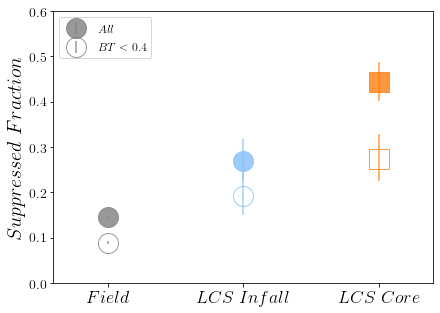

In [114]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2.py --cutBT --BT 1.1 --minmass 9.7 --ellip 0.75  
outfile1 = homedir+'/research/LCS/plots/fsuppressed-btcut1.pdf'
outfile2 = homedir+'/research/LCS/plots/fsuppressed-btcut1.png'
b.plot_frac_suppressed()#outfile1=outfile1,outfile2=outfile2,nbins=12)
btcut = 0.4
b.plot_frac_suppressed(BTcut=btcut,plotsingle=False)
plt.ylim(0,.6)
plt.legend(['$All$','_nolegend_','_nolegend_','$BT<0.4$'],loc='upper left')
plt.savefig(outfile1)
plt.savefig(outfile2)

## Figure 5

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
1256 1256 1256 1256
Field : number of galaxies in subsample =  10124
2 2 3
LCS Core : number of galaxies in subsample =  75
2 2 3
LCS Infall : number of galaxies in subsample =  73
2 2 3
Field : number of galaxies in subsample =  10124
2 2 6
LCS Core : number of galaxies in subsample =  75
2 2 6
LCS Infall : number of galaxies in subsample =  73
2 2 6
######################################################
comparing mass distribution of normal SFR galaxies, field vs core
Ks_2sampResult(statistic=0.1554220993019887, pvalue=0.054823712437534464)
######################################################
comparing mass distribution of low SFR galaxies, field vs core
Ks_2sampResult(statistic=0.20267249757045674, pvalue=0.014502418392248528)

######################################################
comparing mass distribution of normal vs low SFR galaxies, field
K

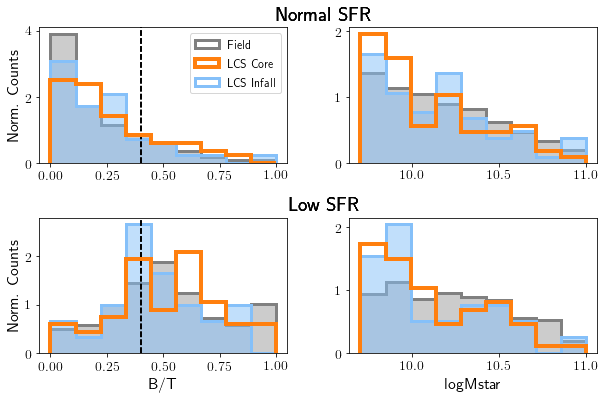

In [19]:
os.chdir(homedir+'/research/LCS/plots/')
btmax=1
%run ~/github/LCS/python/lcs_paper2.py --cutBT --BT 1.1 --minmass 9.7 --ellip 0.75  

b.compare_morph(nbins=10,xmax=btmax,coreonly=False)#outfile1=outfile1,outfile2=outfile2,nbins=12)
outfile1 = homedir+'/research/LCS/plots/prop-lowsfr-lcsall-BTcut1-e0p75.pdf'
outfile2 = homedir+'/research/LCS/plots/prop-lowsfr-lcsall-BTcut1-e0p75.png'
plt.savefig(outfile1)
plt.savefig(outfile2)

#pause(1)
## repeat but compare field with lcs core only
#b.compare_morph(nbins=10,xmax=btmax,coreonly=True)
#outfile1 = homedir+'/research/LCS/plots/prop-lowsfr-lcscore-BTcut1-e0p75.pdf'
#outfile2 = homedir+'/research/LCS/plots/prop-lowsfr-lcscore-BTcut1-e0p75.png'
#plt.savefig(outfile1)
#plt.savefig(outfile2)

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
665 665 665 665
Field : number of galaxies in subsample =  8302
2 2 3
LCS Core : number of galaxies in subsample =  59
2 2 3
LCS Infall : number of galaxies in subsample =  61
2 2 3
Field : number of galaxies in subsample =  8302
2 2 6
LCS Core : number of galaxies in subsample =  59
2 2 6
LCS Infall : number of galaxies in subsample =  61
2 2 6
######################################################
comparing mass distribution of normal SFR galaxies
Ks_2sampResult(statistic=0.15265670106039386, pvalue=0.11715671558718621)
######################################################
comparing mass distribution of low SFR galaxies
Ks_2sampResult(statistic=0.3046052631578947, pvalue=0.08860204210666944)


<Figure size 489.6x360 with 0 Axes>

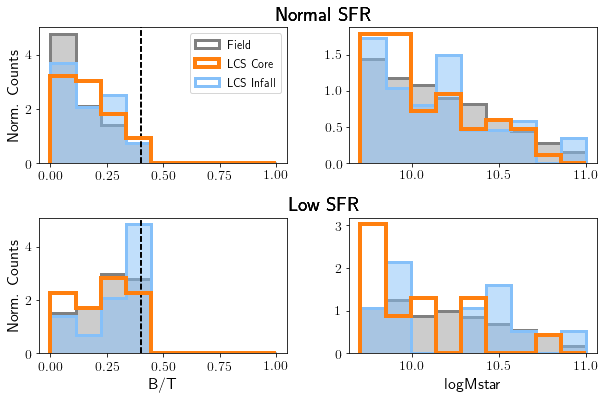

In [11]:
os.chdir(homedir+'/research/LCS/plots/')
btmax=1
%run ~/github/LCS/python/lcs_paper2.py --cutBT --BT .4 --minmass 9.7 --ellip 0.75  

b.compare_morph(nbins=10,xmax=btmax,coreonly=False)#outfile1=outfile1,outfile2=outfile2,nbins=12)
outfile1 = homedir+'/research/LCS/plots/prop-lowsfr-lcsall-BTcut0p4-e0p75.pdf'
outfile2 = homedir+'/research/LCS/plots/prop-lowsfr-lcsall-BTcut0p4-e0p75.png'
plt.savefig(outfile1)
plt.savefig(outfile2)

#pause(1)

## Figure 6

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
665 665 665 665
###################################################################
comparing LCS low SFR and mass-matched field low SFR: B/T
statistic=0.15, pvalue=5.68e-01

anderson-darling test
Anderson_ksampResult(statistic=-0.21993679779255826, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.25)
###################################################################
comparing LCS low SFR and mass-matched field low SFR: Sersic n
statistic=0.13, pvalue=7.47e-01

anderson-darling test
Anderson_ksampResult(statistic=-0.3723236431900093, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.25)
###################################################################
comparing LCS low SFR and mass-matched field low SFR: prob Sc
statistic=0.18, pvalue=3.55e-01

anderson-darlin

<Figure size 489.6x360 with 0 Axes>

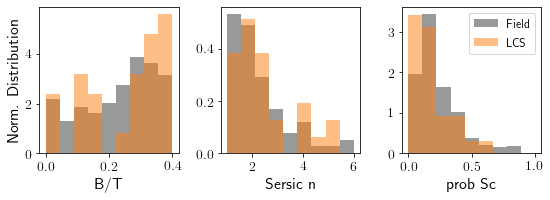

###################################################################
comparing LCS low SFR and mass-matched field low SFR: B/T
statistic=0.17, pvalue=7.55e-01

anderson-darling test
Anderson_ksampResult(statistic=-0.6627857687728881, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.25)
###################################################################
comparing LCS low SFR and mass-matched field low SFR: Sersic n
statistic=0.21, pvalue=4.77e-01

anderson-darling test
Anderson_ksampResult(statistic=0.3353588050117139, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.24320726000439094)
###################################################################
comparing LCS low SFR and mass-matched field low SFR: prob Sc
statistic=0.41, pvalue=1.19e-02

anderson-darling test
Anderson_ksampResult(statistic=6.267805119437834, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), signific

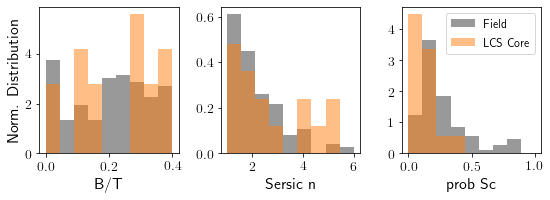

###################################################################
comparing LCS low SFR and mass-matched field low SFR: B/T
statistic=0.35, pvalue=9.57e-02

anderson-darling test
Anderson_ksampResult(statistic=0.8070049151952031, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.1526568880421989)
###################################################################
comparing LCS low SFR and mass-matched field low SFR: Sersic n
statistic=0.27, pvalue=3.13e-01

anderson-darling test
Anderson_ksampResult(statistic=0.469168857112043, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.212929739152808)
###################################################################
comparing LCS low SFR and mass-matched field low SFR: prob Sc
statistic=0.18, pvalue=8.07e-01

anderson-darling test
Anderson_ksampResult(statistic=-0.7532505330873844, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546

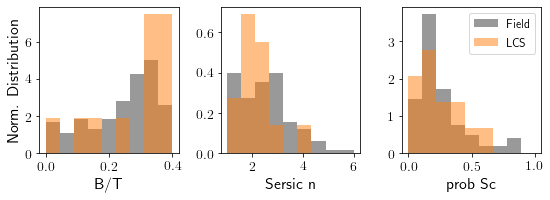

In [122]:
# compare BT of low SFR field galaxies with BT distribution of mass-matched normal SF field galaxies 
os.chdir(homedir+'/research/LCS/plots/')
btmax=1
%run ~/github/LCS/python/lcs_paper2.py --cutBT --BT .4 --minmass 9.7 --ellip 0.75  
b.compare_BT_lowsfr_field_core(nbins=10,coreonly=False,BTmax=.4)
outfile1 = homedir+'/research/LCS/plots/lowsfr-prop-lcsall-mmfield-BTcut0p4-e0p75.pdf'
outfile2 = homedir+'/research/LCS/plots/lowsfr-prop-lcsall-mmfield-BTcut0p4-e0p75.png'
plt.savefig(outfile1)
plt.savefig(outfile2)
pause(1)
b.compare_BT_lowsfr_field_core(nbins=10,coreonly=True,BTmax=.4)
outfile1 = homedir+'/research/LCS/plots/lowsfr-prop-lcscore-mmfield-BTcut0p4-e0p75.pdf'
outfile2 = homedir+'/research/LCS/plots/lowsfr-prop-lcscore-mmfield-BTcut0p4-e0p75.png'
plt.savefig(outfile1)
plt.savefig(outfile2)

pause(1)
b.compare_BT_lowsfr_field_core(nbins=10,coreonly=False,infallonly=True,BTmax=0.4)
outfile1 = homedir+'/research/LCS/plots/lowsfr-prop-lcsinfall-mmfield-BTcut0p4-e0p75.pdf'
outfile2 = homedir+'/research/LCS/plots/lowsfr-prop-lcsinfall-mmfield-BTcut0p4-e0p75.png'
plt.savefig(outfile1)
plt.savefig(outfile2)

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
665 665 665 665
#############
B/T
KS test
pvalue=7.89e-01 (5.40e-01,9.54e-01)

#############
Sersic n
KS test
pvalue=5.86e-01 (3.27e-01,8.49e-01)

#############
prob Sc
KS test
pvalue=6.38e-02 (1.81e-02,1.71e-01)



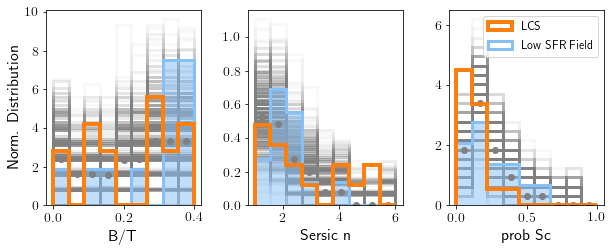

In [4]:
os.chdir(homedir+'/research/LCS/plots/')
btmax=1
%run ~/github/LCS/python/lcs_paper2.py --cutBT --BT .4 --minmass 9.7 --ellip 0.75  
b.compare_BT_lowsfr_lcs_field_mmatch(nbins=10,coreonly=False,BTmax=.4,nrandom=1000,nmatch=1)
outfile1 = homedir+'/research/LCS/plots/lowsfr-prop-lcs-mmfield-BTcut0p4-e0p75.pdf'
outfile2 = homedir+'/research/LCS/plots/lowsfr-prop-lcs-mmfield-BTcut0p4-e0p75.png'
plt.savefig(outfile1)
plt.savefig(outfile2)

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
665 665 665 665
#############
B/T
KS test
pvalue=9.13e-01 (7.85e-01,9.77e-01)

#############
Sersic n
KS test
pvalue=5.23e-01 (4.19e-01,6.58e-01)

#############
prob Sc
KS test
pvalue=2.98e-02 (1.82e-02,4.76e-02)



<Figure size 489.6x360 with 0 Axes>

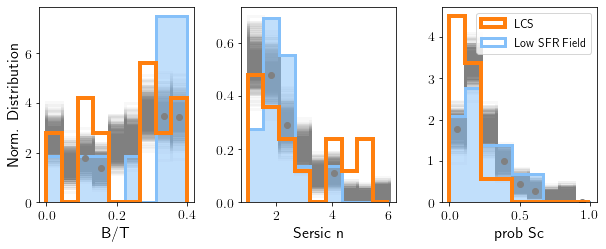

In [176]:
os.chdir(homedir+'/research/LCS/plots/')
btmax=1
%run ~/github/LCS/python/lcs_paper2.py --cutBT --BT .4 --minmass 9.7 --ellip 0.75  
b.compare_BT_lowsfr_lcs_field_mmatch(nbins=10,coreonly=False,BTmax=.4,nrandom=1000,nmatch=10)
outfile1 = homedir+'/research/LCS/plots/lowsfr-prop-lcs-mmfield-BTcut0p4-e0p75.pdf'
outfile2 = homedir+'/research/LCS/plots/lowsfr-prop-lcs-mmfield-BTcut0p4-e0p75.png'
plt.savefig(outfile1)
plt.savefig(outfile2)

###### x = np.random.random(100)
t = plt.hist(x,bins=10)

# New Figure XX
* comparison of field and LCS, with BT < 0.45 cut applied
* with mass matching

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
665 665 665 665
###################################################################
comparing LCS low SFR and mass-matched field low SFR: B/T
statistic=0.14, pvalue=6.58e-01

###################################################################
comparing LCS low SFR and mass-matched field low SFR: Sersic n
statistic=0.11, pvalue=9.00e-01

###################################################################
comparing LCS low SFR and mass-matched field low SFR: prob Sc
statistic=0.22, pvalue=1.47e-01



<Figure size 489.6x360 with 0 Axes>

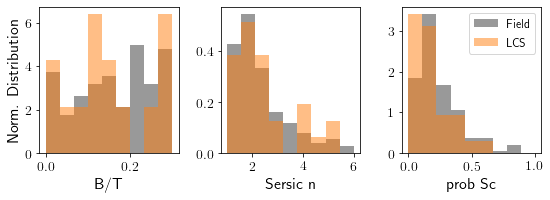

###################################################################
comparing LCS low SFR and mass-matched field low SFR: B/T
statistic=0.13, pvalue=9.42e-01

###################################################################
comparing LCS low SFR and mass-matched field low SFR: Sersic n
statistic=0.20, pvalue=5.54e-01

###################################################################
comparing LCS low SFR and mass-matched field low SFR: prob Sc
statistic=0.37, pvalue=2.96e-02



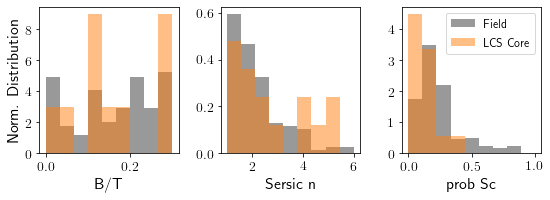

In [90]:
# compare BT of low SFR field galaxies with BT distribution of mass-matched normal SF field galaxies 
os.chdir(homedir+'/research/LCS/plots/')
btmax=.4
%run ~/github/LCS/python/lcs_paper2.py --cutBT --BT 0.4 --minmass 9.7 --ellip 0.75  
b.compare_BT_lowsfr_field_core(nbins=10,coreonly=False)
outfile1 = homedir+'/research/LCS/plots/lowsfr-prop-lcsall-mmfield-BTcut0p45-e0p75.pdf'
outfile2 = homedir+'/research/LCS/plots/lowsfr-prop-lcsall-mmfield-BTcut0p45-e0p75.png'
plt.savefig(outfile1)
plt.savefig(outfile2)
pause(1)
b.compare_BT_lowsfr_field_core(nbins=10,coreonly=True)
outfile1 = homedir+'/research/LCS/plots/lowsfr-prop-lcscore-mmfield-BTcut0p45-e0p75.pdf'
outfile2 = homedir+'/research/LCS/plots/lowsfr-prop-lcscore-mmfield-BTcut0p45-e0p75.png'
plt.savefig(outfile1)
plt.savefig(outfile2)


In [ ]:
# compare BT of low SFR field galaxies with BT distribution of mass-matched normal SF field galaxies 
os.chdir(homedir+'/research/LCS/plots/')
btmax=.45
%run ~/github/LCS/python/lcs_paper2.py --cutBT --BT 0.45 --minmass 9.7 --ellip 0.75  
b.compare_BT_lowsfr_field_core(nbins=10,coreonly=False)
outfile1 = homedir+'/research/LCS/plots/lowsfr-prop-lcsall-mmfield-BTcut0p45-e0p75.pdf'
outfile2 = homedir+'/research/LCS/plots/lowsfr-prop-lcsall-mmfield-BTcut0p45-e0p75.png'
plt.savefig(outfile1)
plt.savefig(outfile2)
pause(1)
b.compare_BT_lowsfr_field_core(nbins=10,coreonly=True)
outfile1 = homedir+'/research/LCS/plots/lowsfr-prop-lcscore-mmfield-BTcut0p45-e0p75.pdf'
outfile2 = homedir+'/research/LCS/plots/lowsfr-prop-lcscore-mmfield-BTcut0p45-e0p75.png'
plt.savefig(outfile1)
plt.savefig(outfile2)


# New Figure XX+1

* Figure 2, with BT < 0.4 cut

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
665 665 665 665
KS STATISTICS: FIELD VS CORE
Ks_2sampResult(statistic=0.23690862639014126, pvalue=0.0003716396113223608)
Anderson_ksampResult(statistic=10.931074654706967, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)

KS STATISTICS: FIELD VS INFALL
Ks_2sampResult(statistic=0.12748580410888796, pvalue=0.16861344600901695)
Anderson_ksampResult(statistic=2.5958727471691767, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.028089223697936948)

KS STATISTICS: CORE VS INFALL
Ks_2sampResult(statistic=0.15495495495495495, pvalue=0.28780174158462357)
Anderson_ksampResult(statistic=-0.07284100146024577, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.25)


<Figure size 489.6x360 with 0 Axes>

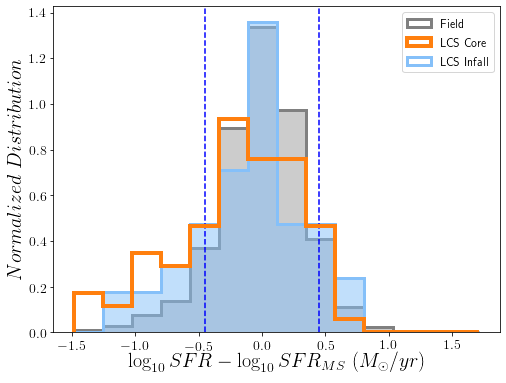

In [113]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2.py --cutBT --BT .4 --minmass 9.7 --ellip 0.75 
outfile1 = homedir+'/research/LCS/plots/delta-sfr-hist-BTcut0p4-e0p75.pdf'
outfile2 = homedir+'/research/LCS/plots/delta-sfr-hist-BTcut0p4-e0p75.png'
b.plot_dsfr_hist(outfile1=outfile1,outfile2=outfile2)

### CHECKING SAMPLE NUMBERS WHEN APPLYING B/T CUT

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
665 665 665 665
number in lcs sample =  75
number in gsw sample =  8872
just checking ... 1500 75
9.701
9.702
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.08
p-vale = 7.138e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.20
p-vale = 7.140e-03 (prob that samples are from same distribution)


number in lcs sample =  74
number in gsw sample =  8872
just checking ... 1480 74
9.701
9.715
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.06
p-vale = 9.747e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.13
p-vale = 1.556e-01 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

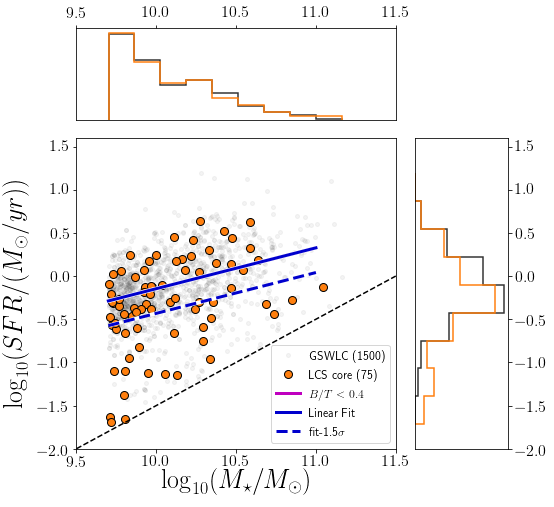

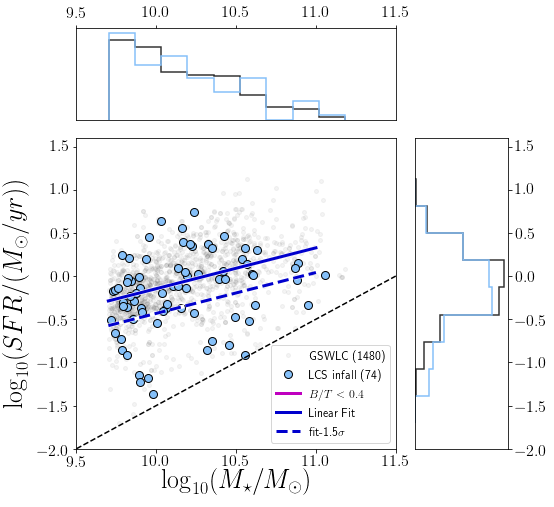

In [118]:
%run ~/github/LCS/python/lcs_paper2.py --cutBT --BT .4 --minmass 9.7 --ellip .75


flag = b.lcs.membflag #& irflag 
outfile1 = homedir+'/research/LCS/plots/temp.pdf'
outfile2 = homedir+'/research/LCS/plots/temp.png'
b.plot_sfr_mstar(lcsflag=flag,coreflag=True,outfile1=outfile1,outfile2=outfile2,massmatch=True,hexbinflag=False)

print("")
print("")
flag = b.lcs.infallflag #& irflag
outfile1 = homedir+'/research/LCS/plots/temp.pdf'
outfile2 = homedir+'/research/LCS/plots/temp.png'
b.plot_sfr_mstar(lcsflag=flag,label='LCS infall',outfile1=outfile1,outfile2=outfile2,coreflag=False,hexbinflag=False,massmatch=True)


## Figure 7

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
665 665 665 665
#######################################
comparing low SFR and mass-matched normal SFR
Ks_2sampResult(statistic=0.43157894736842106, pvalue=4.867890683768944e-48)
#######################################
comparing normal SFR and normal SFR mass-matched to low SFR
Ks_2sampResult(statistic=0.024387275101751003, pvalue=0.9089244973039818)


ERROR:root:File `'/home/rfinn/github/LCS/python/Python3/lcs_paper2.py'` not found.


#######################################
comparing low SFR and mass-matched normal SFR
Ks_2sampResult(statistic=0.43125, pvalue=0.004512938312541848)


<Figure size 489.6x360 with 0 Axes>

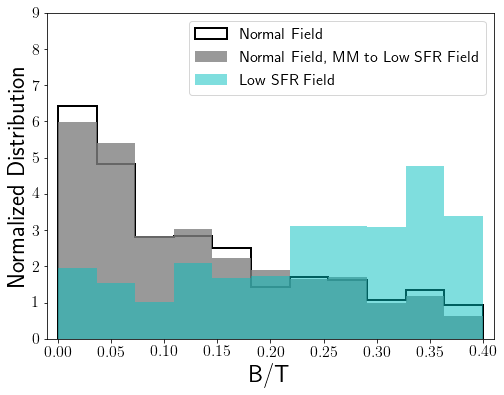

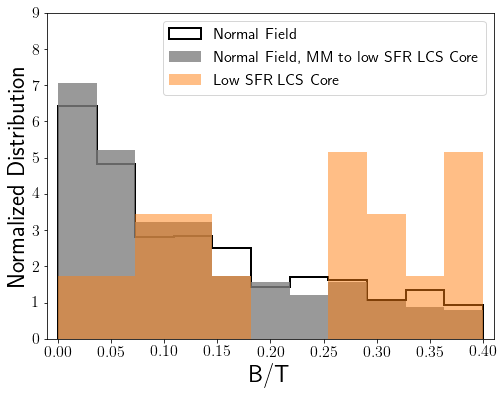

In [10]:
# compare BT of low SFR field galaxies with BT distribution of mass-matched normal SF field galaxies 
os.chdir(homedir+'/research/LCS/plots/')
btmax=.3
%run ~/github/LCS/python/lcs_paper2.py --minmass 9.7 --cutBT --BT .4 --ellip .75

b.compare_BT_lowsfr_field(nbins=12)#outfile1=outfile1,outfile2=outfile2,nbins=12)
outfile1 = homedir+'/research/LCS/plots/morphhist-field-normal-lowsfr.pdf'
outfile2 = homedir+'/research/LCS/plots/morphhist-field-normal-lowsfr.png'
plt.savefig(outfile1)
plt.savefig(outfile2)


b.compare_BT_lowsfr_lcs_massmatch(nbins=12,coreonly=True)#outfile1=outfile1,outfile2=outfile2,nbins=12)
outfile1 = homedir+'/research/LCS/plots/morphhist-lcscore-normal-lowsfr.pdf'
outfile2 = homedir+'/research/LCS/plots/morphhist-lcscore-normal-lowsfr.png'
plt.savefig(outfile1)
plt.savefig(outfile2)

# Checking images of galaxies between ssfr limits, with no restriction on BT

* We cut on ellipticity < 0.6 to get rid of galaxies whose sfr is depressed due to internal extinction.
* To compensate for the reduced sample, we decided to relax the cut in BT.  
* We need to understand if we can use the same ssfr limits.   The concern is that at this limit, we might get early-type galaxies that make the sample due to emission from evolved stars or something else - basically emission that is not from star formation.
* To test, we are displaying legacy images for galaxies that fall within different ssfr ranges.  We want to see if there is a ssfr limit where we suddenly get more E/S0 galaxies in the sample.

* We discussed starting with NO BT cut.  Discuss the results, then follow on for the subsample of disk.  This allows us to link more directly with previous work, because

In [67]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2.py --cutBT --BT 1 --minmass 9.7 --ellip .6

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
1058 1058 1058 1058


<Figure size 489.6x360 with 0 Axes>

In [65]:
sum(b.lcs.membflag & b.lcs_mass_sfr_flag)

116

getting legacy images for  21  galaxies


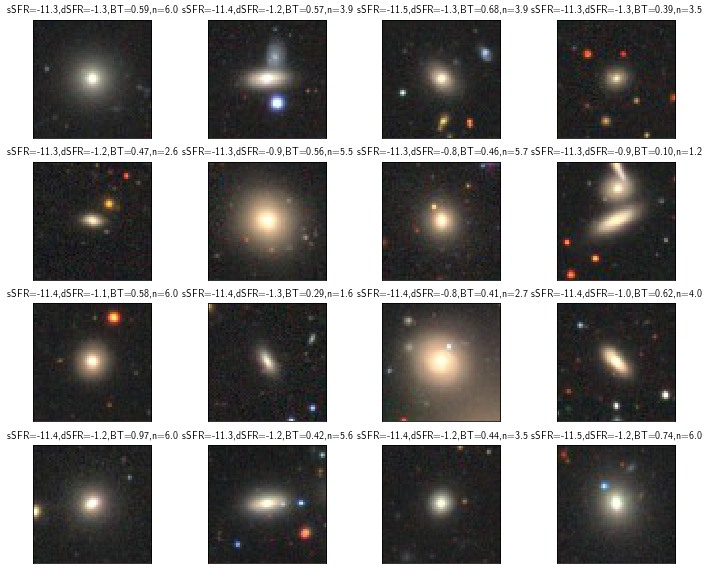

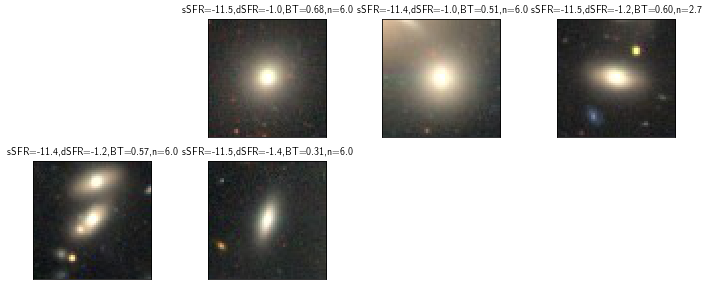

In [68]:
ssfr_flag = (b.lcs.ssfr < -11.3)
b.core_getlegacy(extraflag=ssfr_flag,dsfrcut=2)

getting legacy images for  20  galaxies


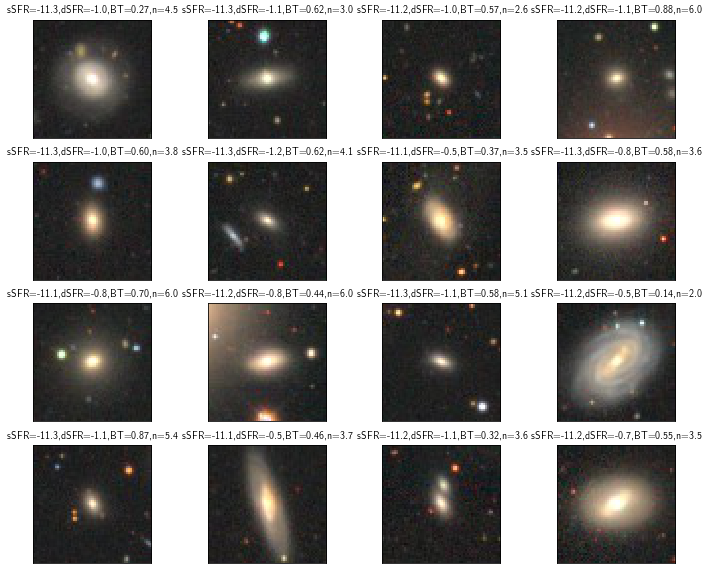

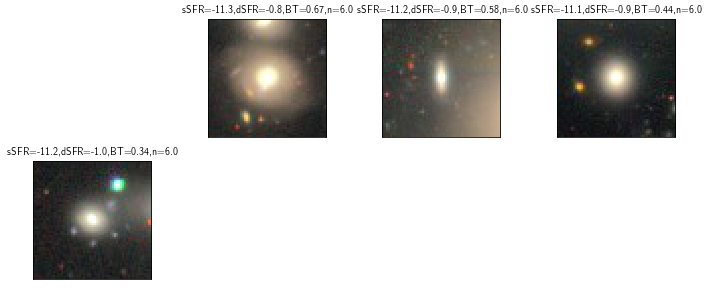

In [69]:
ssfr_flag = (b.lcs.ssfr < -11.1) & (b.lcs.ssfr > -11.3)
b.core_getlegacy(extraflag=ssfr_flag,dsfrcut=2)

getting legacy images for  11  galaxies


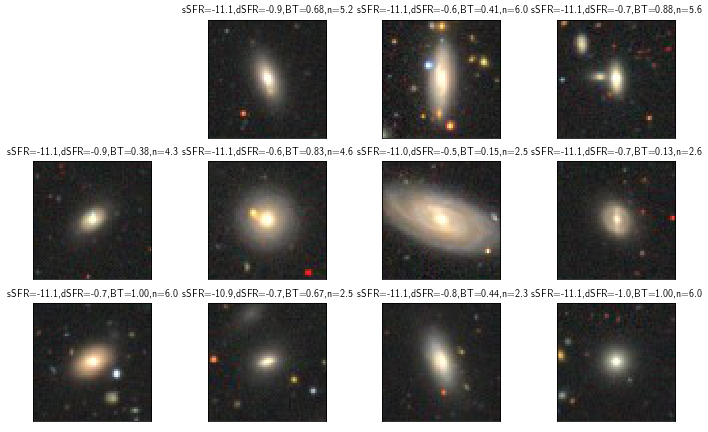

In [70]:
ssfr_flag = (b.lcs.ssfr < -10.9) & (b.lcs.ssfr > -11.1)
b.core_getlegacy(extraflag=ssfr_flag,dsfrcut=2)

getting legacy images for  7  galaxies


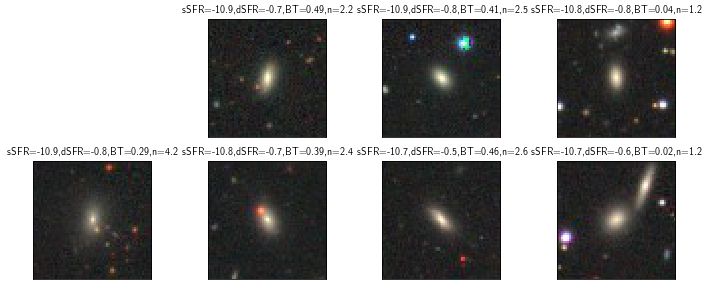

In [72]:
ssfr_flag = (b.lcs.ssfr < -10.7) & (b.lcs.ssfr > -10.9)
b.core_getlegacy(extraflag=ssfr_flag,dsfrcut=10)

getting legacy images for  31  galaxies
downloading image  cutouts/legacy-im-244.67172-34.84665-60.jpg
downloading image  cutouts/legacy-im-244.67172-34.84665-60.fits
downloading image  cutouts/legacy-im-176.13382-20.10662-60.jpg
downloading image  cutouts/legacy-im-176.13382-20.10662-60.fits
downloading image  cutouts/legacy-im-231.03944-8.68063-60.jpg
downloading image  cutouts/legacy-im-231.03944-8.68063-60.fits
downloading image  cutouts/legacy-im-231.05244-8.54481-60.jpg
downloading image  cutouts/legacy-im-231.05244-8.54481-60.fits
downloading image  cutouts/legacy-im-230.82161-8.81314-60.jpg
downloading image  cutouts/legacy-im-230.82161-8.81314-60.fits
downloading image  cutouts/legacy-im-229.12740-6.93249-60.jpg
downloading image  cutouts/legacy-im-229.12740-6.93249-60.fits
downloading image  cutouts/legacy-im-228.83627-6.82721-60.jpg
downloading image  cutouts/legacy-im-228.83627-6.82721-60.fits
downloading image  cutouts/legacy-im-229.01865-6.84763-60.jpg
downloading image  

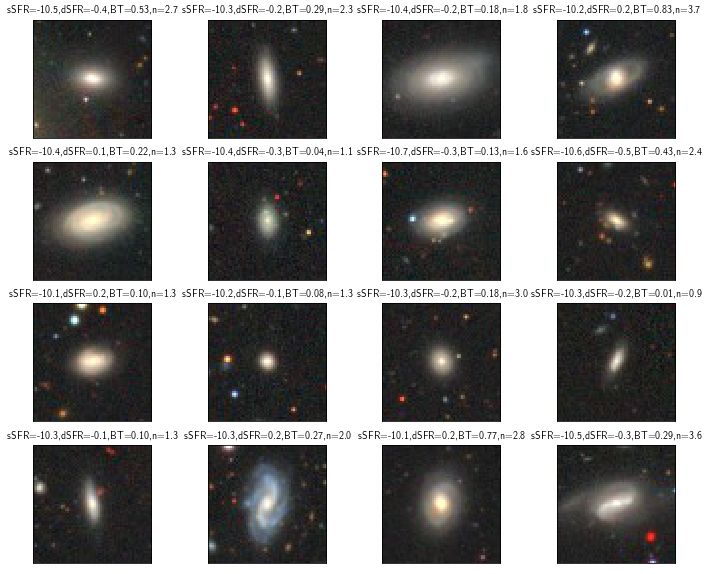

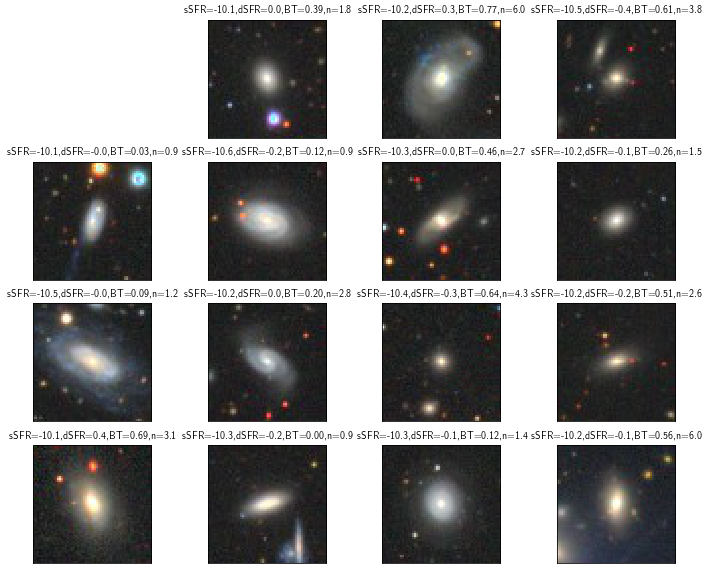

In [76]:
ssfr_flag = (b.lcs.ssfr < -10.1) & (b.lcs.ssfr > -10.7)
b.core_getlegacy(extraflag=ssfr_flag,dsfrcut=0.45)

getting legacy images for  60  galaxies


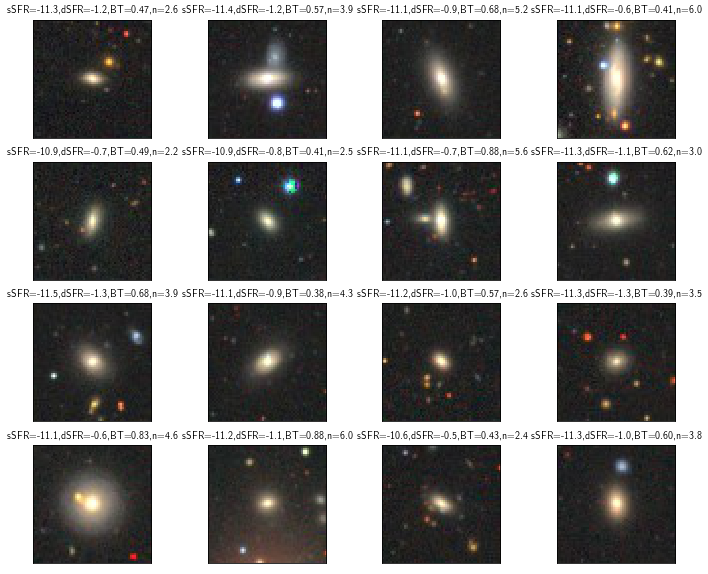

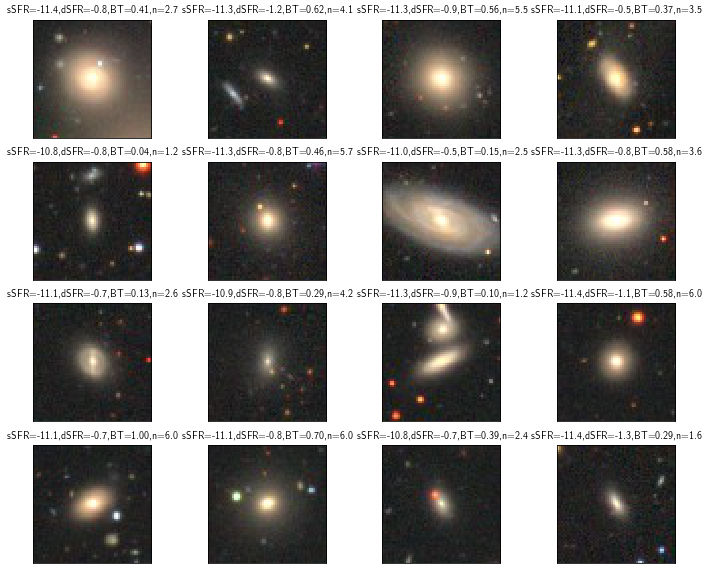

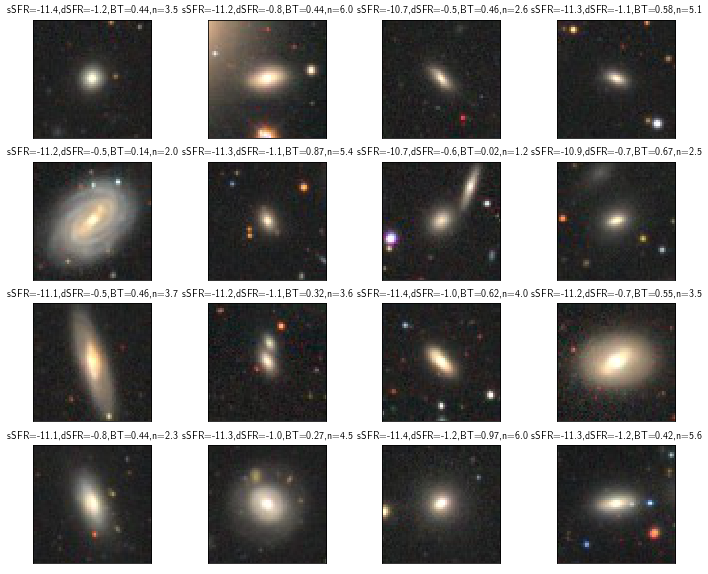

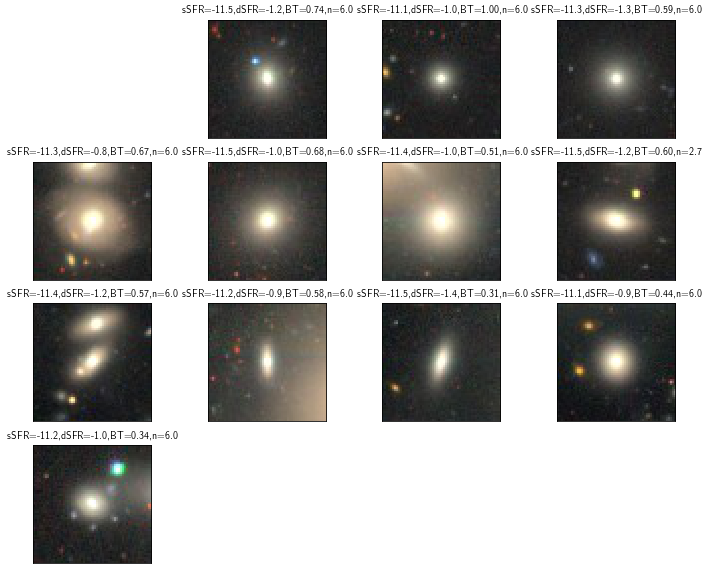

In [66]:
b.core_getlegacy()

# Summary from 4/28/21

* update fit to MS using sigma clipping
  * does it change with BT < 0.3 vs all BT
  * if not, show BT> 0.3 in the same MS figure?  but then what do we do with histograms
  
* MS with all

* properties of suppressed galaxies

* then focus on BT < 0.3

Figure 1


## Modeling

* model SFR change, recover timescale for disk only
* STAGES - spirals
* other work - Chris Haines, Benedetta - no morphology cut
* role of bulges in suppressing SF
* at fixed BT, the delta SFR is greater in cluster core

* morphology is not driver of quenching in cluster

* histogram like fig 3
  * 0 < BT < 0.3
  * 0.3<BT < 0.6
  * 0.6 < BT < 1
  
* bigger Bulge has lower SFR
  * could be that bulge stabilizes
  * most massive galaxies have bigger bulges
  * intrinsic quenching - mass dependence - and higher mass galaxies have higher bulges
  * can distinguish - gas observations?
  

# Sigma Clipping with Line fit

from https://docs.astropy.org/en/stable/modeling/example-fitting-line.html

In [105]:
from astropy.stats import sigma_clip
from astropy.modeling import models, fitting

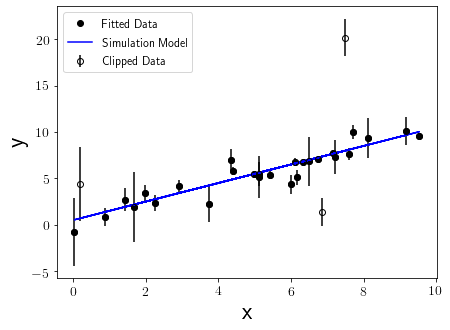

In [109]:

# define a model for a line
line_orig = models.Linear1D(slope=1.0, intercept=0.5)

# generate x, y data non-uniformly spaced in x
# add noise to y measurements
npts = 30
np.random.seed(10)
x = np.random.uniform(0.0, 10.0, npts)
y = line_orig(x)
yunc = np.absolute(np.random.normal(0.5, 2.5, npts))
y += np.random.normal(0.0, yunc, npts)

# make true outliers
y[3] = line_orig(x[3]) + 6 * yunc[3]
y[10] = line_orig(x[10]) - 4 * yunc[10]

# initialize a linear fitter
fit = fitting.LinearLSQFitter()

# initialize the outlier removal fitter
or_fit = fitting.FittingWithOutlierRemoval(fit, sigma_clip, niter=3, sigma=3.0)

# initialize a linear model
line_init = models.Linear1D()

# fit the data with the fitter
fitted_line, mask = or_fit(line_init, x, y, weights=1.0/yunc)
filtered_data = np.ma.masked_array(y, mask=mask)

# plot
plt.figure()
plt.errorbar(x, y, yerr=yunc, fmt="ko", fillstyle="none", label="Clipped Data")
plt.plot(x, filtered_data, "ko", label="Fitted Data")
plt.plot(x, line_orig(x), 'b-', label='Simulation Model')
#plt.plot(x, fitted_line(x), 'k-', label='Fitted Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [110]:
fitted_line

<Linear1D(slope=0.99228733, intercept=0.61226533)>

# Fitting MS of GSWLC with and without BT cut

* tried increasing niter from 3 to 5, and fitted parameters are unchanged

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
1200 1200 1200 1200


<Figure size 489.6x360 with 0 Axes>

In [19]:
%run ~/github/LCS/python/fit_line_sigma_clip.py

In [30]:
os.chdir(homedir+'/research/LCS/plots/')

%run ~/github/LCS/python/lcs_paper2.py --cutBT --BT 1 --minmass 9.7 --ellip 0.75  
flag = b.gsw_mass_sfr_flag
x = b.gsw.cat['logMstar'][flag]
y = b.gsw.cat['logSFR'][flag]
fitted_line,mask = fit_line_sigma_clip(x,y)
print(fitted_line)
print('number of masked objects = ',sum(mask),len(mask))
std = np.std(np.abs(y[~mask]-fitted_line(x[~mask])))
print('std around MS fit = {:.2f}'.format(std))

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
1256 1256 1256 1256
Model: Linear1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
          slope            intercept     
    ------------------ ------------------
    0.3985388023995614 -4.207847001780896
number of masked objects =  75 11839
std around MS fit = 0.26


<Figure size 489.6x360 with 0 Axes>

In [35]:
fitted_line.intercept.value

-4.207847001780896

In [150]:
# repeating with BT cut
%run ~/github/LCS/python/lcs_paper2.py --cutBT --BT 0.3 --minmass 9.7 --ellip 0.7  
flag = b.gsw_mass_sfr_flag
x = b.gsw.cat['logMstar'][flag]
y = b.gsw.cat['logSFR'][flag]
fitted_line2,mask2 = fit_line_sigma_clip(x,y)
print(fitted_line2)
print('number of masked objects = ',sum(mask2),len(mask2))
std2 = np.std(np.abs(y[~mask2]-fitted_line2(x[~mask2])))
print('std around MS fit = {:.2f}'.format(std2))

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
452 452 452 452
Model: Linear1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
          slope            intercept     
    ------------------ ------------------
    0.5369655914611987 -5.497888163211146
number of masked objects =  119 6961
std around MS fit = 0.17


In [121]:
fitted_line2

<Linear1D(slope=0.59562669, intercept=-6.10411545)>

In [151]:
# fit MS with BT < 0.3, no ellip cut, and sigma clipping to compare with BV fit

# repeating with BT cut
%run ~/github/LCS/python/lcs_paper2.py --cutBT --BT 0.3 --minmass 9.7 --ellip 1.1 
flag = b.gsw_mass_sfr_flag
x = b.gsw.cat['logMstar'][flag]
y = b.gsw.cat['logSFR'][flag]
fitted_line3,mask3 = fit_line_sigma_clip(x,y)
print(fitted_line3)
print('number of masked objects = ',sum(mask3),len(mask3))
std3 = np.std(np.abs(y[~mask3]-fitted_line2(x[~mask3])))
print('std around MS fit = {:.2f}'.format(std3))

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
550 550 550 550
Model: Linear1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
          slope             intercept     
    ------------------ -------------------
    0.5251986113240316 -5.4201167943368205
number of masked objects =  164 9236
std around MS fit = 0.18


In [132]:
fitted_line3

<Linear1D(slope=0.57389892, intercept=-5.92243069)>

[9.5, 11.5, -2, 1.6]

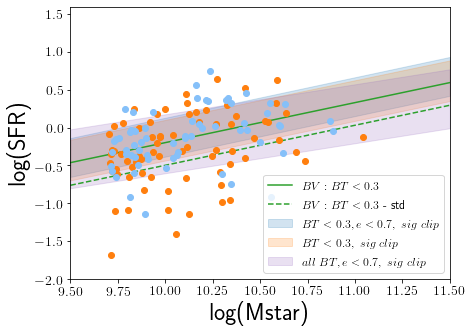

In [168]:
plt.figure()
xline = np.linspace(9.5,11.5,100)
alpha=.2
plt.fill_between(xline,fitted_line2(xline)+1.5*std2,fitted_line2(xline)-1.5*std2,color=mycolors[0],alpha=alpha,label='$BT < 0.3,e<0.7, \ sig \ clip$')
plt.fill_between(xline,fitted_line3(xline)+1.5*std3,fitted_line3(xline)-1.5*std3,color=mycolors[1],alpha=alpha,label='$BT < 0.3, \ sig \ clip$')
plt.plot(xline,get_BV_MS(xline),label='$BV: BT< 0.3$',color=mycolors[2])
plt.plot(xline,get_BV_MS(xline)-.3,ls='--',label='$BV: BT< 0.3$ - std',color=mycolors[2])

plt.fill_between(xline,fitted_line(xline)+1.5*std,fitted_line(xline)-1.5*std,color=mycolors[4],alpha=alpha,label='$all \ BT,e<0.7,\ sig \ clip$')
plt.xlabel('log(Mstar)')
plt.ylabel('log(SFR)')

plt.legend()

# plot LCS core
flag = b.lcs_mass_sfr_flag & b.lcs.membflag
x = b.lcs.cat['logMstar'][flag]
y = b.lcs.cat['logSFR'][flag]
plt.plot(x,y,'bo',color=darkblue)
# plot LCS core
flag = b.lcs_mass_sfr_flag & b.lcs.infallflag
x = b.lcs.cat['logMstar'][flag]
y = b.lcs.cat['logSFR'][flag]
plt.plot(x,y,'bo',color=lightblue)
plt.axis([9.5,11.5,-2,1.6])

[9.5, 11.5, -1, 1.6]

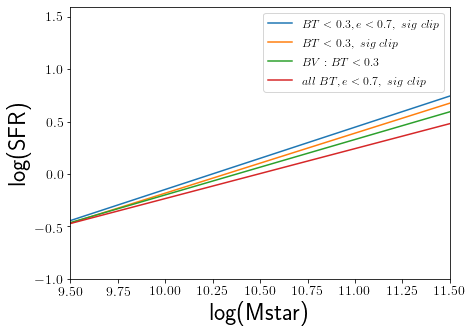

In [135]:
plt.figure()
xline = np.linspace(9.5,11.5,100)
plt.plot(xline,fitted_line2(xline),label='$BT < 0.3,e<0.7, \ sig \ clip$')
plt.plot(xline,fitted_line3(xline),label='$BT < 0.3, \ sig \ clip$')
plt.plot(xline,get_BV_MS(xline),label='$BV: BT< 0.3$')
plt.plot(xline,fitted_line(xline),label='$all \ BT,e<0.7,\ sig \ clip$')
plt.xlabel('log(Mstar)')
plt.ylabel('log(SFR)')
plt.legend()
plt.axis([9.5,11.5,-1,1.6])

# Plot dSFR vs Mstar



outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
1256 1256 1256 1256
#########################
ALL B/T
#########################

Field
r=0.0156, pvalue=8.911e-02

LCS Core
r=0.1331, pvalue=1.237e-01

LCS Infall
r=0.0664, pvalue=5.138e-01

 Combined Samples: Spearman Rank


<Figure size 489.6x360 with 0 Axes>

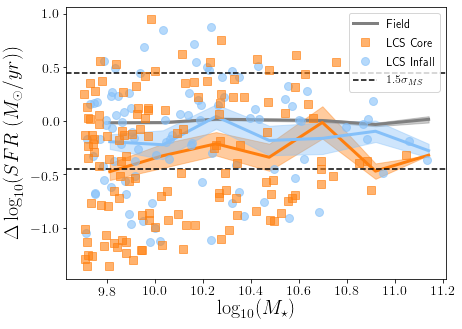

In [13]:
os.chdir(homedir+'/research/LCS/plots/')
btmax=1.1
nbins=8

#btmax=1
#nbins=7
%run ~/github/LCS/python/lcs_paper2.py --cutBT --BT 1 --minmass 9.7 --ellip 0.75 

print('#########################')
print('ALL B/T')
print('#########################')
b.plot_dsfr_mstar(nbins=nbins,xmax=btmax,writefiles=True)#outfile1=outfile1,outfile2=outfile2,nbins=12)
outfile1 = homedir+'/research/LCS/plots/dsfr-mstar-BTcut1-e0p75.pdf'
outfile2 = homedir+'/research/LCS/plots/dsfr-mstar-BTcut1-e0p75.png'
plt.savefig(outfile1)
plt.savefig(outfile2)


outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
665 665 665 665
#########################
B/T < 0.4
#########################

Field
r=0.0244, pvalue=2.154e-02

LCS Core
r=0.1379, pvalue=2.380e-01

LCS Infall
r=-0.1043, pvalue=3.763e-01

 Combined Samples: Spearman Rank


<Figure size 489.6x360 with 0 Axes>

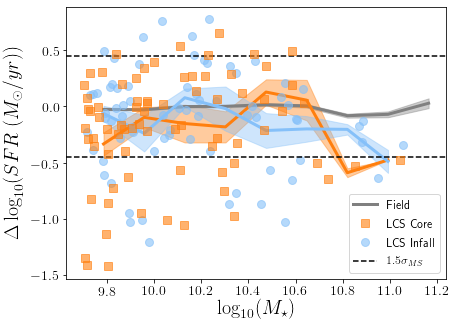

In [17]:
os.chdir(homedir+'/research/LCS/plots/')
btmax=1.1
nbins=10

#btmax=1
#nbins=7
%run ~/github/LCS/python/lcs_paper2.py --cutBT --BT 0.4 --minmass 9.7 --ellip 0.75 

print('#########################')
print('B/T < 0.4')
print('#########################')
b.plot_dsfr_mstar(nbins=nbins,xmax=btmax,writefiles=True)#outfile1=outfile1,outfile2=outfile2,nbins=12)
outfile1 = homedir+'/research/LCS/plots/dsfr-mstar-BTcut0p4-e0p75.pdf'
outfile2 = homedir+'/research/LCS/plots/dsfr-mstar-BTcut0p4-e0p75.png'
plt.savefig(outfile1)
plt.savefig(outfile2)

# Modeling Evolution of SFRs

* end point is the distribution of core SFRs

* we should start with field

* compare galaxies with similar masses
  * don't need to evolve stellar masses, can assume stellar mass is fairly constant
  
* can we model figure 2 or fig 6 - offset wrt the main sequence.  we want to implement B/T cut.

* how to model change in SFR
  * do outside in quenching?
  * or just lower SFRs 
  
  $$ SFR_{core} = SFR_{field} e^{(-t/\tau)} $$
  
  * trying to find tau
  * this assumes decline is happening at a constant rate, rather than delay plus rapid
  
* in reality, tau is probably dependent on mass.  how can we fold this in?  maybe work in two mass bins?

* do we use a mass-matched field sample?  yes
  * can do the way we are doing for the paper
  * or we can use the core mass distribution as a prob distribution.
    * pick random field galaxy
    * pick a second random number.  If rand2 is < height of mass distribution, then keep the galaxy.
    
## Procedure

* set up mass-matched field sample
* compare dist of SFRs
* assume a constant tau - constant at all masses
* using same distribution of infall times as with paper 1 and 3 
  * randomly assign a number, with random number uniformly  distributed between zero and tmax
  * can vary tmax from 2 - 4 Gyr
  
* to add complexity, we can let tau vary with mass.  or maybe try two mass bins.


* need to write out data files (do this in lcs_paper2.py):
  * Field sample with SFRs and stellar mass
    * above our sSFR and Mstar limits
    * mass matched to the LCS core sample
  * LCS sample with SFRs and stellar mass
    * above our sSFR and Mstar limits

  






In [43]:
%run ~/github/LCS/python/lcs_paper2.py --cutBT --BT 0.4 --minmass 9.7 --ellip 0.75 

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
665 665 665 665


In [44]:
b.write_tables_for_SFR_sim()

In [45]:
b.gsw.MS_slope

0.47309772241712855

In [46]:
b.gsw.MS_intercept

-4.877005731991362

In [111]:
%run ~/github/LCS/python/LCSsimulate-infall-sfrs.py
t = run_sim(boostflag=True,nrandom=10,tmax=3)
all_tau,all_boost,all_p_sfr,all_p_dsfr,fquench_sfr = t

Welcome!


<Figure size 489.6x360 with 0 Axes>

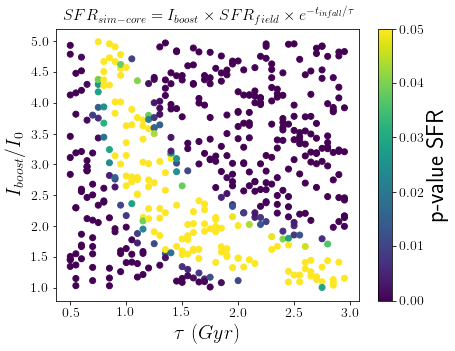

In [112]:
plt.figure()
plt.scatter(all_tau,all_boost,c=all_p_sfr,vmin=0,vmax=.05)
plt.colorbar(label='p-value SFR')
plt.xlabel(r'$ \tau ~ (Gyr)$',fontsize=20)
plt.ylabel('$I_{boost}/I_0$',fontsize=20)
plt.title(r'$SFR_{sim-core} = I_{boost} \times SFR_{field} \times e^{-t_{infall}/ \tau}$',fontsize=16)
plt.savefig(homedir+'/research/LCS/plots/Iboost-tau-sfr.png')
plt.savefig(homedir+'/research/LCS/plots/Iboost-tau-sfr.pdf')

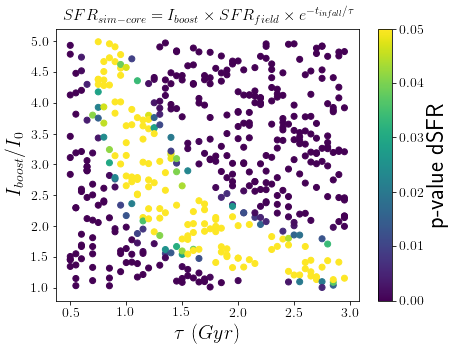

In [113]:
plt.figure()
plt.scatter(all_tau,all_boost,c=all_p_dsfr,vmin=0,vmax=.05)
plt.colorbar(label='p-value dSFR')
plt.xlabel(r'$ \tau ~ (Gyr)$',fontsize=20)
plt.ylabel('$I_{boost}/I_0$',fontsize=20)
plt.title(r'$SFR_{sim-core} = I_{boost} \times SFR_{field} \times e^{-t_{infall}/ \tau}$',fontsize=16)
plt.savefig(homedir+'/research/LCS/plots/Iboost-tau-dsfr.png')
plt.savefig(homedir+'/research/LCS/plots/Iboost-tau-dsfr.pdf')

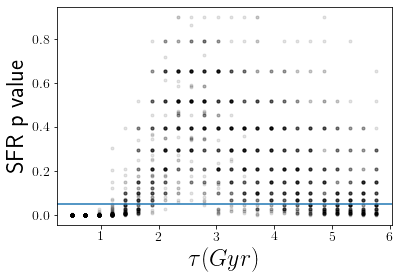

In [8]:
plot_sfrp_tau(all_tau,all_p_sfr)

pvalue =  0.05
pvalue =  0.07
pvalue =  0.01


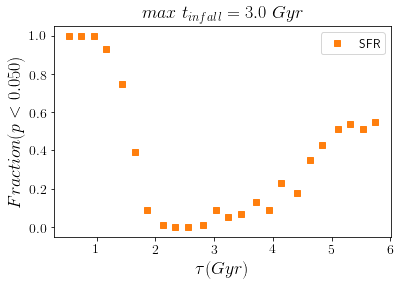

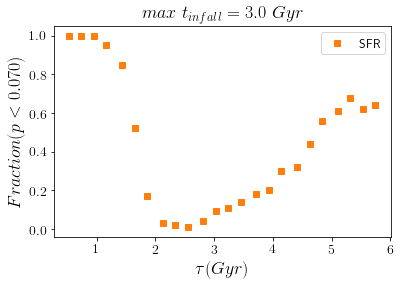

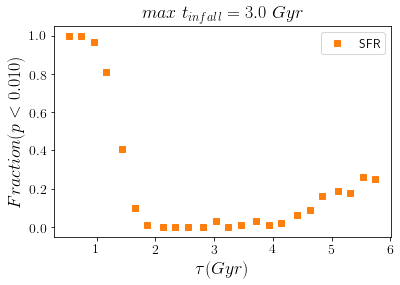

In [11]:
plot_frac_below_pvalue_sfr(all_tau,all_p_sfr,3,pvalue=.05)
plot_frac_below_pvalue_sfr(all_tau,all_p_sfr,3,pvalue=.07)
plot_frac_below_pvalue_sfr(all_tau,all_p_sfr,3,pvalue=.01)

# Testing a max infall time of 2 Gyr

In [14]:
%run /home/rfinn/github/LCS/python/LCSsimulate-infall-sfrs.py
t = run_sim(taumax=6,nstep_tau=24,nrandom=10,nmassmatch=10,tmax=2,debug=False)


Welcome!


<Figure size 432x288 with 0 Axes>

pvalue =  0.05


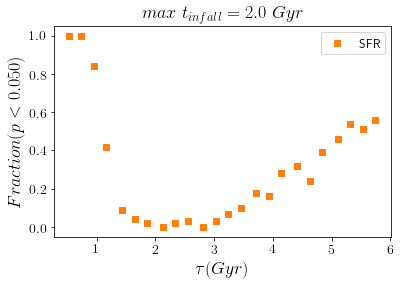

In [17]:
all_tau2,all_boost2,all_p_sfr2,all_p_dsfr2,fquench_sfr2 = t
plot_frac_below_pvalue_sfr(all_tau2,all_p_sfr2,2,pvalue=.05)
#plot_frac_below_pvalue_sfr(all_tau2,all_p_sfr2,3,pvalue=.07)
#plot_frac_below_pvalue_sfr(all_tau2,all_p_sfr2,3,pvalue=.01)

In [18]:
%run /home/rfinn/github/LCS/python/LCSsimulate-infall-sfrs.py
t = run_sim(taumax=6,nstep_tau=18,nrandom=5,nmassmatch=5,tmax=1,debug=False)


Welcome!


<Figure size 432x288 with 0 Axes>

pvalue =  0.05


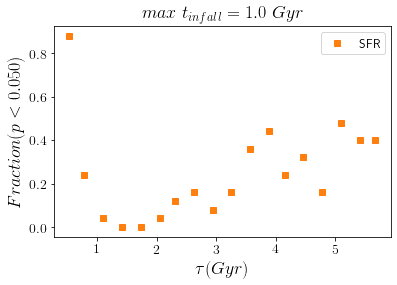

In [19]:
all_tau1,all_boost1,all_p_sfr1,all_p_dsfr1,fquench_sfr1 = t
plot_frac_below_pvalue_sfr(all_tau1,all_p_sfr1,1,pvalue=.05)

## Running again with more repetitions

* we initially said to do 1000 repeats of the mass matching, but I am doing 100 here
* trying to time how long this takes but seems like I dont remember how to use time.

Welcome!
time to run program = -1627591403.476247 sec


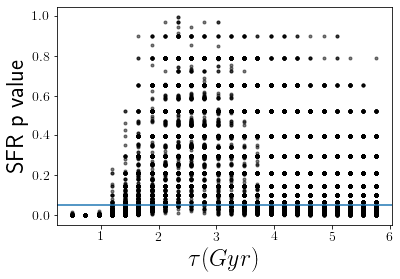

In [106]:
start_time = time.time()

%run /home/rfinn/github/LCS/python/LCSsimulate-infall-sfrs.py
t = run_sim(taumax=6,nstep_tau=24,nrandom=10,nmassmatch=100,tmax=3,debug=False)
end_time = time.time() - start_time

print('time to run program = {} sec'.format(end_time - start_time))
all_tau,all_boost,all_p_sfr,all_p_dsfr,fquench_sfr = t


pvalue =  0.05


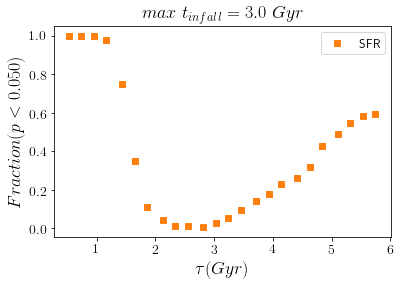

In [109]:
plot_frac_below_pvalue_sfr(all_tau,all_p_sfr,3)

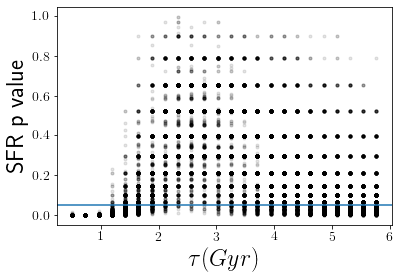

In [113]:
plot_sfrp_tau(all_tau,all_p_sfr)

In [1]:
plot_frac_below_pvalue_sfr(all_tau,all_p_sfr,3,pvalue=.01)

NameError: name 'plot_frac_below_pvalue_sfr' is not defined

# Summary

* we compare the field to the core
* check B/T cut
* we can rule out fast change for the galaxies that we observe with low sfrs
  * we can't rule out population that was rapidly quenched because the odds of detecting them is low
* can we do something with the fraction of quenched galaxies?
* what is happening during delay phase - we are seeing slow decline in SFRs
* we can say that the average decline of SF galaxies has a e-folding time great than 1.5 Gyr
  * we can rule out fast quenching ($\tau < 1.5$)
  * models with timescales of 2-3 Gyr are more favored (see how this 

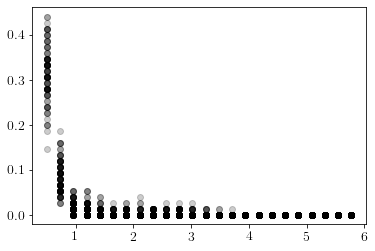

In [13]:
plt.figure()
plt.plot(all_tau,fquench_sfr,'ko',alpha=.2)